<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/probst/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# placeholder: tensors are feeded externaly for example inputs tensors + output tensors

# variables : tensors represent the parameters of the network/graph ie. nn weights

In [15]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)


# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  0.8678053
iter:  1 cost:  0.86602575
iter:  2 cost:  0.86425054
iter:  3 cost:  0.86247957
iter:  4 cost:  0.860713
iter:  5 cost:  0.8589509
iter:  6 cost:  0.8571933
iter:  7 cost:  0.85544026
iter:  8 cost:  0.8536919
iter:  9 cost:  0.8519481
predicted  [[ 4.1044444e-01  1.5471498e-02 -5.5913627e-04 -1.0682507e+00]
 [ 1.0757588e-02 -1.7866272e-02  2.4953309e-01 -6.3850677e-01]
 [ 4.6642312e-01 -2.3743898e-01  1.6714153e+00 -6.8887663e-01]
 [ 6.4972317e-01 -4.6937391e-02  3.5733449e-01 -9.9395370e-01]
 [ 7.6072371e-01 -1.4613147e-01  8.5468972e-01 -1.6937412e-01]
 [ 1.0055127e+00 -2.8146508e-01  1.7595005e+00 -2.9567316e-01]
 [ 7.4068844e-01 -1.4072223e-01  1.0267508e+00 -1.1911743e+00]
 [ 2.7984017e-01 -2.4526203e-03  2.1744780e-01 -1.3638726e+00]
 [ 2.3051536e-01 -1.5674476e-03  7.5974740e-02 -6.2399954e-01]
 [ 2.2976014e-01  4.1875359e-02 -1.8225303e-01 -8.4537172e-01]]
real  [[0.41886254 0.58344716 0.61783795 0.30063948]
 [0.68453124 0.94080455 0.6973729  0.48100

In [16]:
sess = tf.Session() 
sess.run(init)
    
for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
print('predicted ', y_p_p)
print('real ', y_gr)

#sess.close()

iter:  0 cost:  2.7548928
iter:  1 cost:  2.7500021
iter:  2 cost:  2.7451167
iter:  3 cost:  2.7402365
iter:  4 cost:  2.735362
iter:  5 cost:  2.7304933
iter:  6 cost:  2.7256303
iter:  7 cost:  2.7207732
iter:  8 cost:  2.715922
iter:  9 cost:  2.7110772
predicted  [[-2.0014787  -0.70324326 -1.1259147   1.7832392 ]
 [-1.0552006  -0.27737704 -0.24480227  1.0648386 ]
 [-1.8919536  -0.5350035  -0.31238735  1.917065  ]
 [-2.186985   -0.80343187 -1.2699314   1.921587  ]
 [-1.1417332  -0.5004114  -0.78694266  0.9338782 ]
 [-1.7797824  -0.6786982  -0.81663865  1.5979723 ]
 [-2.7400558  -0.9274585  -1.2213383   2.5293584 ]
 [-2.397792   -0.7499545  -1.0091532   2.2586184 ]
 [-1.1804761  -0.4036966  -0.61327547  1.0685986 ]
 [-1.4547124  -0.5048088  -0.8348192   1.2958114 ]]
real  [[0.41886254 0.58344716 0.61783795 0.30063948]
 [0.68453124 0.94080455 0.6973729  0.48100341]
 [0.95249055 0.07141005 0.08201074 0.8523129 ]
 [0.63517414 0.34945095 0.22711313 0.73827592]
 [0.98160199 0.52134326 0.

In [17]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4

num_samples= 10

# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  9.325609
iter:  1 cost:  9.265759
iter:  2 cost:  9.206172
iter:  3 cost:  9.146854
iter:  4 cost:  9.087809
iter:  5 cost:  9.02904
iter:  6 cost:  8.970552
iter:  7 cost:  8.912351
iter:  8 cost:  8.854432
iter:  9 cost:  8.796808
predicted  [[-0.5398449   1.9091425  -4.768485   -1.012809  ]
 [-0.4571936   1.9274188  -4.9871335  -1.0731573 ]
 [-0.44902742  1.9485327  -5.039193   -1.0928013 ]
 [-0.55723965  1.9725279  -5.0117664  -0.9602711 ]
 [-0.48303926  1.967419   -5.101678   -1.0400381 ]
 [-0.45497298  1.9229008  -4.982307   -1.072427  ]
 [-0.5478431   1.9715488  -4.9716506  -0.9951787 ]
 [-0.5042219   1.9594343  -5.003442   -1.0368693 ]
 [-0.60078406  1.9309117  -4.71745    -0.976722  ]
 [-0.46557295  1.9556713  -5.12629    -1.0454118 ]]
real  [[0.50140198 0.38946274 0.29157792 0.43128381]
 [0.81805403 0.10340377 0.41850564 0.30723602]
 [0.00385185 0.13935884 0.42937669 0.7403306 ]
 [0.41029699 0.24453929 0.3163657  0.59763345]
 [0.57774411 0.22558469 0.52790553 

In [18]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [19]:
# training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# training data
X_test = mnist.test.images
Y_test = mnist.test.labels

# training data
X_val = mnist.validation.images
Y_val = mnist.validation.labels


# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10



# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))

## 3 images, y_p=[[0.1,0.0,0,0.9],[0.9,0.1,0,0.],[0,0.9,0,0.1]] 

# tf.argmax(y_p, 1) [3,0,1] 

# 3 images, y=[[0,0.0,0,1],[0,1,0,0],[0,1,0,0]] 

# tf.argmax(y, 1) [3,1,1]

# tf.equal [True,False,True]--[1,0,1]--- 2/3 

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)




    

iter:  0 train_cost:  11.493585 train_acc:  0.0859375 test_cost:  11.01462 test_acc:  0.078125
iter:  1 train_cost:  10.795372 train_acc:  0.078125 test_cost:  10.232542 test_acc:  0.125
iter:  2 train_cost:  10.859827 train_acc:  0.0703125 test_cost:  10.362089 test_acc:  0.1171875
iter:  3 train_cost:  10.04784 train_acc:  0.0703125 test_cost:  10.092907 test_acc:  0.078125
iter:  4 train_cost:  11.10769 train_acc:  0.046875 test_cost:  10.100246 test_acc:  0.0390625
iter:  5 train_cost:  9.375473 train_acc:  0.0703125 test_cost:  8.778909 test_acc:  0.0546875
iter:  6 train_cost:  9.375135 train_acc:  0.0625 test_cost:  8.850853 test_acc:  0.0703125
iter:  7 train_cost:  9.474316 train_acc:  0.0390625 test_cost:  8.461433 test_acc:  0.09375
iter:  8 train_cost:  8.673161 train_acc:  0.0703125 test_cost:  7.8752203 test_acc:  0.1328125
iter:  9 train_cost:  8.181571 train_acc:  0.0546875 test_cost:  9.413427 test_acc:  0.046875
iter:  10 train_cost:  8.160763 train_acc:  0.046875 tes

In [0]:
import tensorflow as tf 


def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)




Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

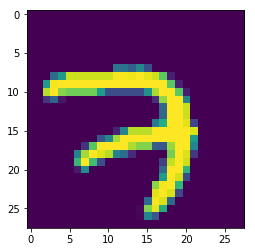

In [21]:
%matplotlib inline

from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

mnist.train.images.shape

image =mnist.train.images[0].reshape((28,28))
#MNIST data input (img shape: 28*28)
imshow(image)

mnist.train.labels[0]

# CNN using Tensorflow




conv_actv_1 max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started
(64, 1024)


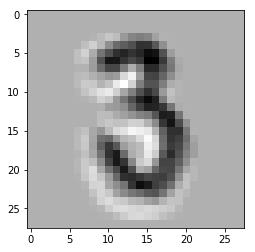

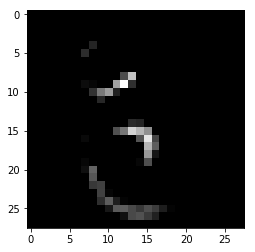

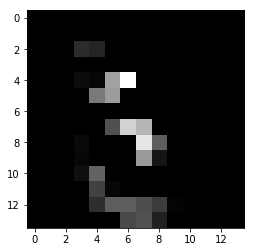

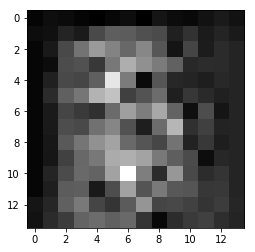

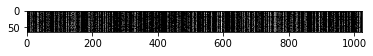

iter:  0 train_cost:  68346.74 train_acc:  0.15625 test_cost:  76638.984 test_acc:  0.140625 num_of_returned_sensors: 7
(64, 1024)


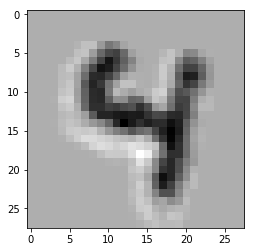

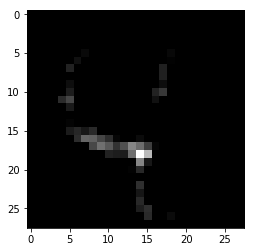

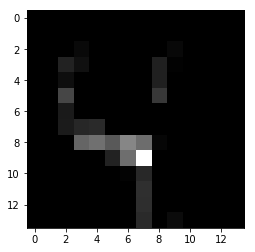

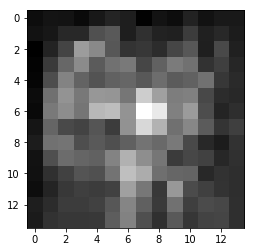

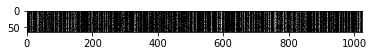

iter:  100 train_cost:  1760.3373 train_acc:  0.90625 test_cost:  939.5394 test_acc:  0.90625 num_of_returned_sensors: 7
(64, 1024)


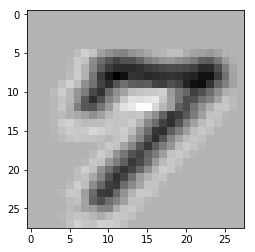

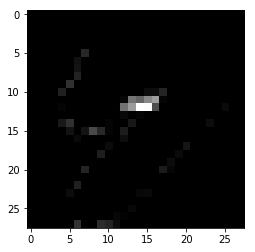

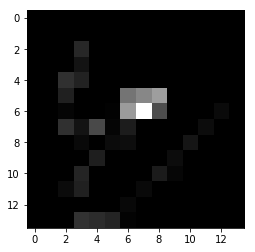

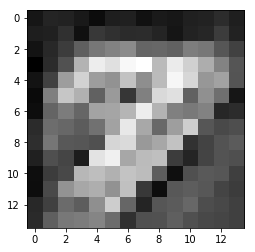

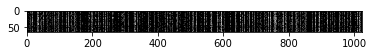

iter:  200 train_cost:  599.36755 train_acc:  0.9375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


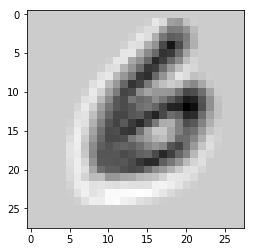

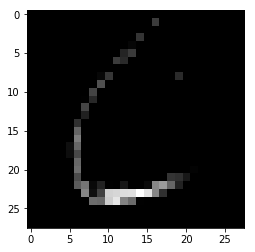

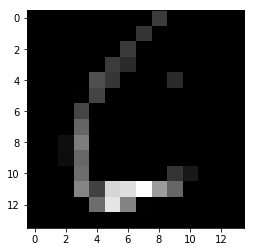

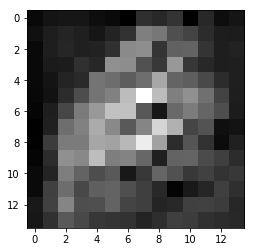

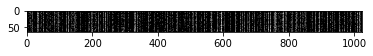

iter:  300 train_cost:  204.71014 train_acc:  0.96875 test_cost:  642.1234 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


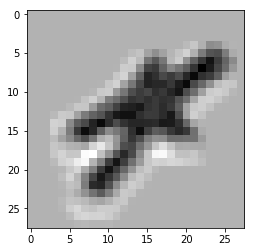

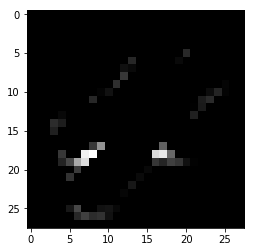

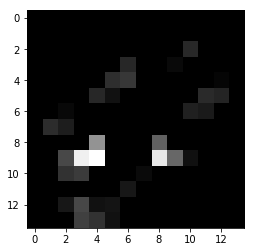

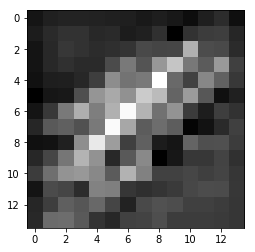

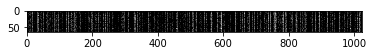

iter:  400 train_cost:  330.23444 train_acc:  0.953125 test_cost:  753.181 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


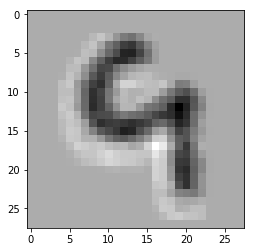

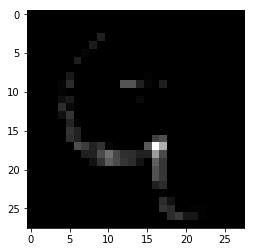

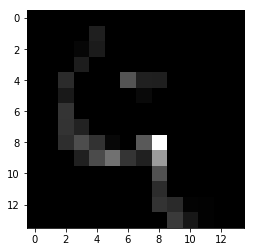

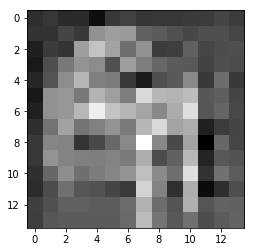

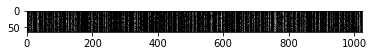

iter:  500 train_cost:  671.13684 train_acc:  0.953125 test_cost:  1146.7223 test_acc:  0.890625 num_of_returned_sensors: 7
(64, 1024)


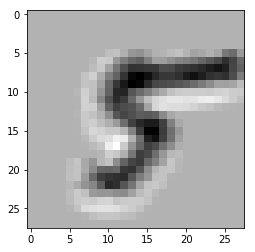

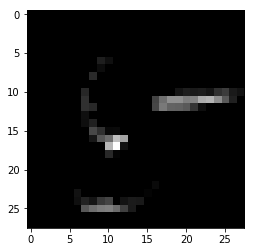

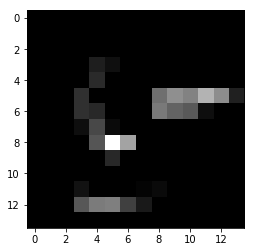

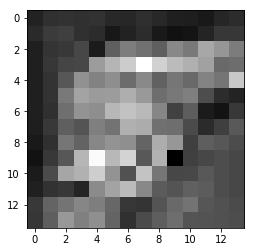

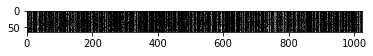

iter:  600 train_cost:  21.497528 train_acc:  0.984375 test_cost:  671.9181 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


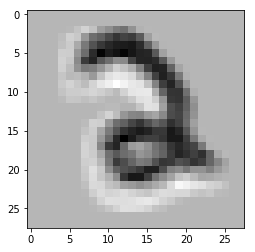

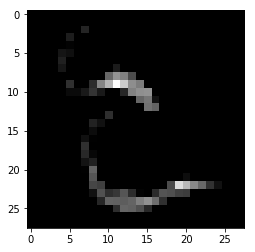

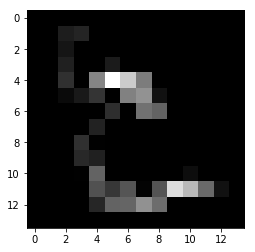

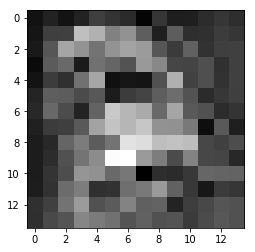

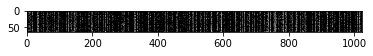

iter:  700 train_cost:  109.261856 train_acc:  0.96875 test_cost:  794.79895 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


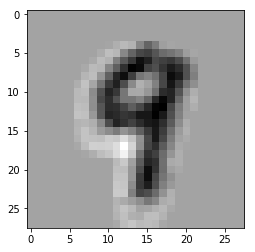

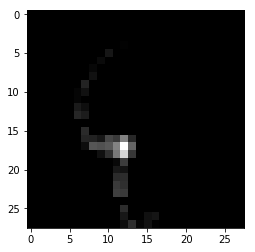

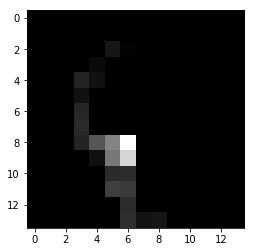

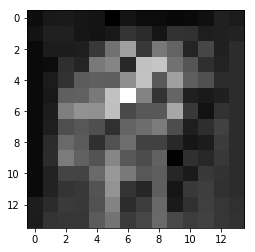

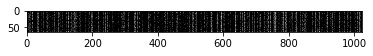

iter:  800 train_cost:  808.3645 train_acc:  0.921875 test_cost:  420.45752 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


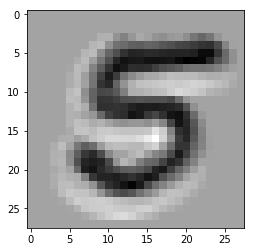

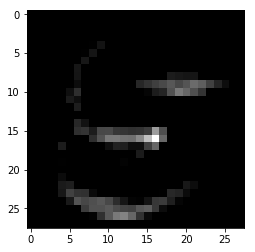

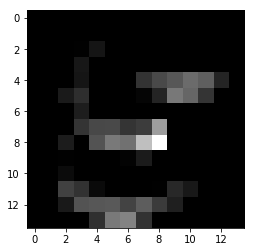

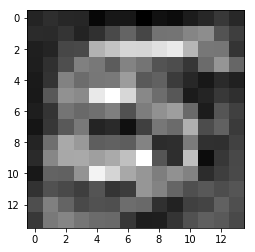

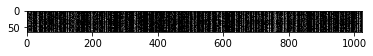

iter:  900 train_cost:  0.0 train_acc:  1.0 test_cost:  471.08722 test_acc:  0.921875 num_of_returned_sensors: 7
(64, 1024)


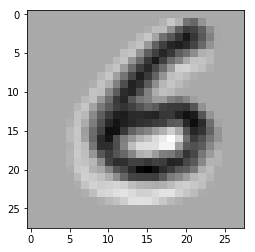

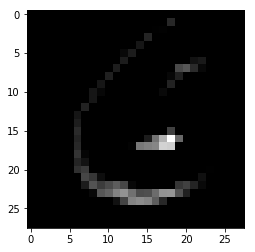

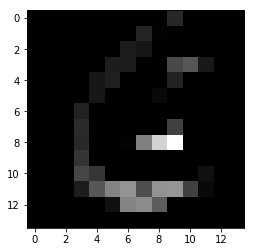

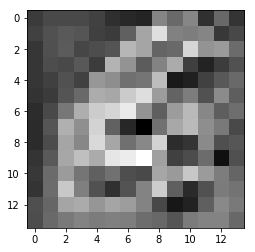

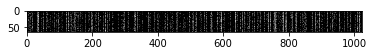

iter:  1000 train_cost:  617.0291 train_acc:  0.953125 test_cost:  140.93983 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


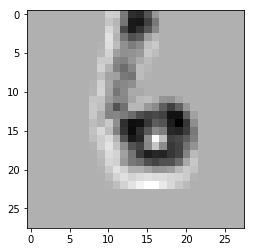

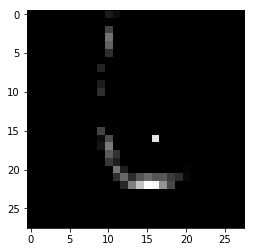

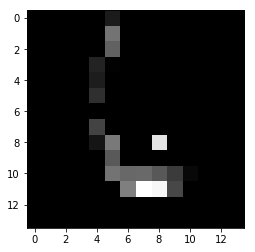

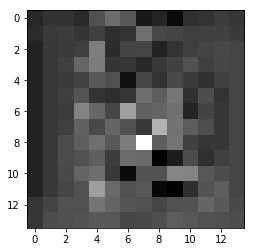

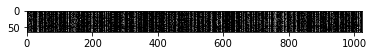

iter:  1100 train_cost:  96.19807 train_acc:  0.96875 test_cost:  475.68692 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


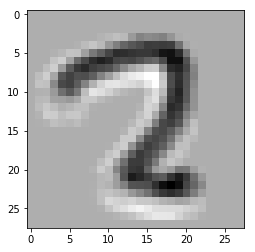

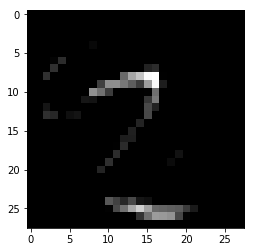

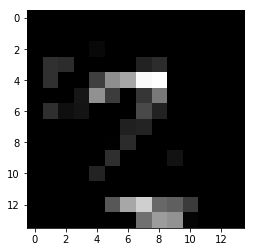

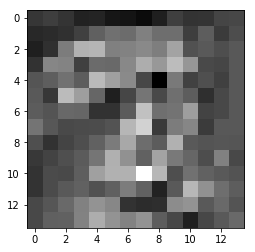

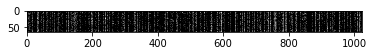

iter:  1200 train_cost:  62.308838 train_acc:  0.984375 test_cost:  23.187248 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


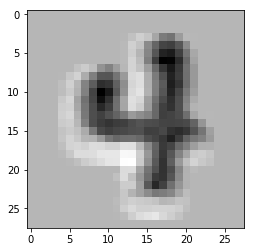

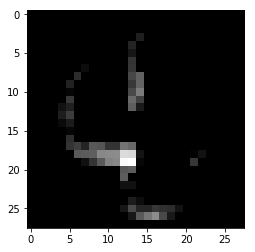

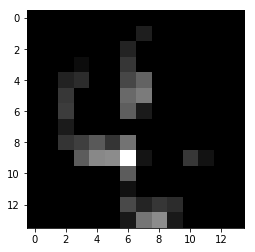

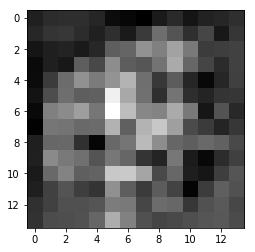

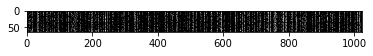

iter:  1300 train_cost:  0.0 train_acc:  1.0 test_cost:  366.36365 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


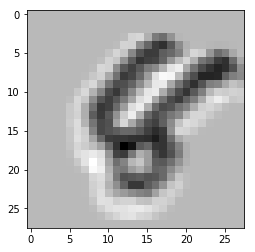

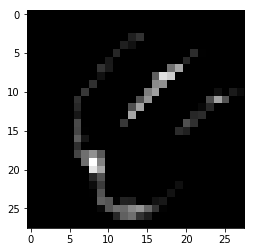

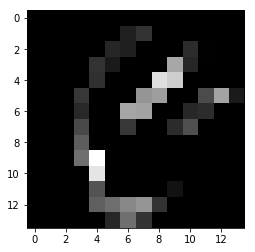

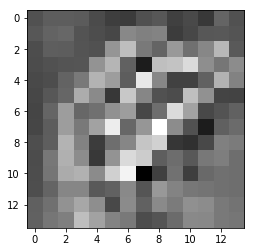

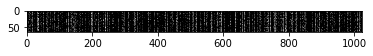

iter:  1400 train_cost:  161.25235 train_acc:  0.96875 test_cost:  137.91028 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


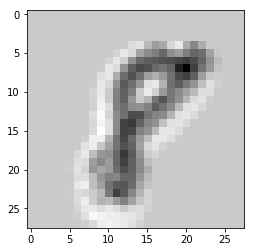

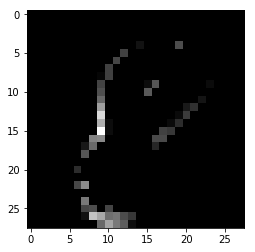

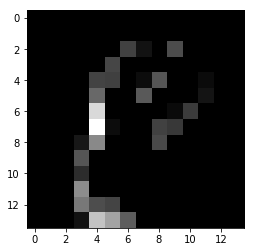

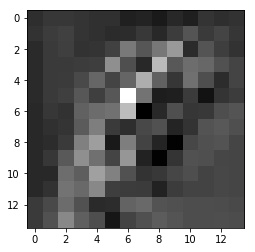

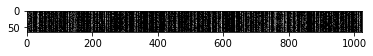

iter:  1500 train_cost:  0.0 train_acc:  1.0 test_cost:  524.46423 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


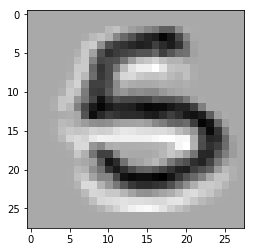

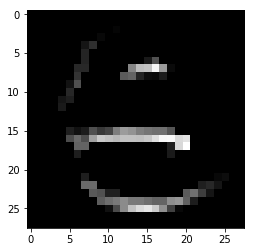

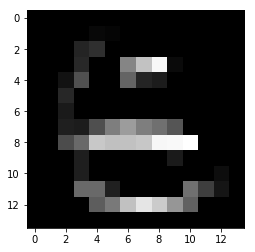

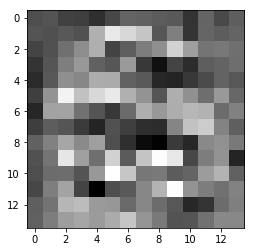

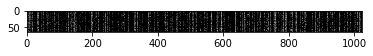

iter:  1600 train_cost:  0.0 train_acc:  1.0 test_cost:  239.78665 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


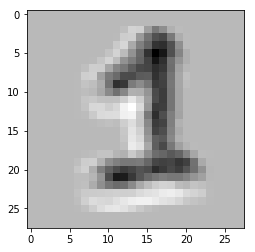

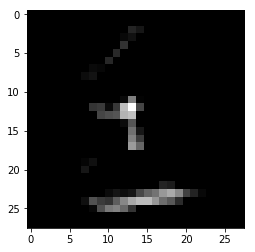

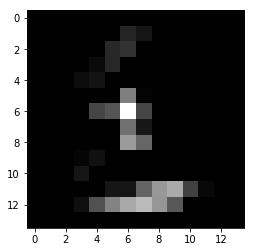

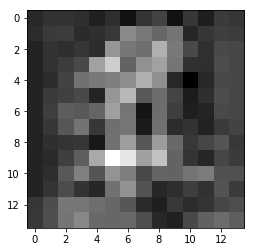

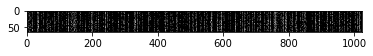

iter:  1700 train_cost:  0.0 train_acc:  1.0 test_cost:  649.5325 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


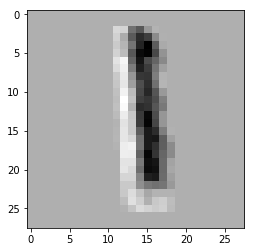

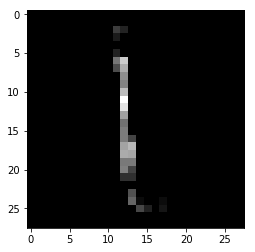

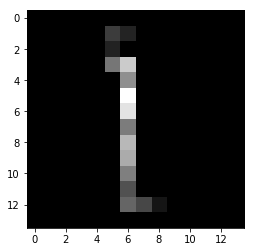

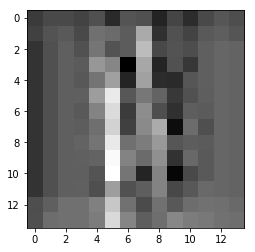

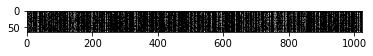

iter:  1800 train_cost:  222.5339 train_acc:  0.96875 test_cost:  624.3804 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


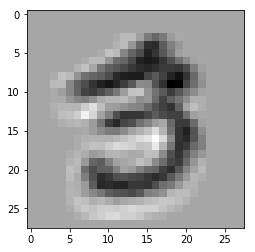

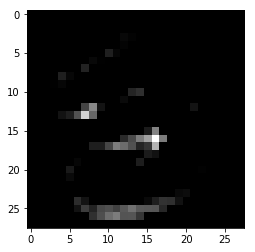

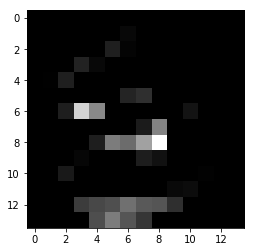

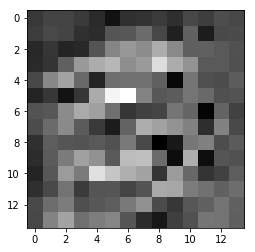

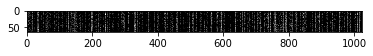

iter:  1900 train_cost:  53.240204 train_acc:  0.96875 test_cost:  258.59308 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


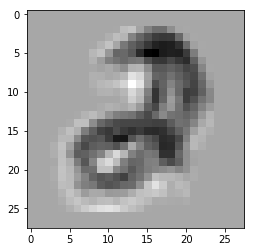

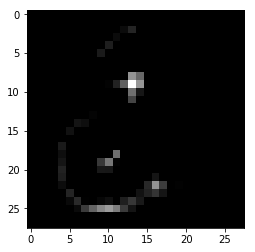

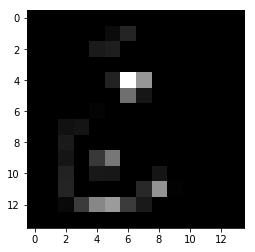

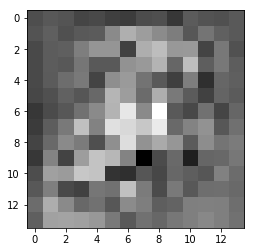

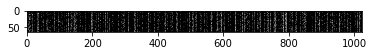

iter:  2000 train_cost:  521.00616 train_acc:  0.9375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


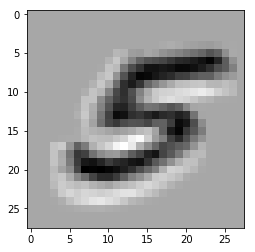

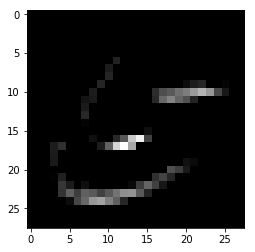

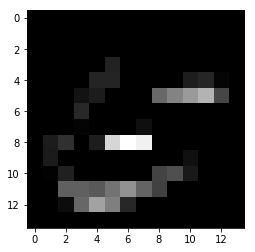

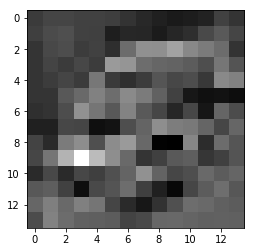

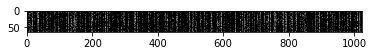

iter:  2100 train_cost:  180.3924 train_acc:  0.96875 test_cost:  119.21222 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


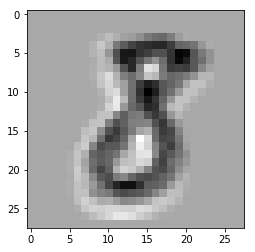

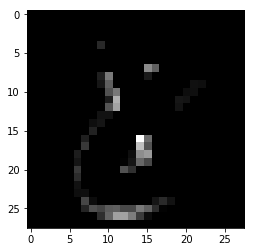

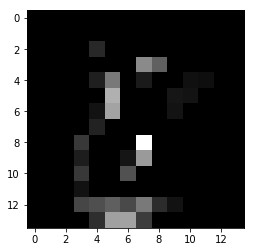

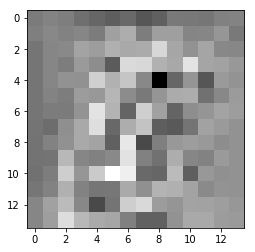

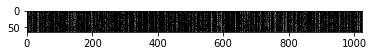

iter:  2200 train_cost:  61.830414 train_acc:  0.984375 test_cost:  183.92905 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


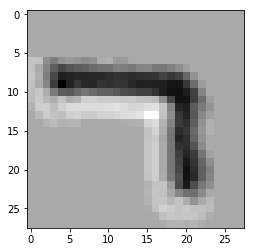

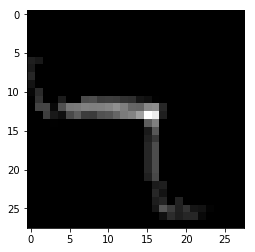

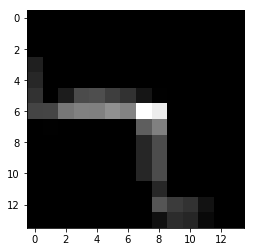

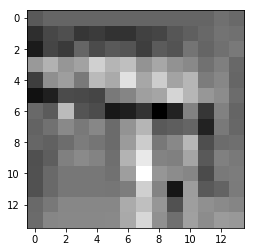

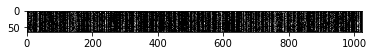

iter:  2300 train_cost:  123.00537 train_acc:  0.96875 test_cost:  372.1874 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


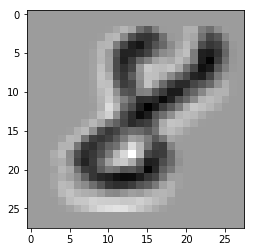

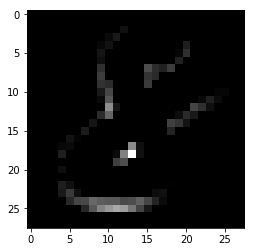

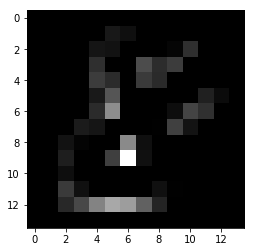

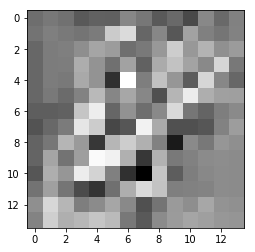

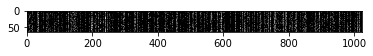

iter:  2400 train_cost:  427.68347 train_acc:  0.953125 test_cost:  16.542038 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


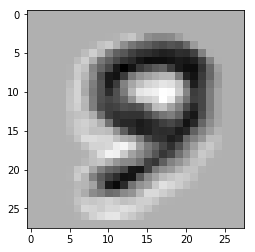

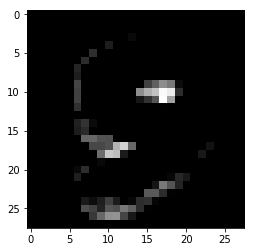

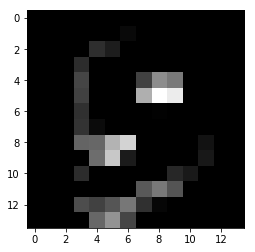

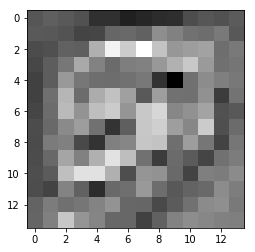

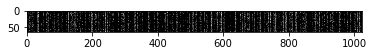

iter:  2500 train_cost:  39.42686 train_acc:  0.984375 test_cost:  137.0185 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


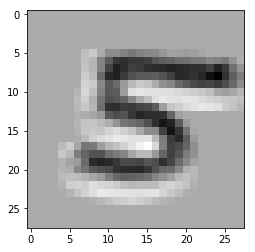

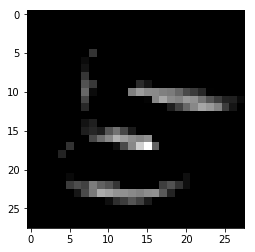

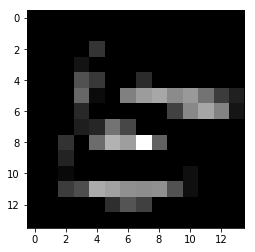

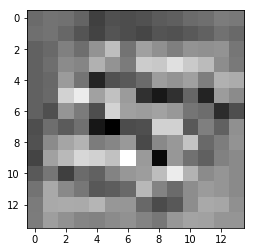

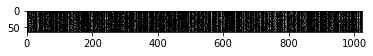

iter:  2600 train_cost:  22.33844 train_acc:  0.984375 test_cost:  94.26129 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


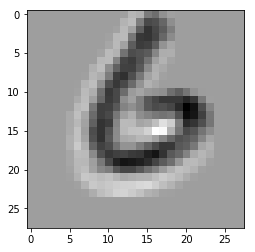

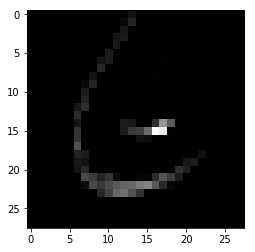

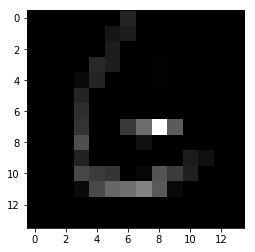

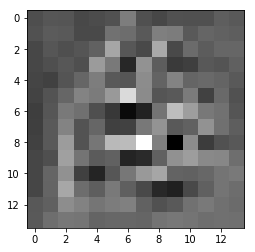

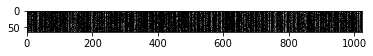

iter:  2700 train_cost:  0.0 train_acc:  1.0 test_cost:  2.2213135 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


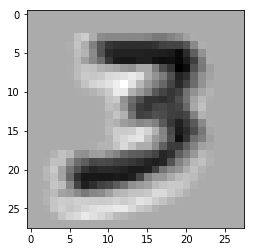

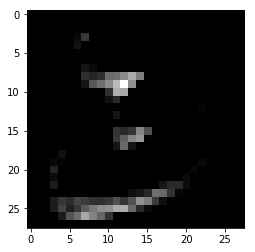

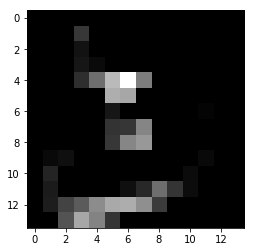

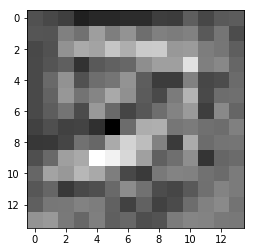

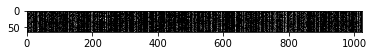

iter:  2800 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


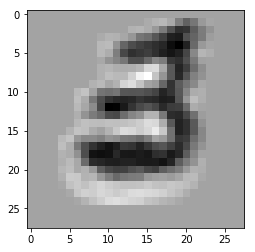

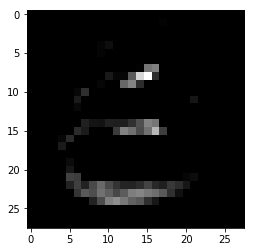

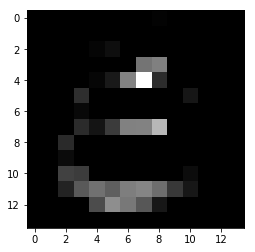

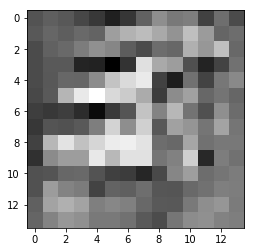

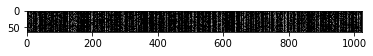

iter:  2900 train_cost:  0.0 train_acc:  1.0 test_cost:  108.79187 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


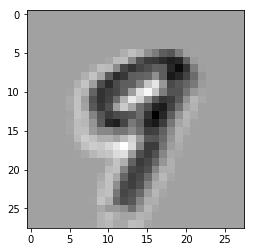

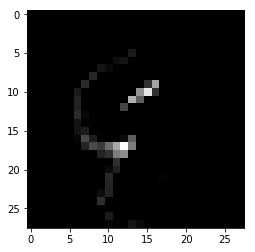

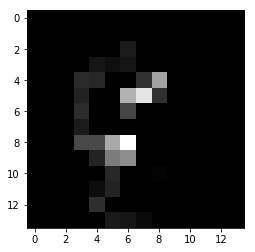

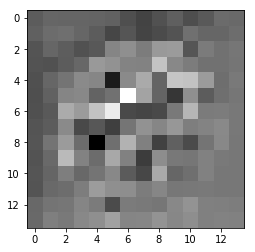

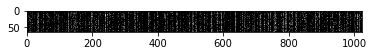

iter:  3000 train_cost:  0.0 train_acc:  1.0 test_cost:  329.77713 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


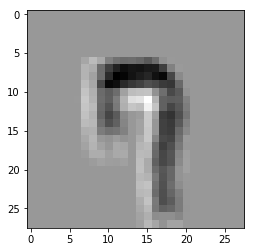

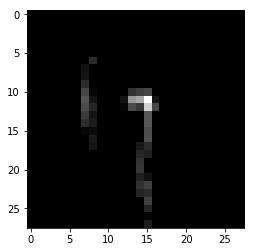

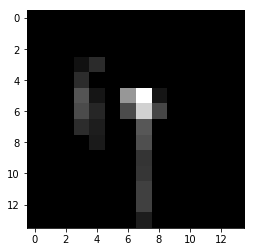

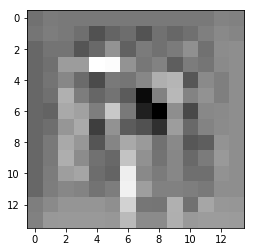

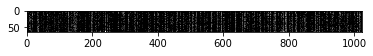

iter:  3100 train_cost:  117.4386 train_acc:  0.96875 test_cost:  318.98944 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


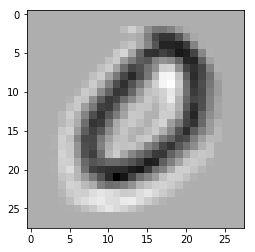

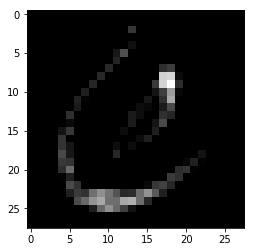

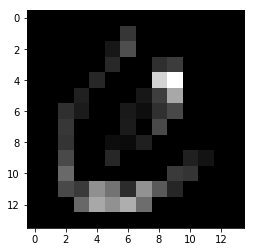

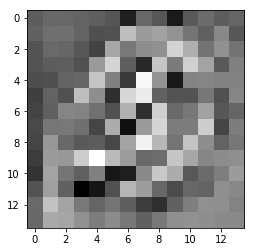

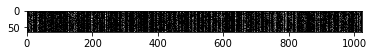

iter:  3200 train_cost:  33.629242 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


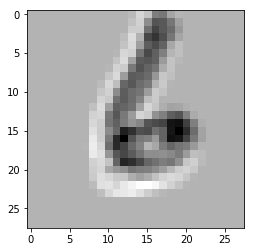

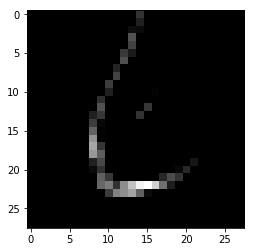

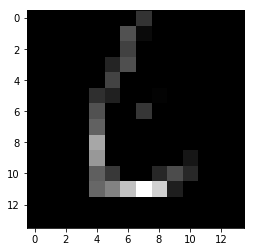

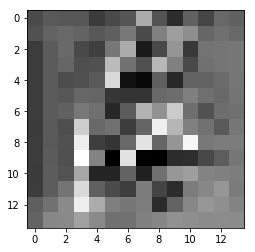

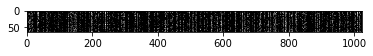

iter:  3300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


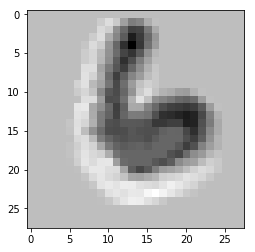

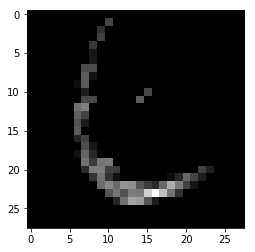

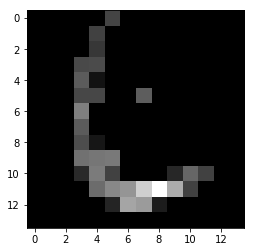

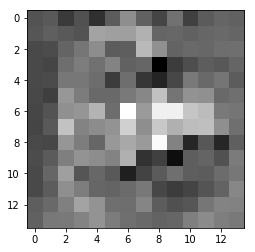

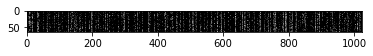

iter:  3400 train_cost:  0.0 train_acc:  1.0 test_cost:  152.71854 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


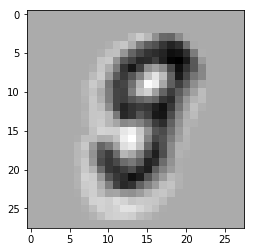

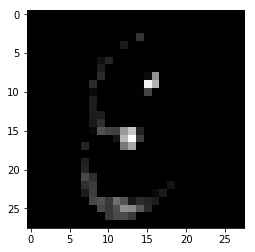

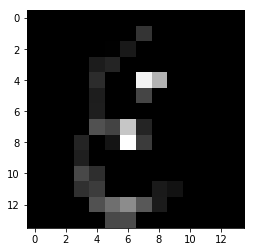

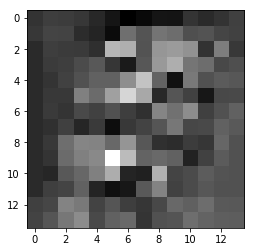

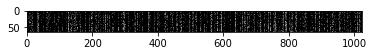

iter:  3500 train_cost:  102.18114 train_acc:  0.984375 test_cost:  389.55322 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


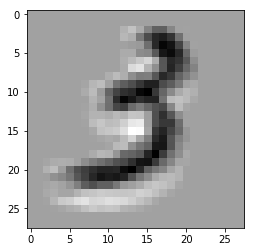

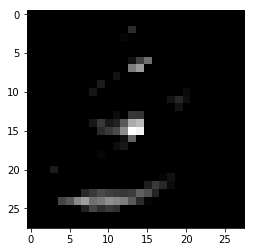

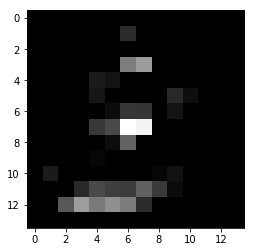

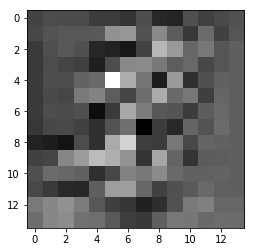

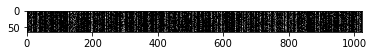

iter:  3600 train_cost:  72.33475 train_acc:  0.984375 test_cost:  116.83188 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


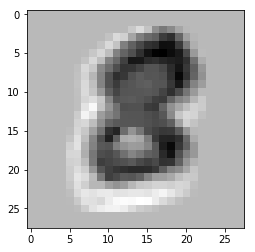

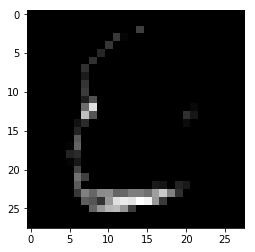

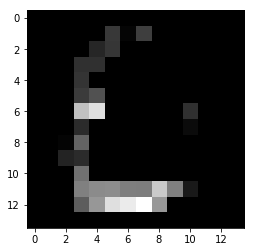

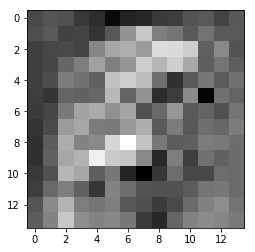

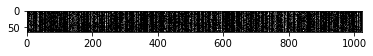

iter:  3700 train_cost:  5.9826965 train_acc:  0.984375 test_cost:  382.51645 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


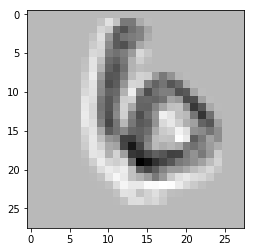

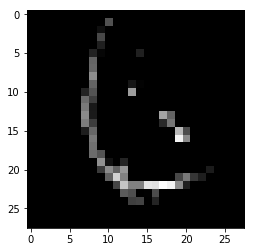

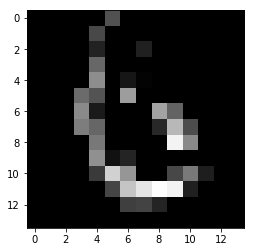

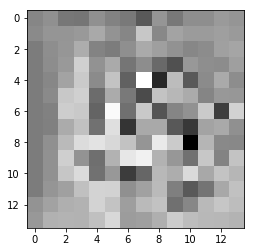

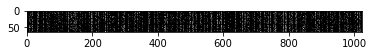

iter:  3800 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


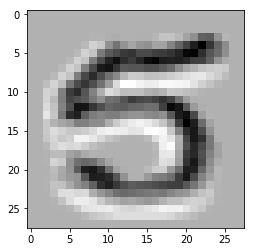

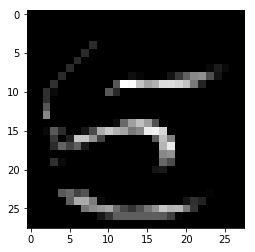

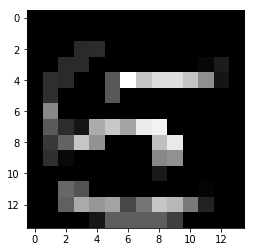

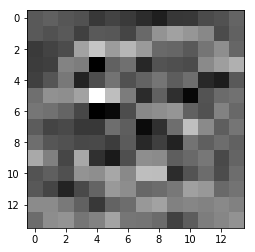

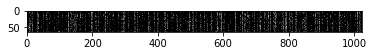

iter:  3900 train_cost:  24.386902 train_acc:  0.984375 test_cost:  21.82962 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


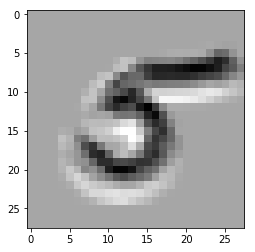

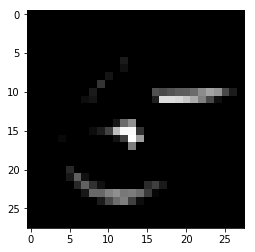

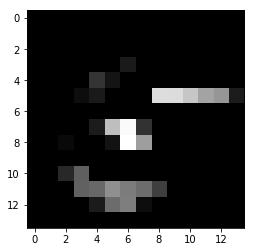

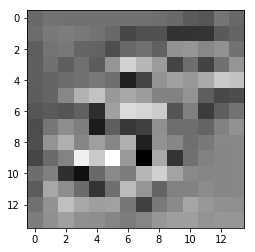

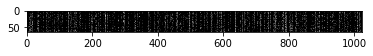

iter:  4000 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


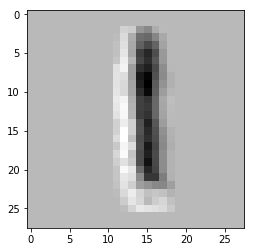

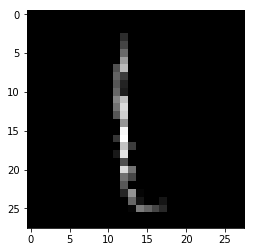

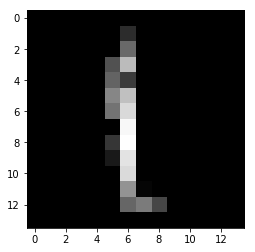

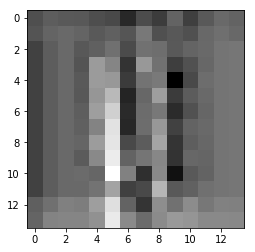

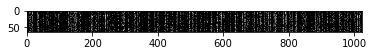

iter:  4100 train_cost:  77.97952 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


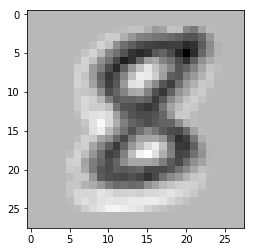

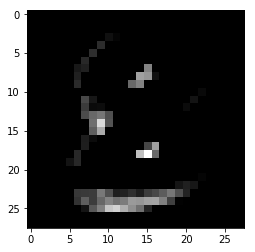

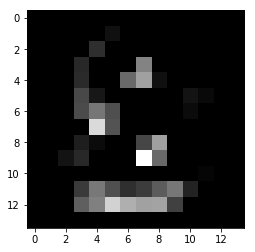

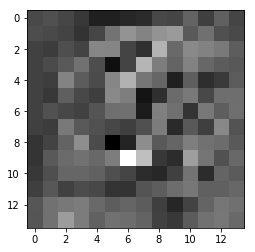

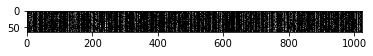

iter:  4200 train_cost:  35.29825 train_acc:  0.984375 test_cost:  33.182556 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


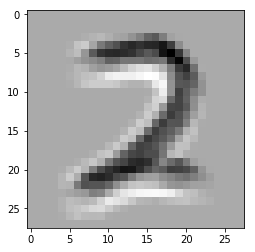

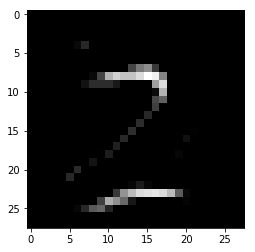

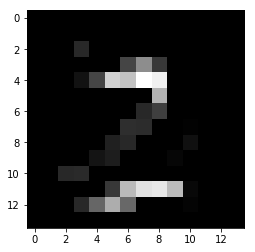

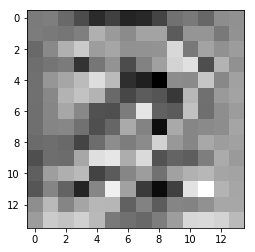

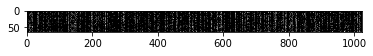

iter:  4300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


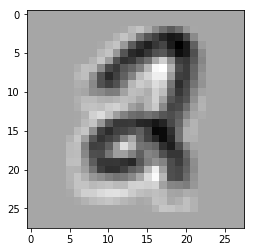

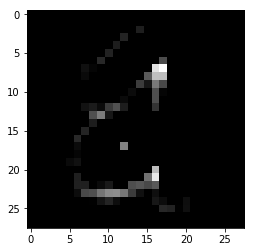

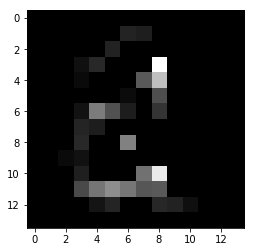

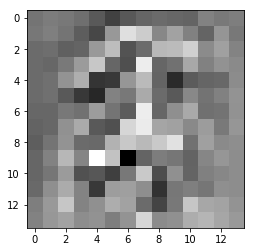

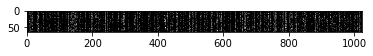

iter:  4400 train_cost:  0.0 train_acc:  1.0 test_cost:  10.826935 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


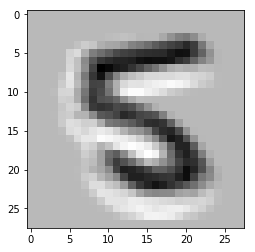

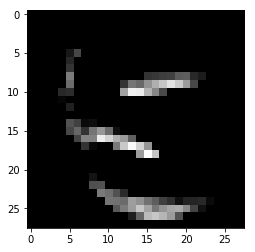

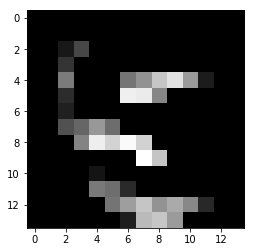

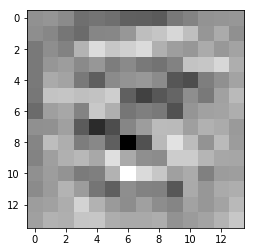

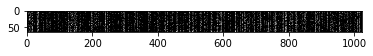

iter:  4500 train_cost:  131.0452 train_acc:  0.984375 test_cost:  20.356506 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


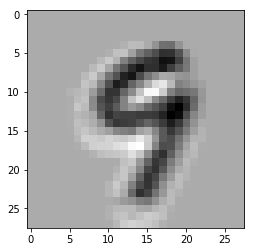

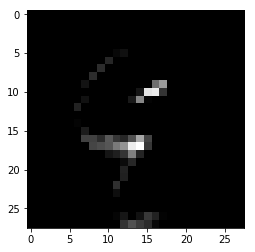

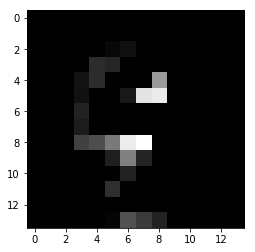

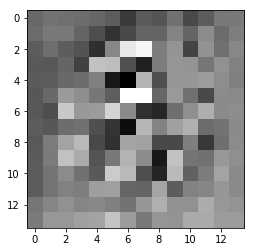

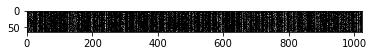

iter:  4600 train_cost:  97.09546 train_acc:  0.984375 test_cost:  14.488571 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


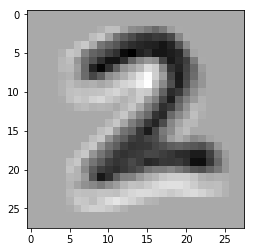

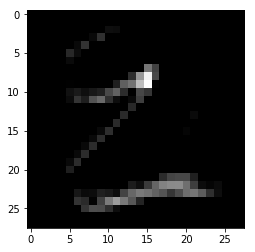

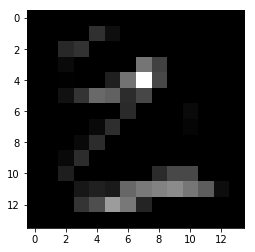

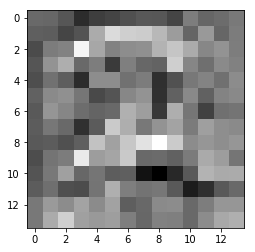

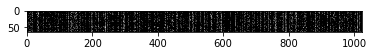

iter:  4700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


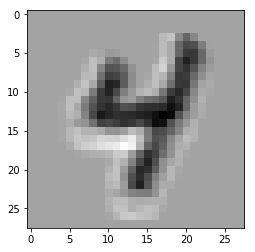

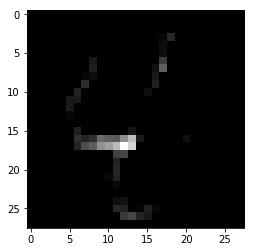

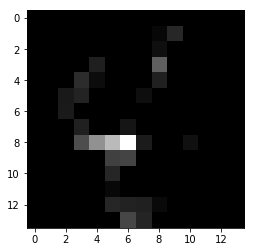

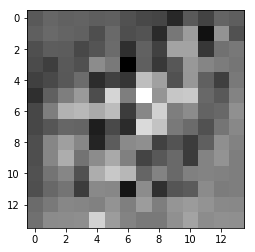

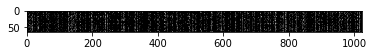

iter:  4800 train_cost:  0.0 train_acc:  1.0 test_cost:  72.61182 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


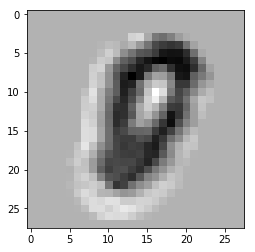

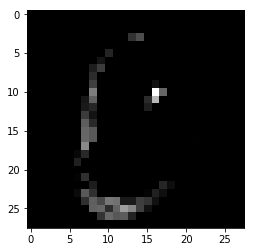

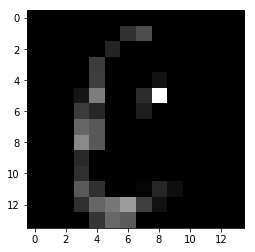

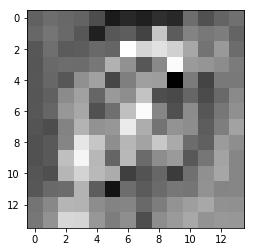

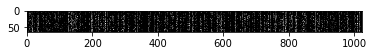

iter:  4900 train_cost:  148.41806 train_acc:  0.984375 test_cost:  152.74107 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


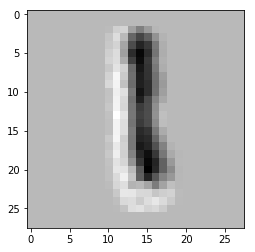

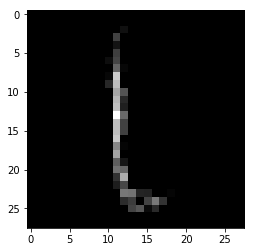

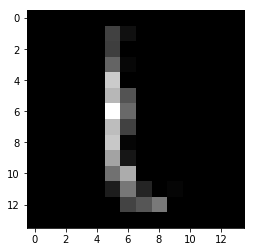

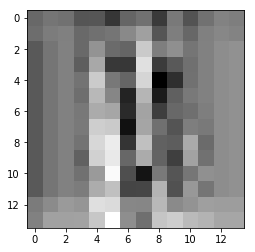

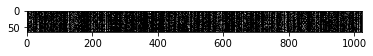

iter:  5000 train_cost:  57.822083 train_acc:  0.984375 test_cost:  0.6235657 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


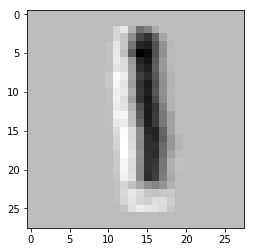

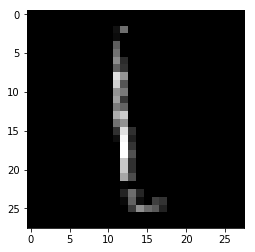

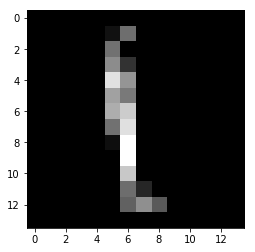

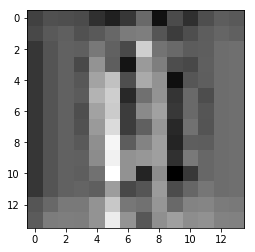

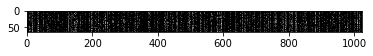

iter:  5100 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


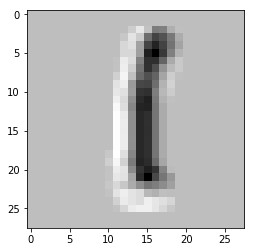

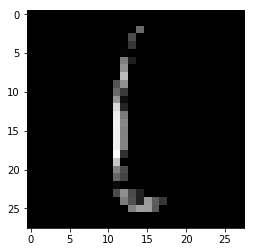

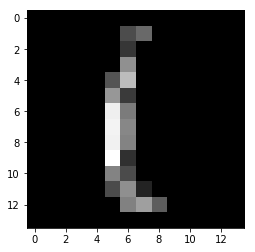

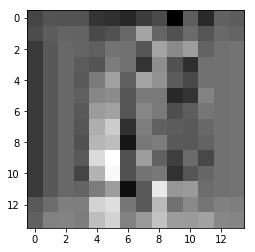

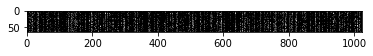

iter:  5200 train_cost:  0.0 train_acc:  1.0 test_cost:  128.48254 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


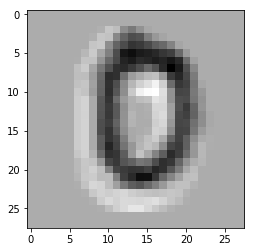

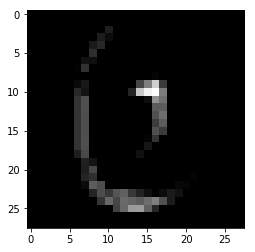

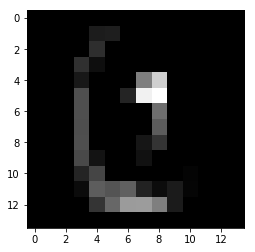

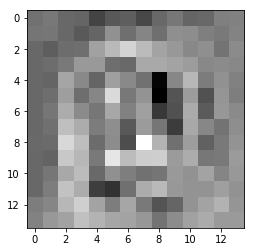

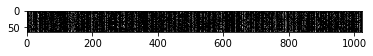

iter:  5300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


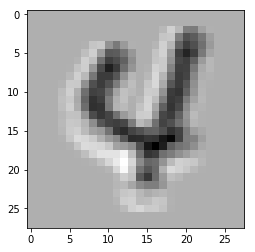

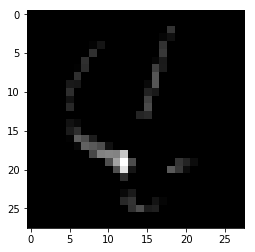

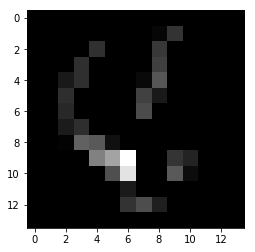

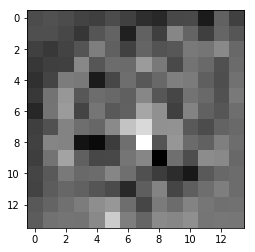

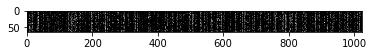

iter:  5400 train_cost:  0.0 train_acc:  1.0 test_cost:  48.003876 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


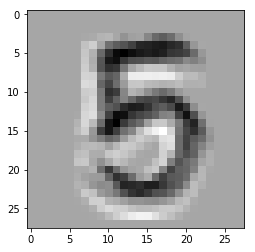

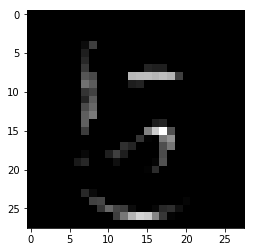

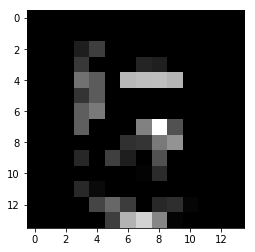

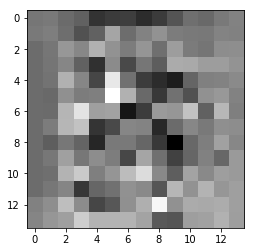

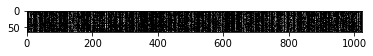

iter:  5500 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


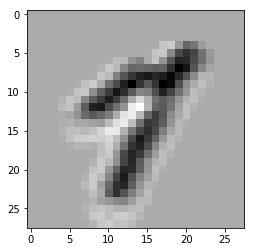

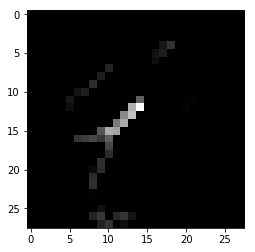

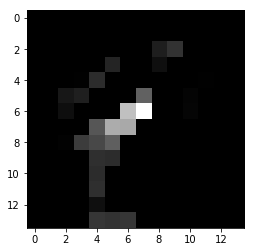

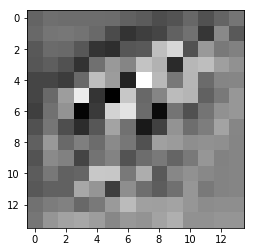

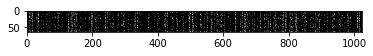

iter:  5600 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


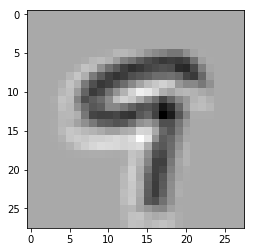

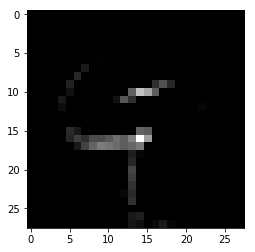

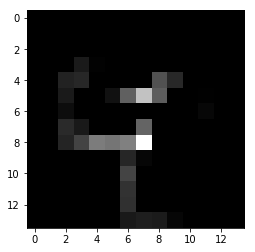

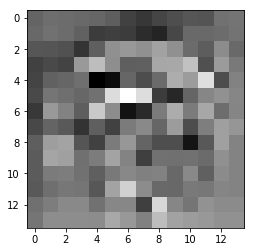

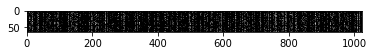

iter:  5700 train_cost:  0.0 train_acc:  1.0 test_cost:  405.19812 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


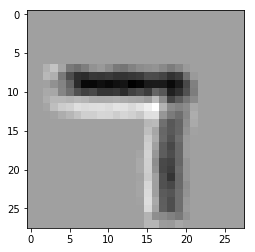

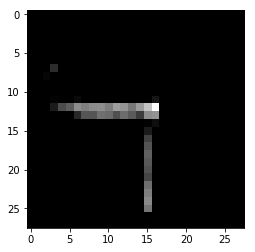

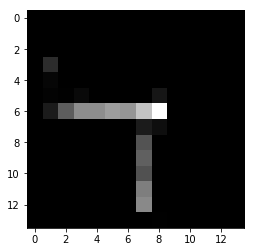

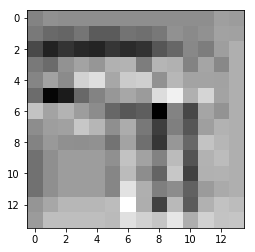

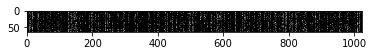

iter:  5800 train_cost:  2.9764404 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


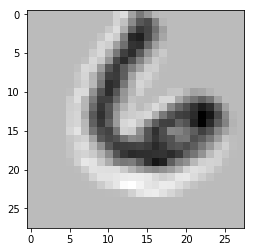

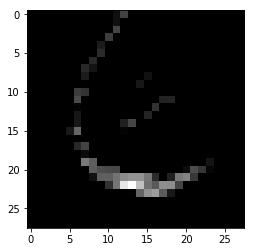

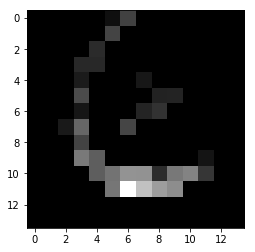

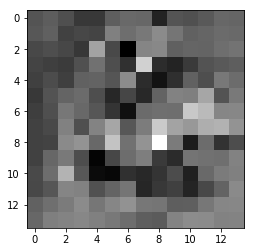

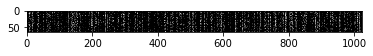

iter:  5900 train_cost:  0.0 train_acc:  1.0 test_cost:  47.226288 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


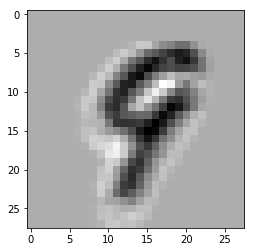

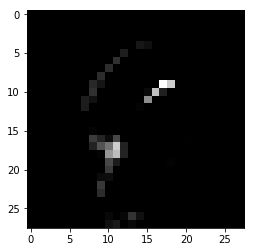

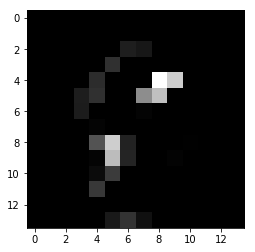

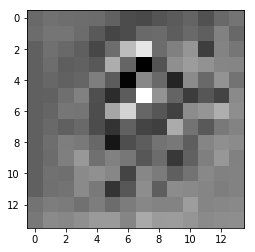

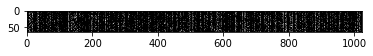

iter:  6000 train_cost:  0.0 train_acc:  1.0 test_cost:  74.8913 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


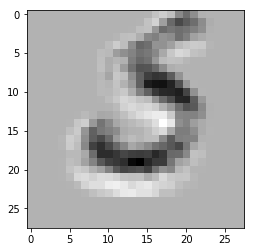

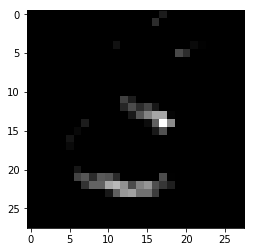

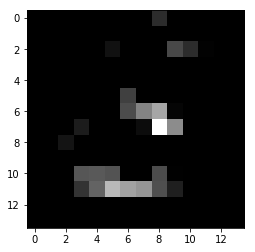

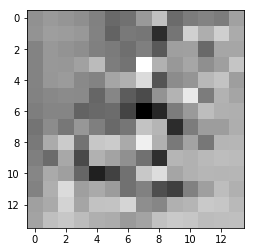

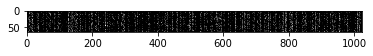

iter:  6100 train_cost:  0.0 train_acc:  1.0 test_cost:  75.69876 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


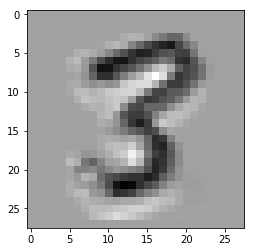

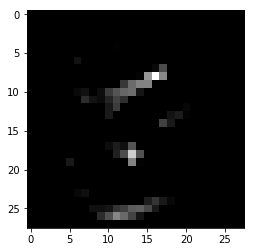

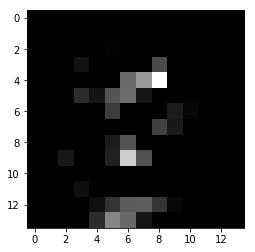

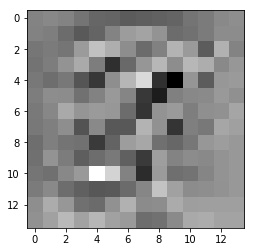

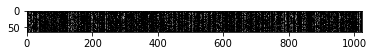

iter:  6200 train_cost:  0.0 train_acc:  1.0 test_cost:  216.48543 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


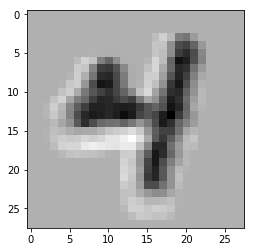

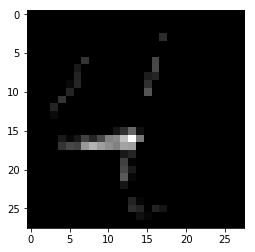

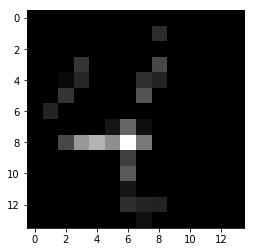

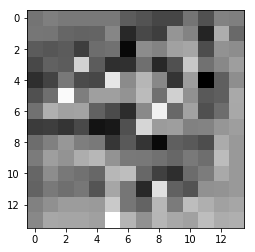

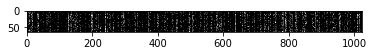

iter:  6300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


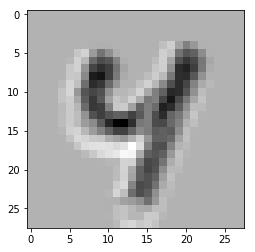

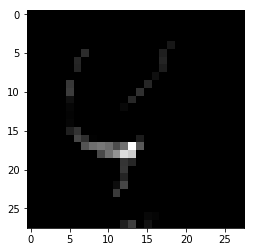

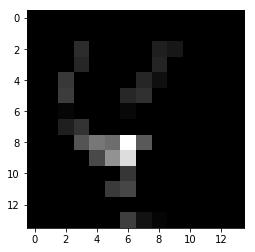

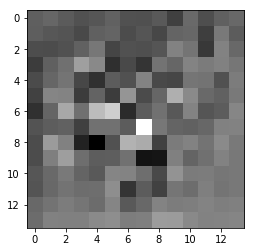

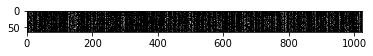

iter:  6400 train_cost:  0.0 train_acc:  1.0 test_cost:  31.808105 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


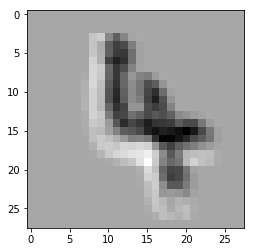

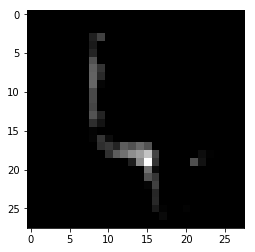

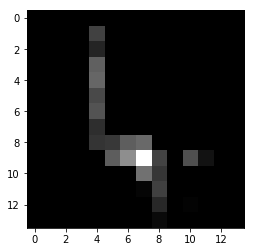

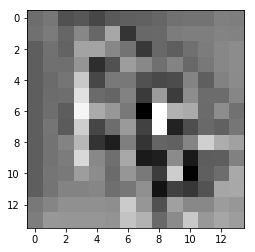

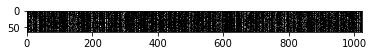

iter:  6500 train_cost:  0.0 train_acc:  1.0 test_cost:  244.73534 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


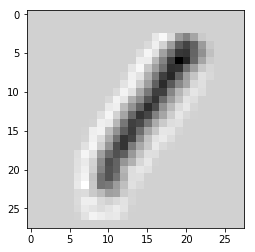

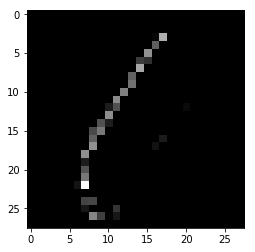

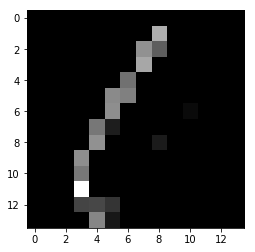

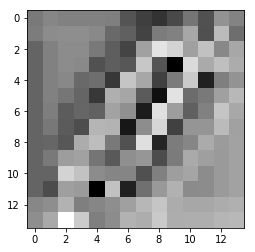

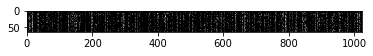

iter:  6600 train_cost:  5.208374 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


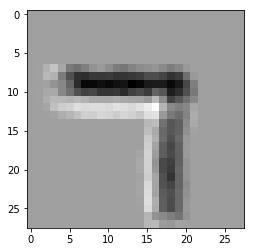

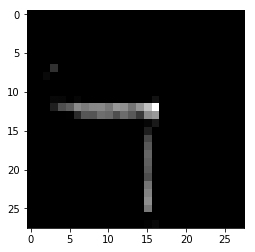

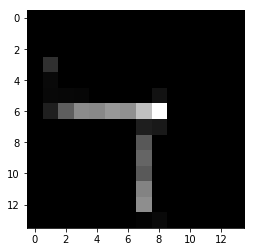

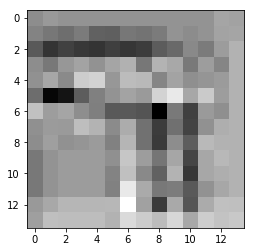

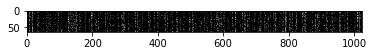

iter:  6700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


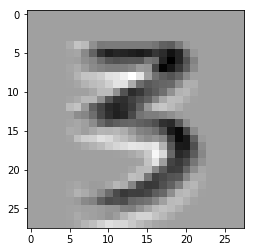

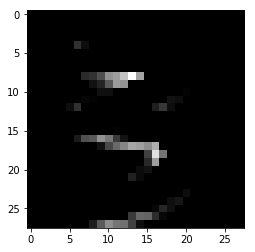

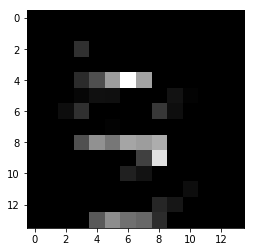

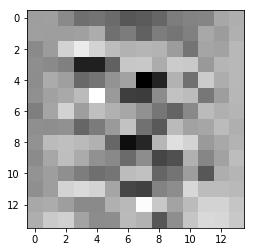

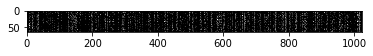

iter:  6800 train_cost:  8.089584 train_acc:  0.984375 test_cost:  363.9394 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


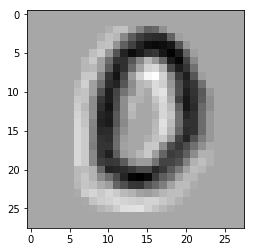

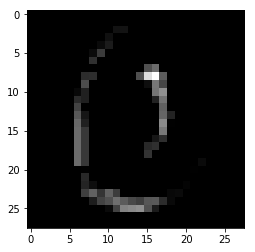

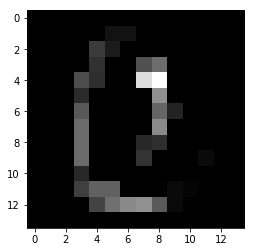

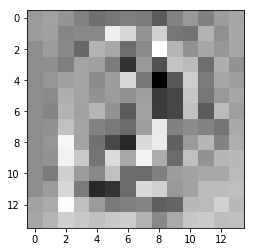

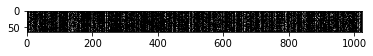

iter:  6900 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


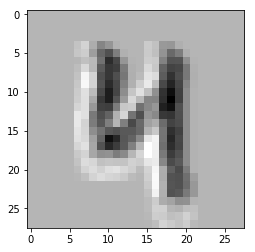

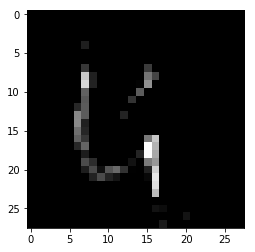

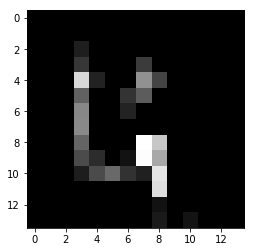

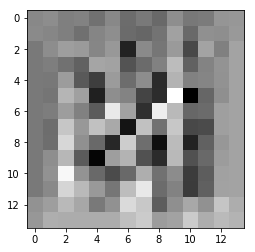

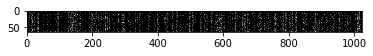

iter:  7000 train_cost:  0.0 train_acc:  1.0 test_cost:  143.73158 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


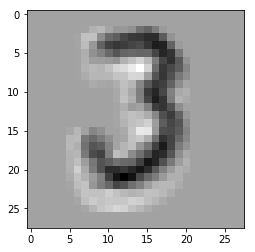

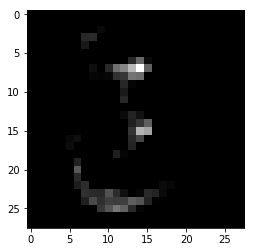

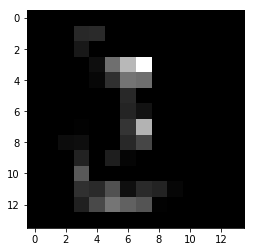

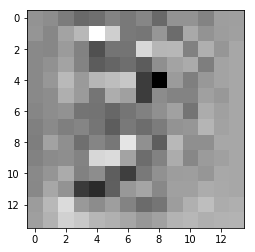

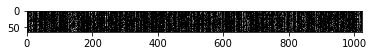

iter:  7100 train_cost:  0.0 train_acc:  1.0 test_cost:  108.32951 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


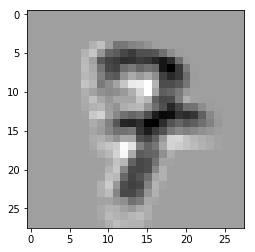

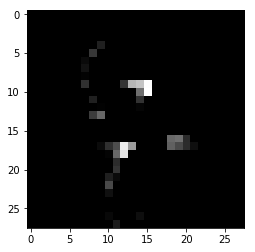

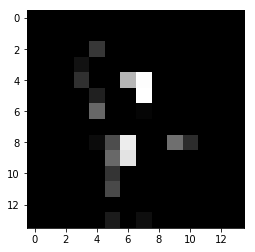

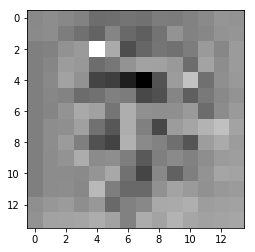

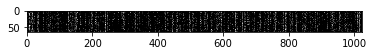

iter:  7200 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


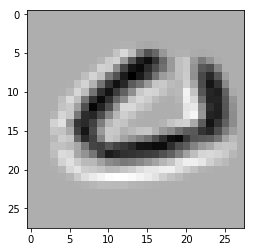

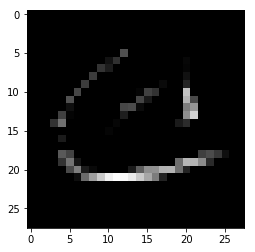

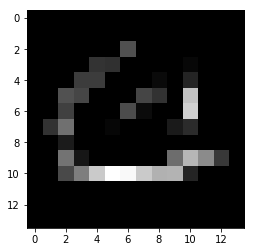

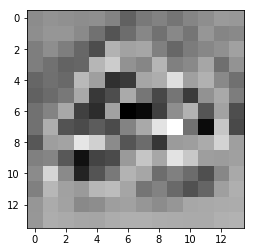

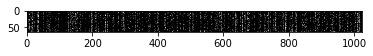

iter:  7300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


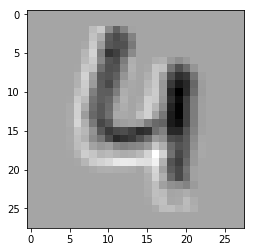

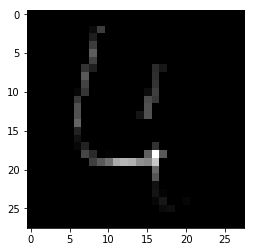

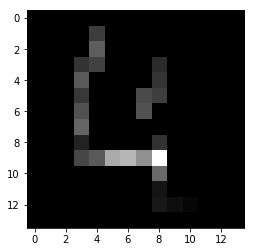

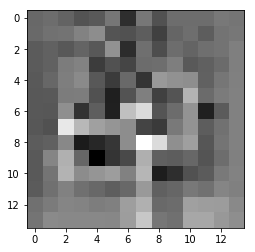

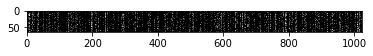

iter:  7400 train_cost:  27.814728 train_acc:  0.984375 test_cost:  232.57248 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


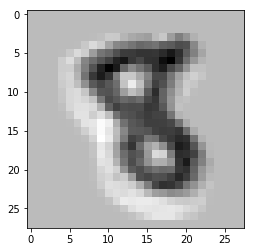

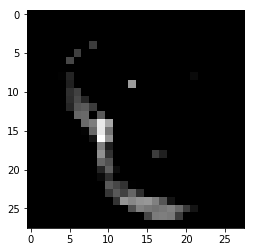

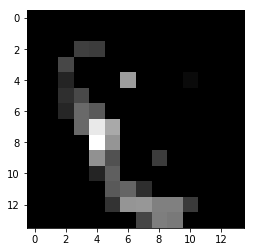

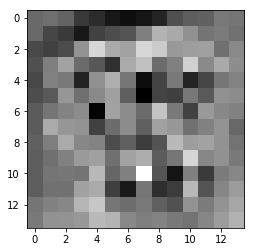

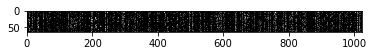

iter:  7500 train_cost:  16.7956 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


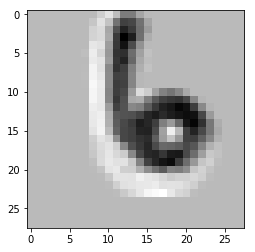

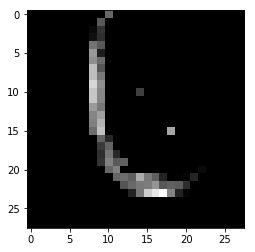

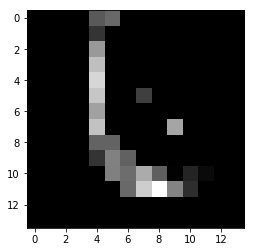

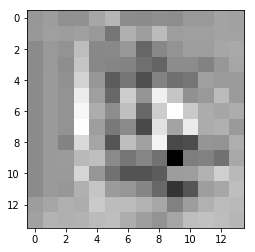

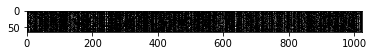

iter:  7600 train_cost:  0.0 train_acc:  1.0 test_cost:  375.5082 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


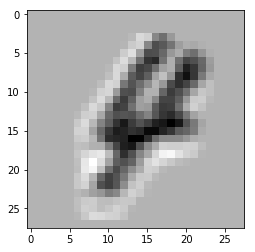

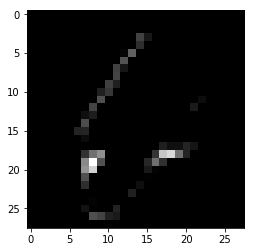

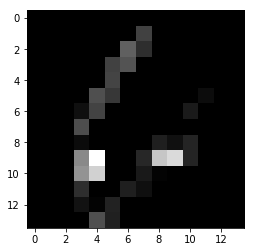

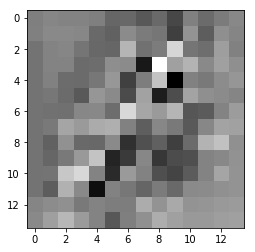

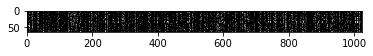

iter:  7700 train_cost:  80.7348 train_acc:  0.984375 test_cost:  138.79471 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


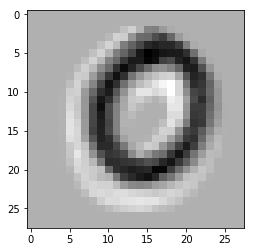

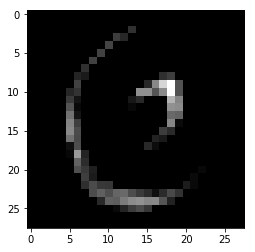

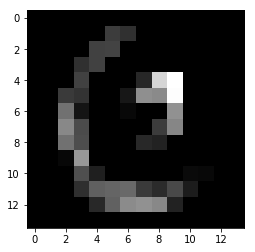

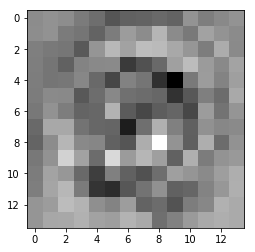

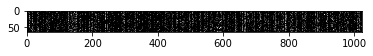

iter:  7800 train_cost:  0.0 train_acc:  1.0 test_cost:  210.76819 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


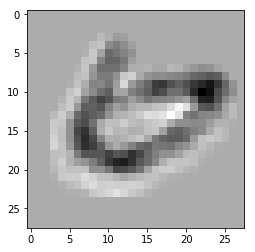

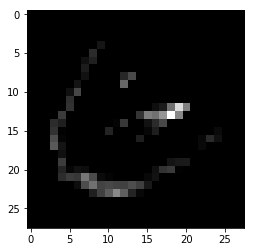

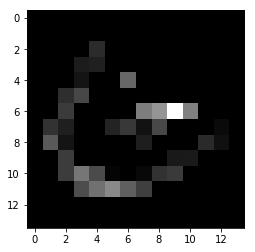

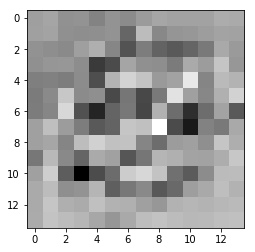

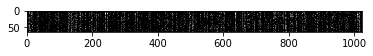

iter:  7900 train_cost:  0.0 train_acc:  1.0 test_cost:  381.46054 test_acc:  0.90625 num_of_returned_sensors: 7
(64, 1024)


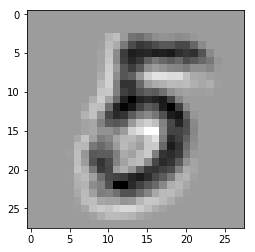

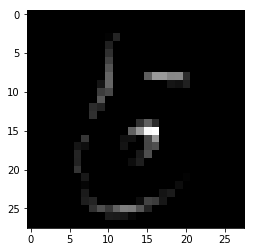

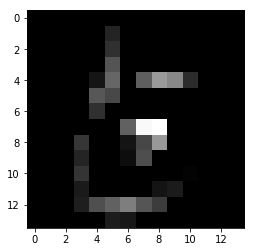

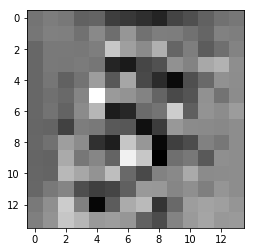

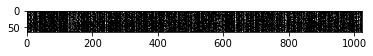

iter:  8000 train_cost:  29.375366 train_acc:  0.984375 test_cost:  14.402069 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


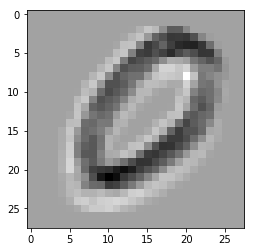

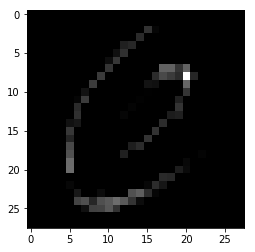

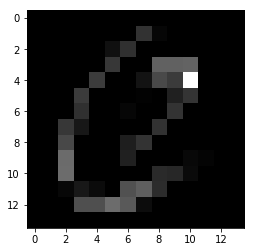

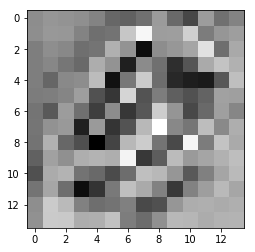

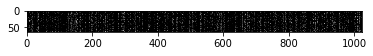

iter:  8100 train_cost:  64.49545 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


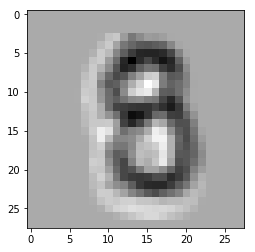

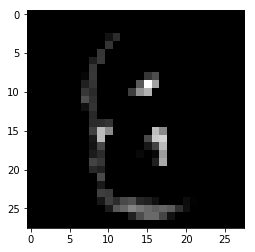

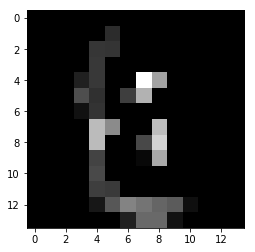

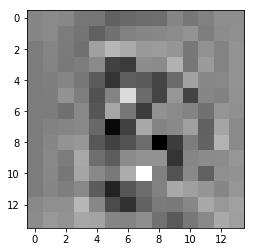

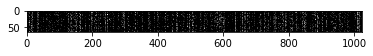

iter:  8200 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


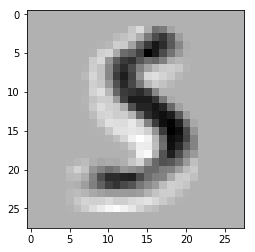

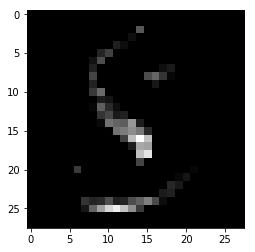

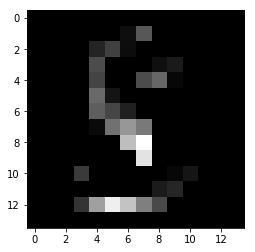

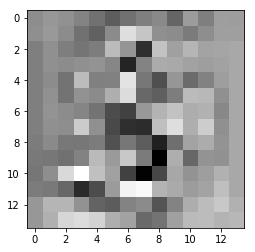

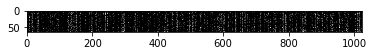

iter:  8300 train_cost:  0.0 train_acc:  1.0 test_cost:  267.35553 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


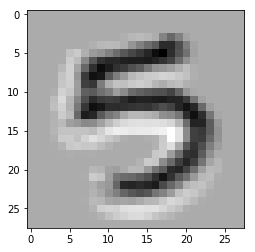

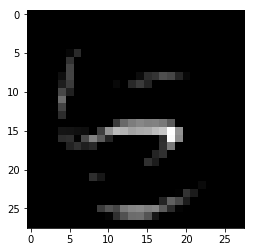

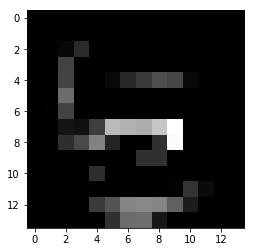

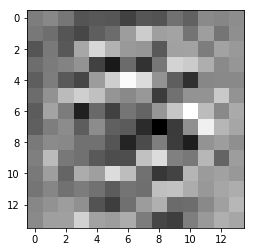

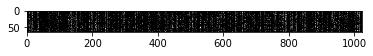

iter:  8400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


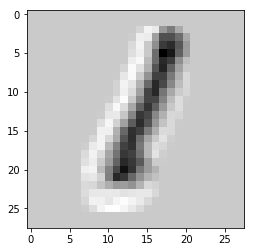

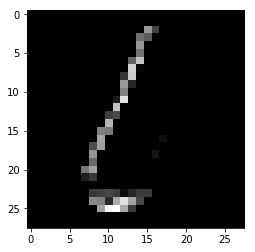

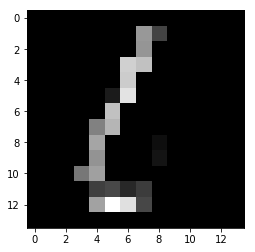

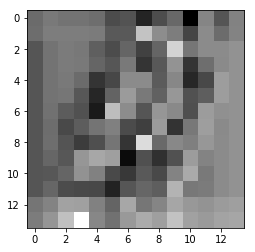

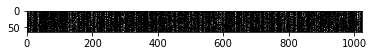

iter:  8500 train_cost:  0.0 train_acc:  1.0 test_cost:  7.0032654 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


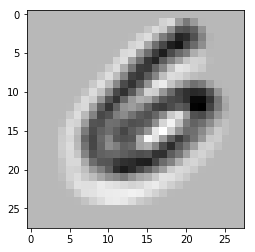

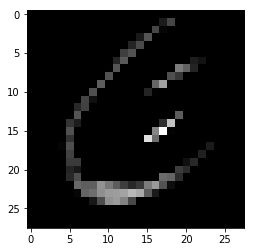

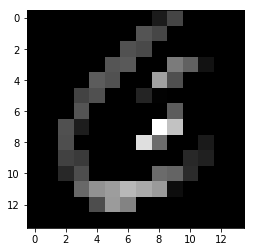

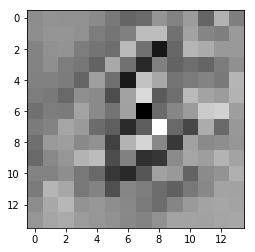

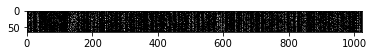

iter:  8600 train_cost:  0.0 train_acc:  1.0 test_cost:  44.661987 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


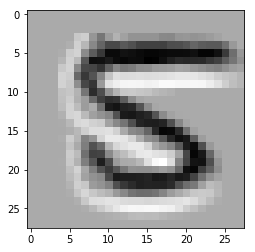

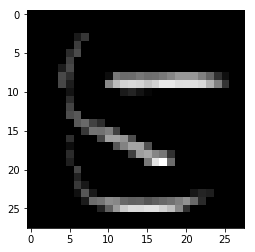

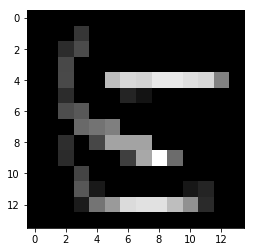

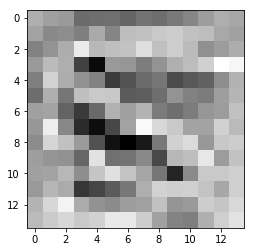

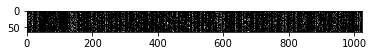

iter:  8700 train_cost:  0.0 train_acc:  1.0 test_cost:  317.365 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


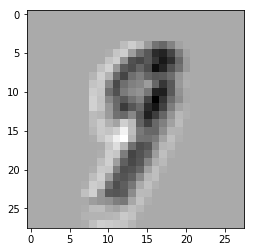

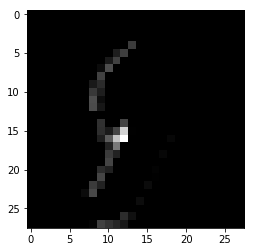

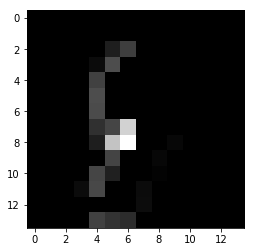

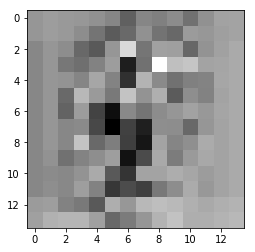

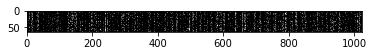

iter:  8800 train_cost:  0.0 train_acc:  1.0 test_cost:  54.210403 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


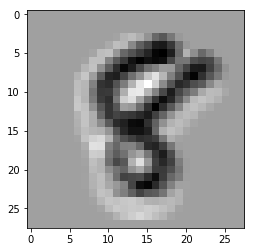

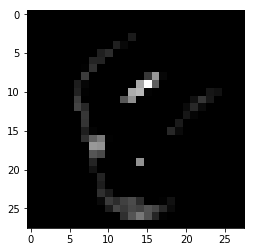

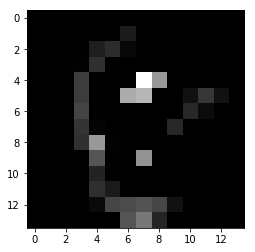

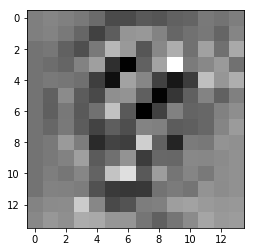

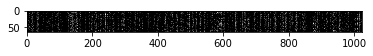

iter:  8900 train_cost:  0.0 train_acc:  1.0 test_cost:  178.46645 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


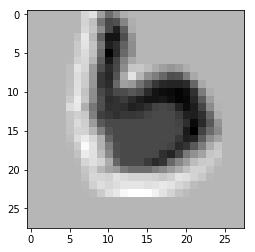

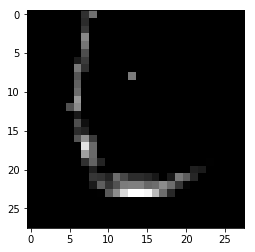

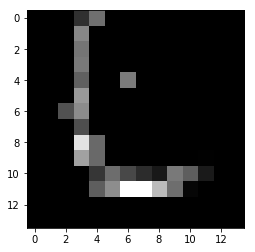

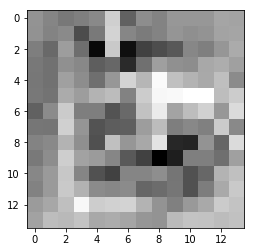

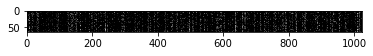

iter:  9000 train_cost:  0.0 train_acc:  1.0 test_cost:  457.39215 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


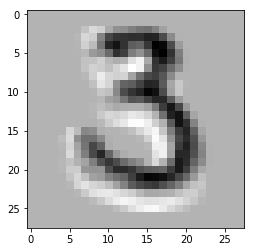

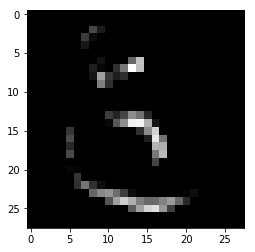

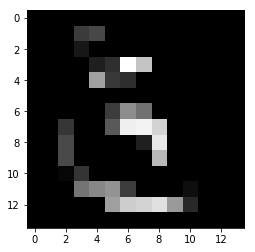

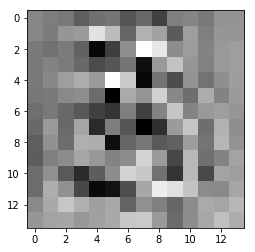

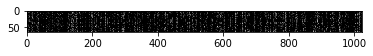

iter:  9100 train_cost:  0.0 train_acc:  1.0 test_cost:  17.186981 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


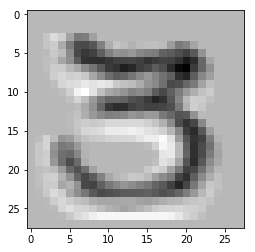

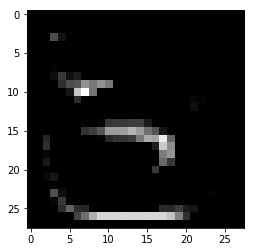

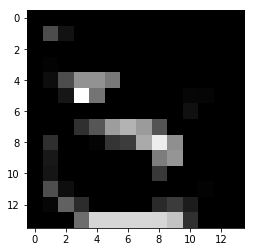

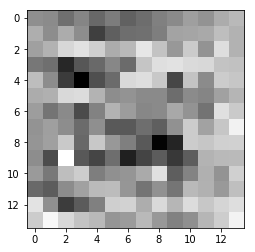

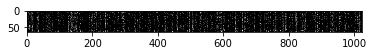

iter:  9200 train_cost:  0.0 train_acc:  1.0 test_cost:  138.54666 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


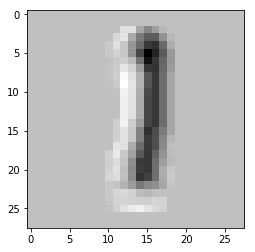

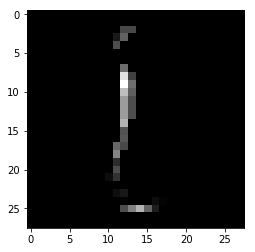

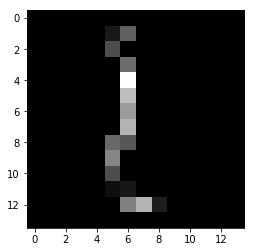

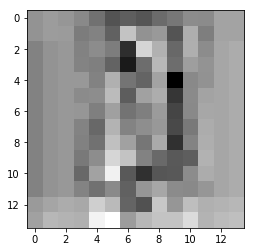

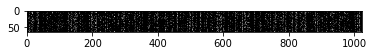

iter:  9300 train_cost:  0.0 train_acc:  1.0 test_cost:  280.6559 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


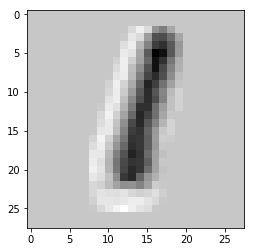

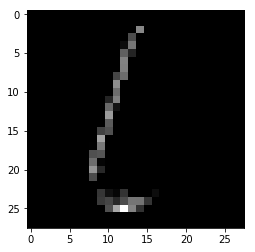

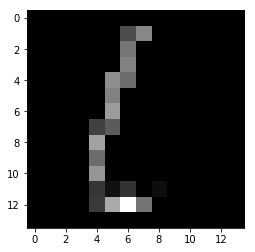

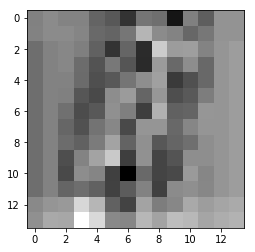

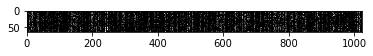

iter:  9400 train_cost:  0.0 train_acc:  1.0 test_cost:  32.04412 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


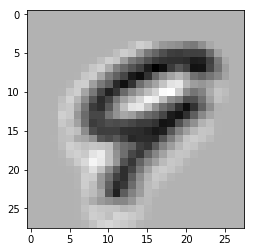

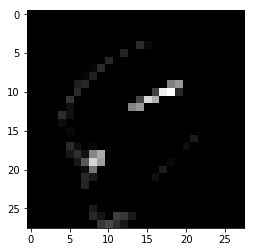

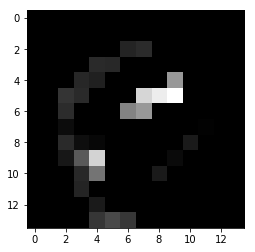

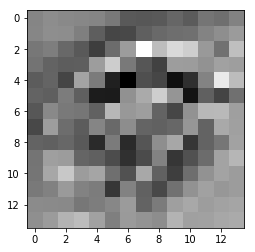

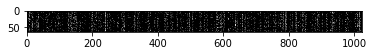

iter:  9500 train_cost:  0.0 train_acc:  1.0 test_cost:  136.3806 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


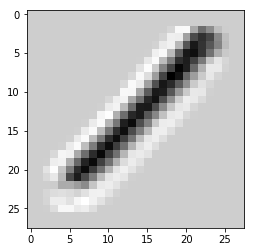

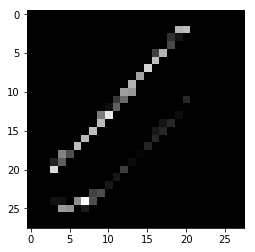

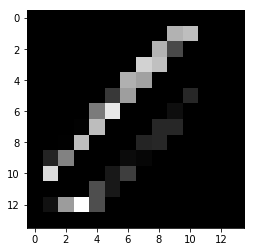

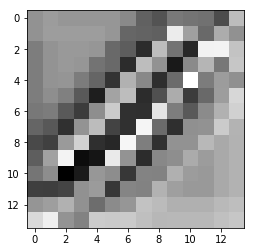

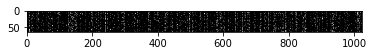

iter:  9600 train_cost:  0.0 train_acc:  1.0 test_cost:  65.23363 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


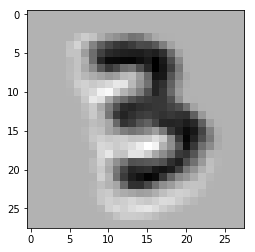

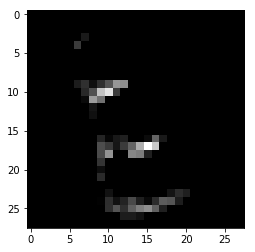

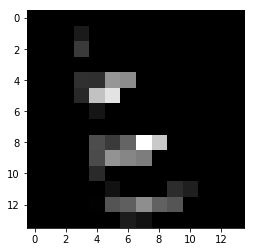

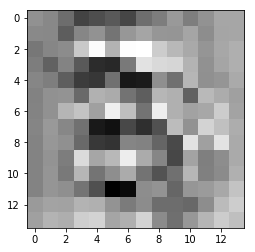

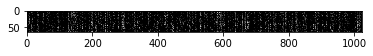

iter:  9700 train_cost:  0.0 train_acc:  1.0 test_cost:  58.294373 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


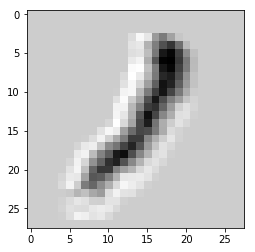

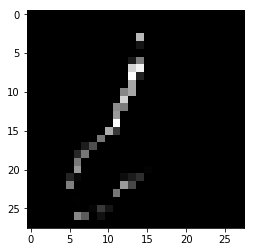

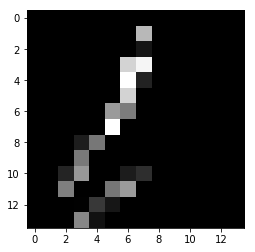

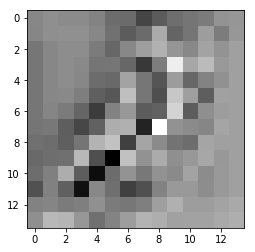

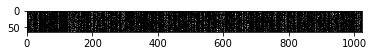

iter:  9800 train_cost:  13.59214 train_acc:  0.984375 test_cost:  80.203094 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


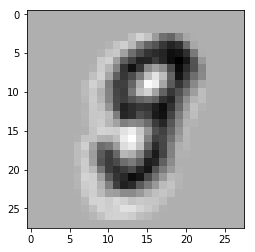

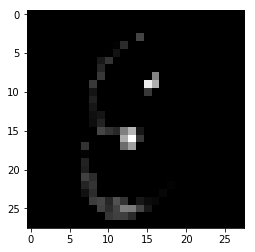

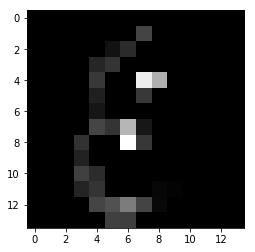

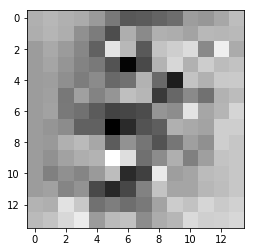

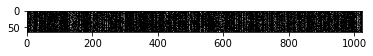

iter:  9900 train_cost:  0.0 train_acc:  1.0 test_cost:  21.833282 test_acc:  0.984375 num_of_returned_sensors: 7
predicted  [[-0.5398449   1.9091425  -4.768485   -1.012809  ]
 [-0.4571936   1.9274188  -4.9871335  -1.0731573 ]
 [-0.44902742  1.9485327  -5.039193   -1.0928013 ]
 [-0.55723965  1.9725279  -5.0117664  -0.9602711 ]
 [-0.48303926  1.967419   -5.101678   -1.0400381 ]
 [-0.45497298  1.9229008  -4.982307   -1.072427  ]
 [-0.5478431   1.9715488  -4.9716506  -0.9951787 ]
 [-0.5042219   1.9594343  -5.003442   -1.0368693 ]
 [-0.60078406  1.9309117  -4.71745    -0.976722  ]
 [-0.46557295  1.9556713  -5.12629    -1.0454118 ]]
real  [[0.50140198 0.38946274 0.29157792 0.43128381]
 [0.81805403 0.10340377 0.41850564 0.30723602]
 [0.00385185 0.13935884 0.42937669 0.7403306 ]
 [0.41029699 0.24453929 0.3163657  0.59763345]
 [0.57774411 0.22558469 0.52790553 0.18526912]
 [0.49229975 0.87958722 0.24087751 0.15833543]
 [0.57111526 0.72321403 0.81451691 0.5595554 ]
 [0.9098352  0.47598493 0.609

In [22]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf

import matplotlib.pyplot as plt
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv_pre_actv_1 = conv2d(x, weights['wc1'], biases['bc1'])
        conv_actv_1 = tf.nn.relu(conv_pre_actv_1)
        
        print('conv_actv_1 max',conv_actv_1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv_actv_1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv_pre_actv_2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        conv_actv_2 = tf.nn.relu(conv_pre_actv_2)

        
        print('con2_before max',conv_actv_2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv_actv_2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
    list_of_tensors = [conv_pre_actv_1,conv_actv_1, conv1,conv_pre_actv_2,conv_actv_2, conv2, fc1]
    return out, list_of_tensors


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p,list_of_tensors = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('operations'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
merged = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([merged,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([merged,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        train_writer.add_summary(summary, i)
        
        if i % 100 ==0:
            
           
            val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
            num_of_returned_sensors = len(val_list_of_tensors)
            
            print(val_list_of_tensors[-1].shape)
            
            imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')# conv1 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[1][0,:,:,0],  cmap='gray')# conv1 after-activation first input image first filter
            plt.show()

            
            imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')# conv2 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')# conv2 after-activation first input image first filter
            plt.show()
            
            imshow(val_list_of_tensors[-1], cmap='gray')# conv2 pre-activation first input image first filter
            plt.show()


            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc, 'num_of_returned_sensors:', num_of_returned_sensors )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)

# Tensorboard Visualisation

In [23]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-06-07 16:53:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.203.66.95, 34.195.49.195, 52.54.84.112, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.203.66.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  15.88M  40.7MB/s    in 0.4s    

2019-06-07 16:53:59 (40.7 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   


In [0]:
!rm -rf log2

In [0]:
LOG_DIR = './log2'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6009 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6009 &')

In [27]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://86ef33b5.ngrok.io


conv_actv_1 max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started
(64, 1024)


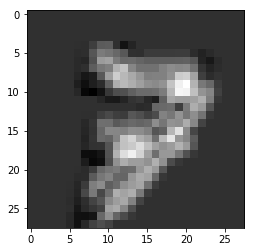

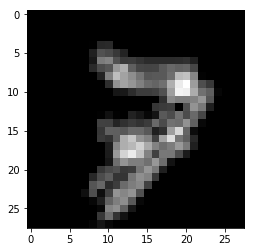

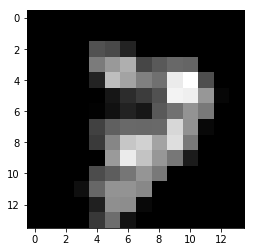

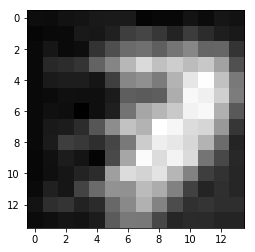

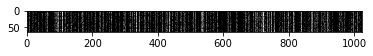

iter:  0 train_cost:  42073.176 train_acc:  0.109375 test_cost:  48305.258 test_acc:  0.140625 num_of_returned_sensors: 7
(64, 1024)


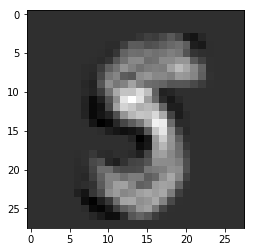

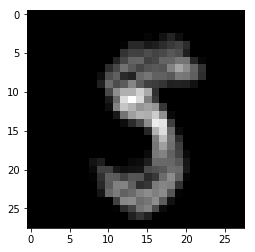

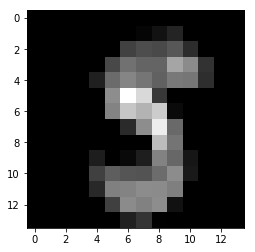

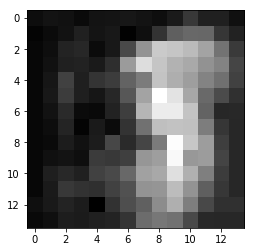

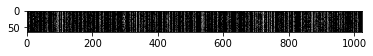

iter:  100 train_cost:  806.8325 train_acc:  0.9375 test_cost:  1368.4518 test_acc:  0.859375 num_of_returned_sensors: 7
(64, 1024)


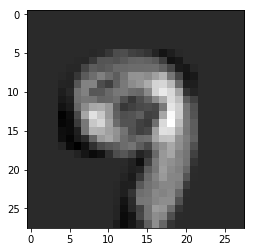

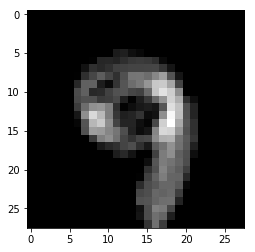

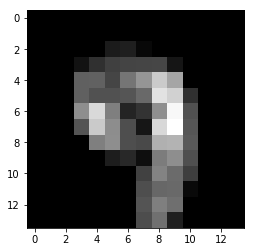

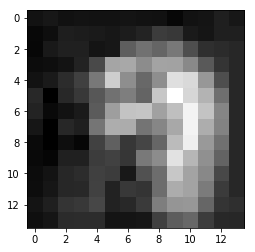

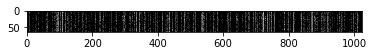

iter:  200 train_cost:  663.6625 train_acc:  0.921875 test_cost:  633.7859 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


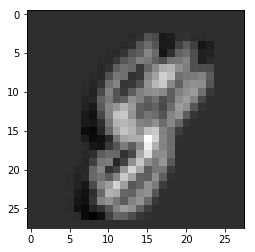

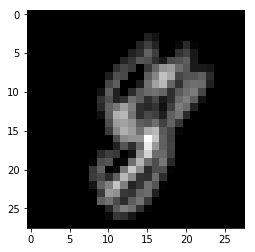

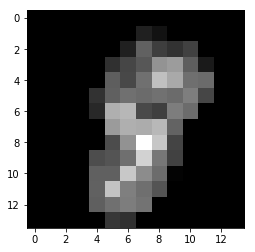

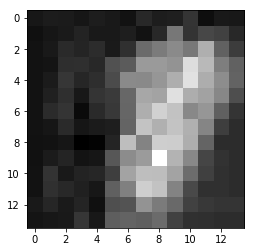

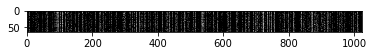

iter:  300 train_cost:  753.0404 train_acc:  0.921875 test_cost:  878.8601 test_acc:  0.875 num_of_returned_sensors: 7
(64, 1024)


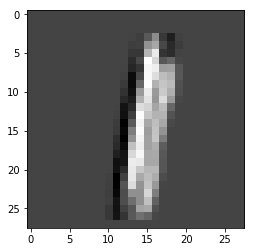

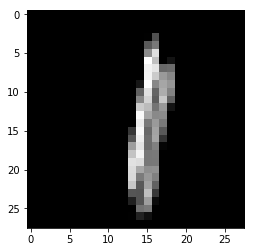

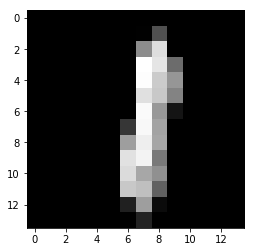

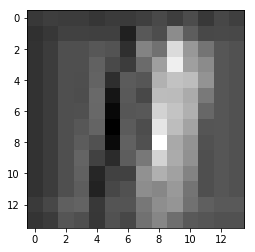

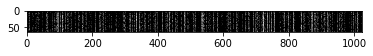

iter:  400 train_cost:  967.459 train_acc:  0.9375 test_cost:  520.34143 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


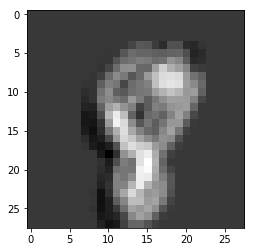

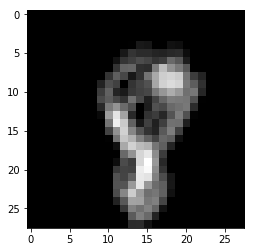

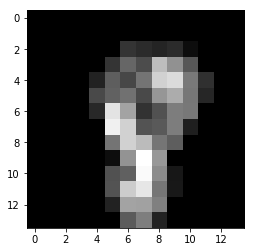

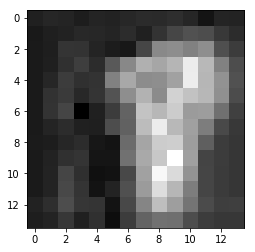

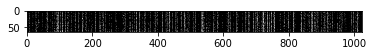

iter:  500 train_cost:  492.87894 train_acc:  0.953125 test_cost:  962.17255 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


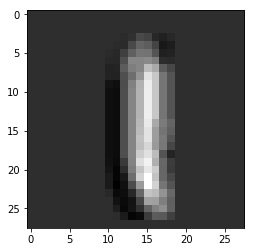

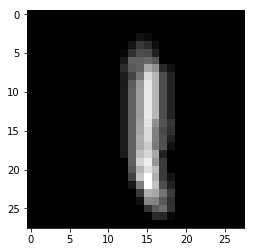

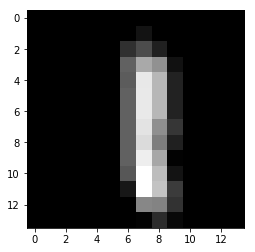

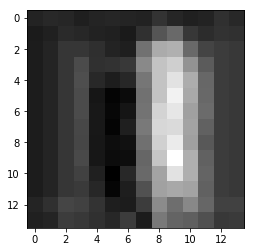

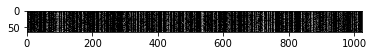

iter:  600 train_cost:  445.8246 train_acc:  0.9375 test_cost:  748.488 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


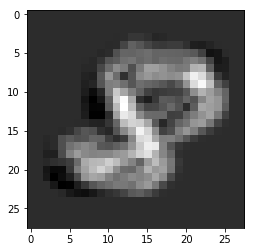

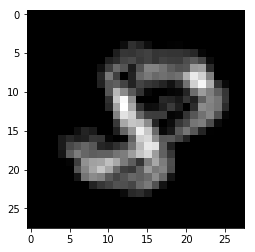

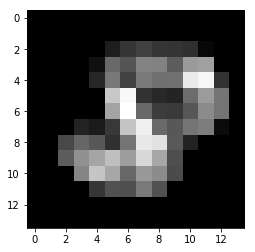

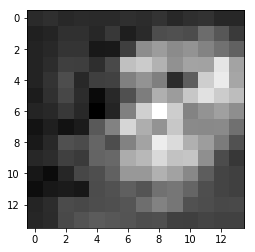

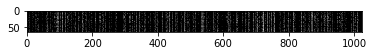

iter:  700 train_cost:  402.3465 train_acc:  0.96875 test_cost:  6.7168884 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


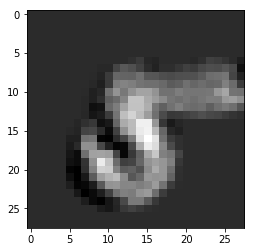

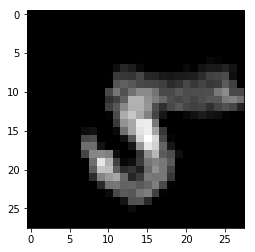

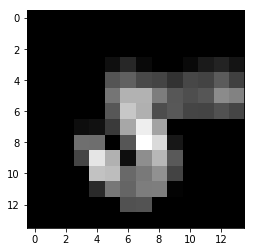

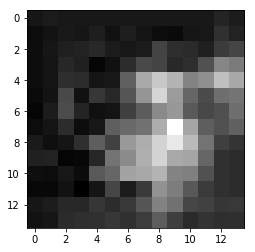

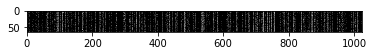

iter:  800 train_cost:  460.77655 train_acc:  0.984375 test_cost:  723.39465 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


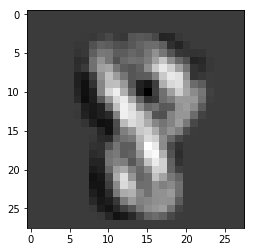

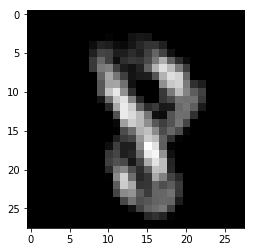

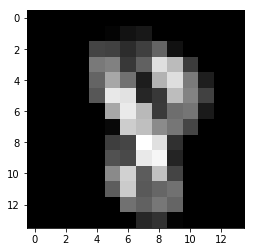

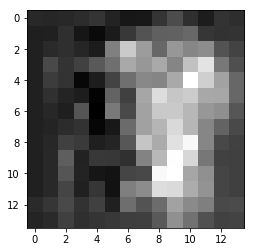

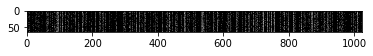

iter:  900 train_cost:  792.87463 train_acc:  0.953125 test_cost:  7.0462646 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


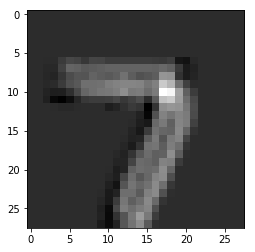

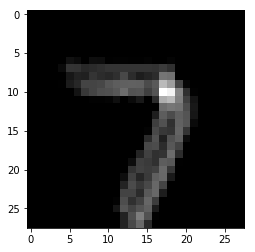

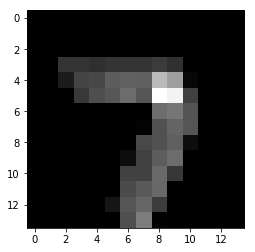

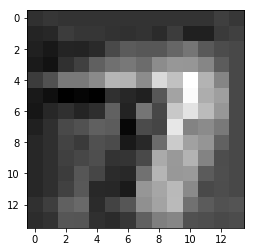

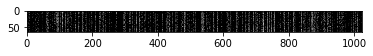

iter:  1000 train_cost:  0.0 train_acc:  1.0 test_cost:  451.5826 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


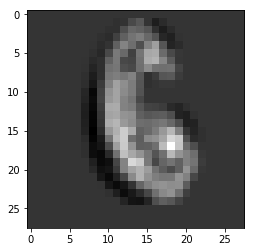

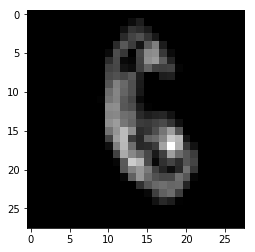

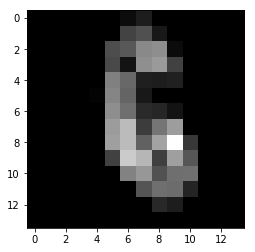

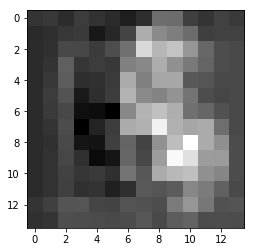

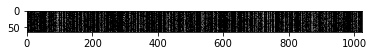

iter:  1100 train_cost:  0.0 train_acc:  1.0 test_cost:  448.7193 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


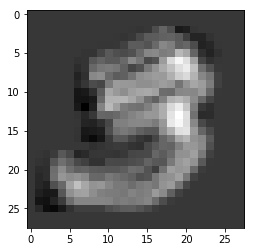

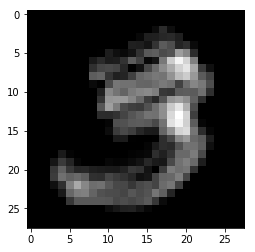

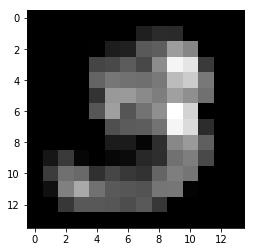

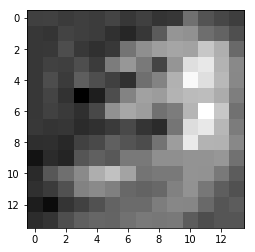

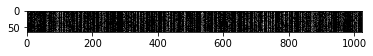

iter:  1200 train_cost:  362.61127 train_acc:  0.9375 test_cost:  13.021088 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


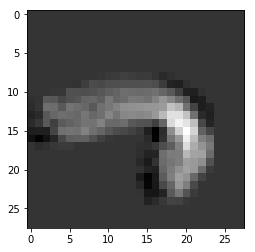

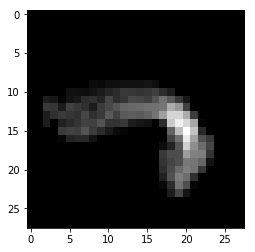

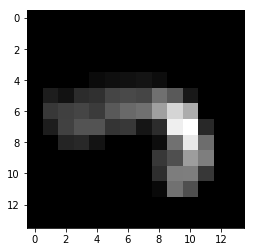

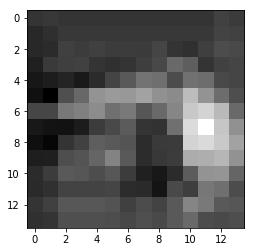

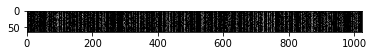

iter:  1300 train_cost:  74.532166 train_acc:  0.984375 test_cost:  176.62697 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


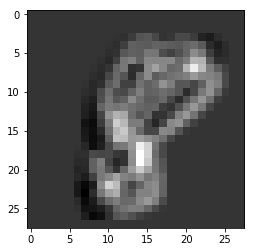

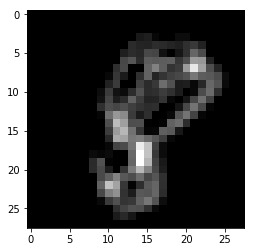

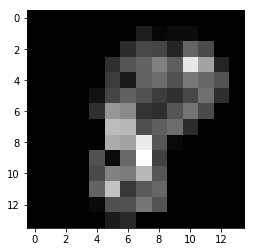

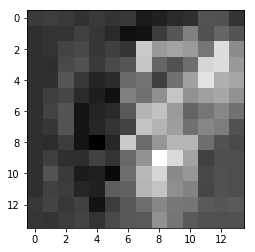

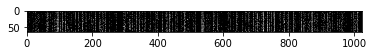

iter:  1400 train_cost:  26.344543 train_acc:  0.984375 test_cost:  355.76328 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


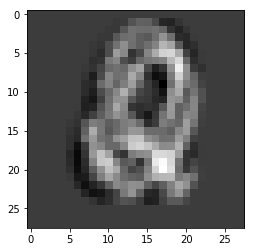

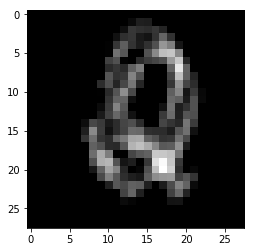

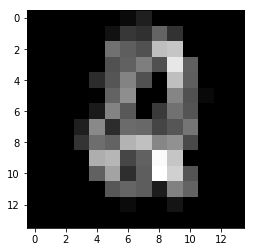

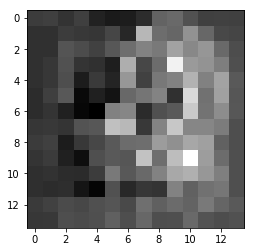

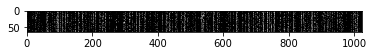

iter:  1500 train_cost:  0.0 train_acc:  1.0 test_cost:  351.0807 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


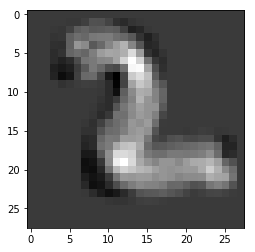

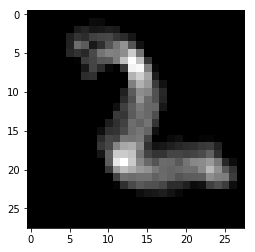

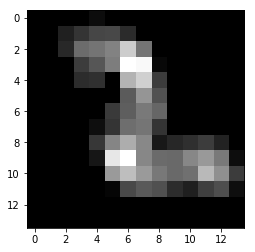

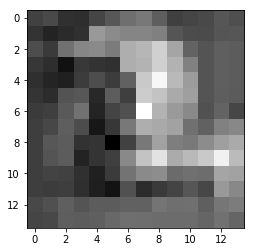

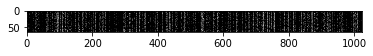

iter:  1600 train_cost:  80.23404 train_acc:  0.953125 test_cost:  21.869823 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


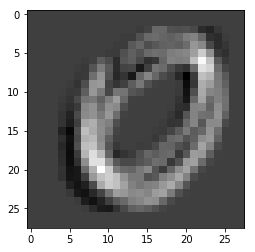

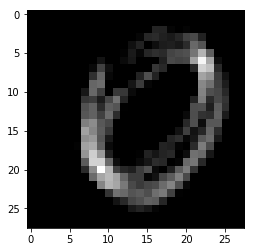

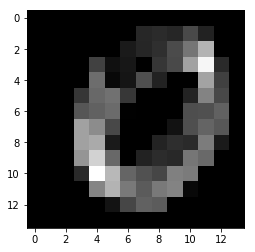

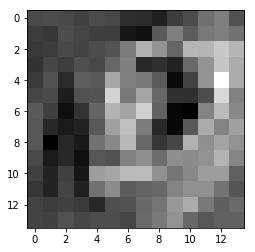

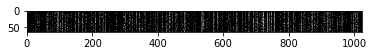

iter:  1700 train_cost:  474.46277 train_acc:  0.96875 test_cost:  382.41235 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


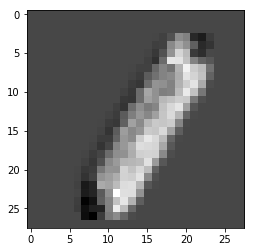

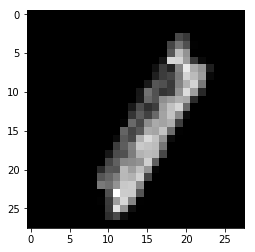

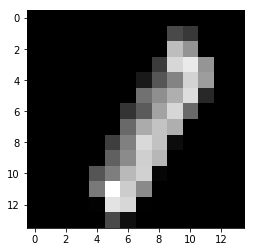

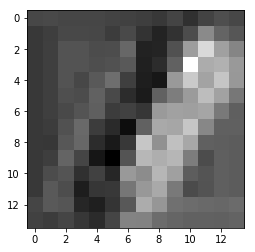

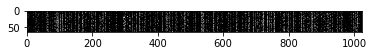

iter:  1800 train_cost:  23.539764 train_acc:  0.984375 test_cost:  370.14923 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


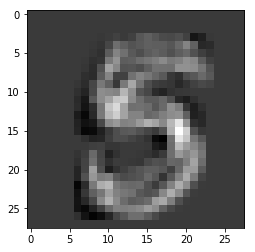

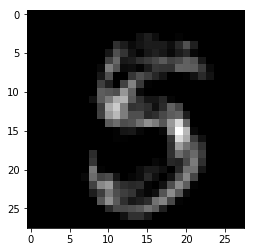

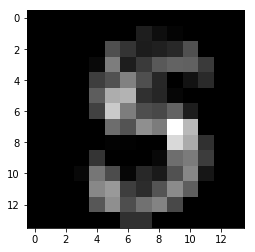

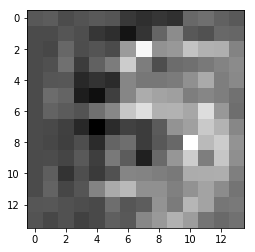

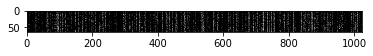

iter:  1900 train_cost:  166.78378 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


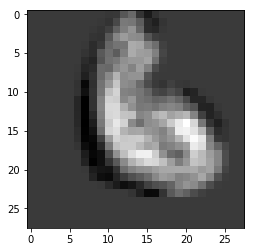

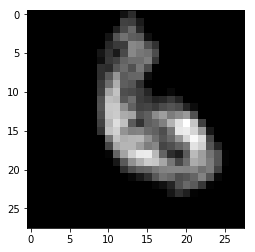

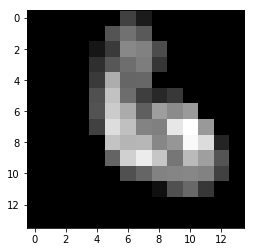

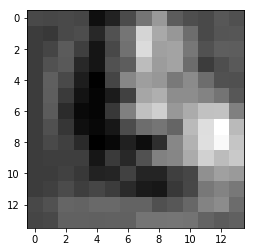

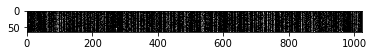

iter:  2000 train_cost:  0.0 train_acc:  1.0 test_cost:  141.46423 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


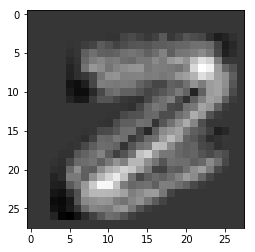

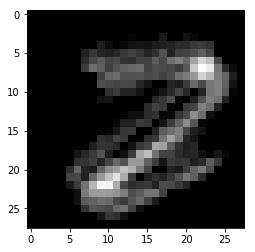

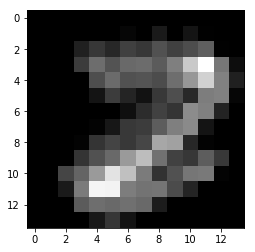

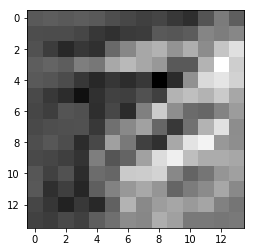

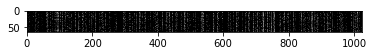

iter:  2100 train_cost:  0.0 train_acc:  1.0 test_cost:  702.427 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


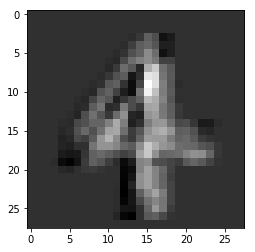

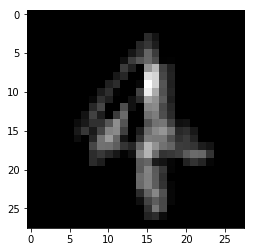

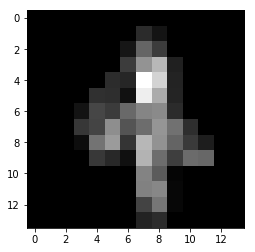

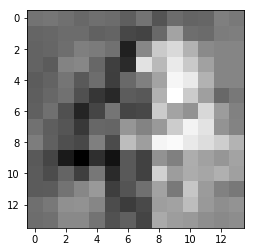

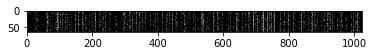

iter:  2200 train_cost:  265.79507 train_acc:  0.984375 test_cost:  125.74849 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


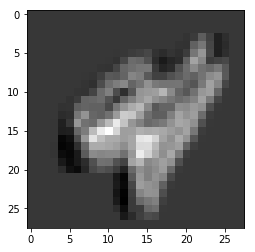

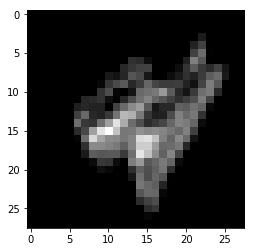

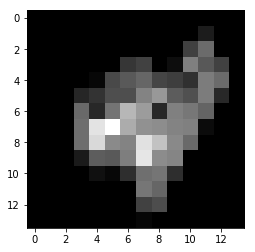

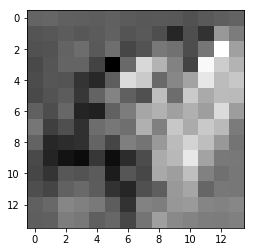

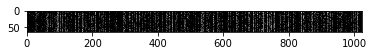

iter:  2300 train_cost:  0.0 train_acc:  1.0 test_cost:  539.41205 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


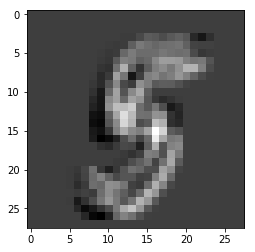

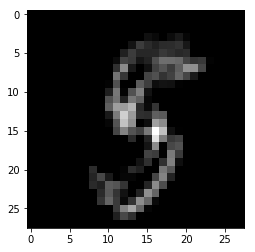

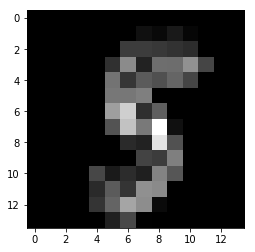

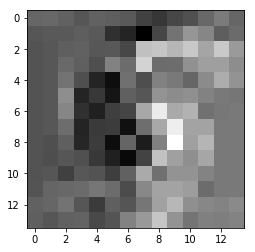

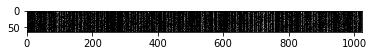

iter:  2400 train_cost:  0.0 train_acc:  1.0 test_cost:  54.340393 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


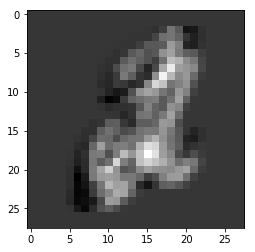

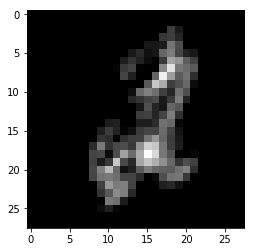

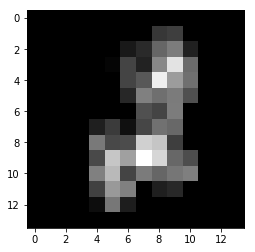

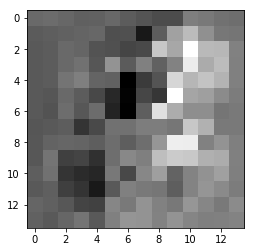

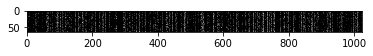

iter:  2500 train_cost:  151.33339 train_acc:  0.96875 test_cost:  779.5149 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


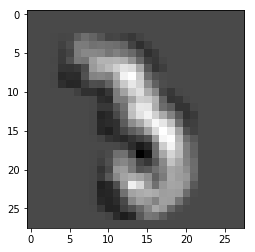

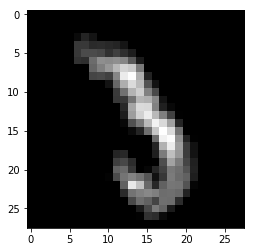

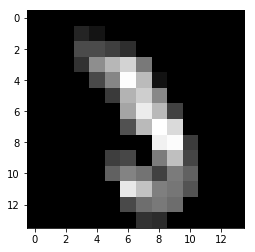

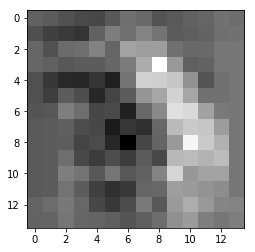

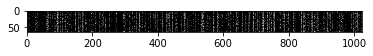

iter:  2600 train_cost:  0.0 train_acc:  1.0 test_cost:  536.54803 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


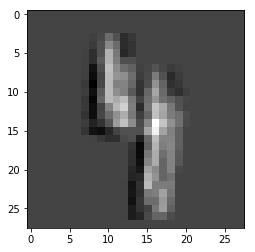

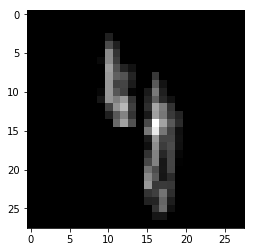

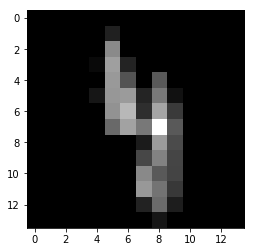

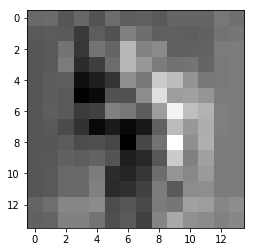

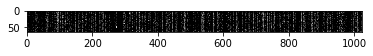

iter:  2700 train_cost:  49.91037 train_acc:  0.984375 test_cost:  253.40999 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


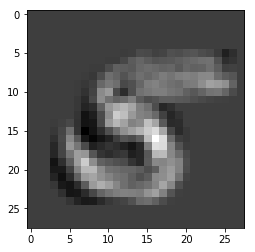

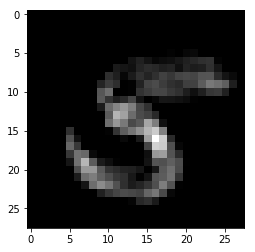

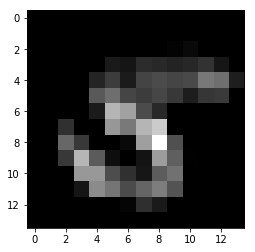

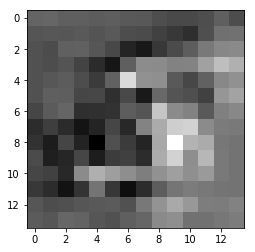

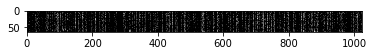

iter:  2800 train_cost:  55.397003 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


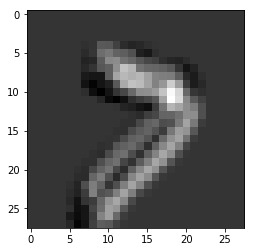

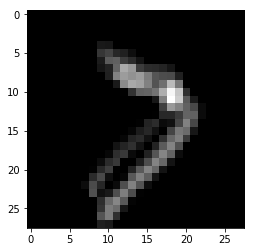

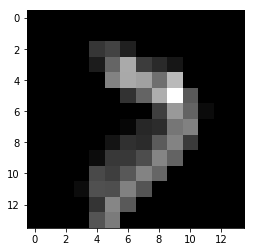

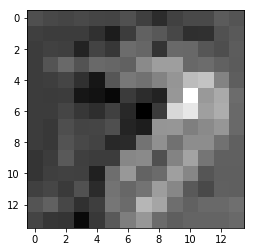

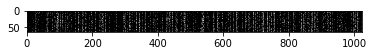

iter:  2900 train_cost:  0.0 train_acc:  1.0 test_cost:  118.12729 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


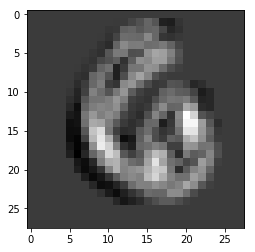

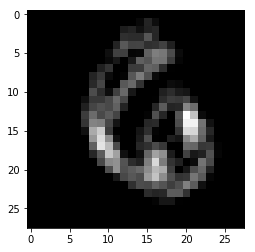

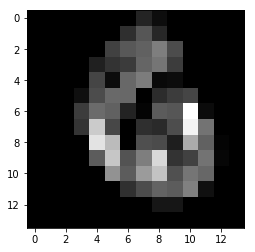

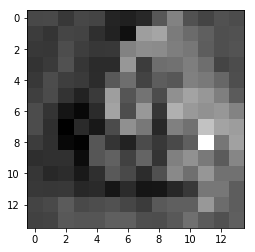

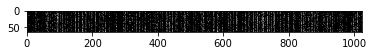

iter:  3000 train_cost:  14.356796 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


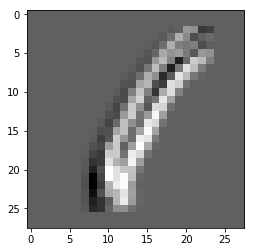

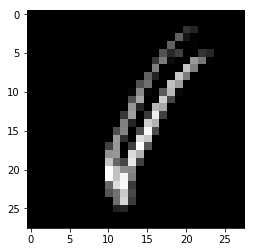

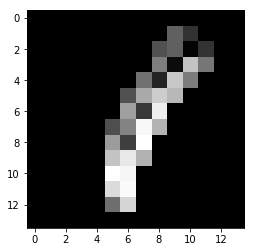

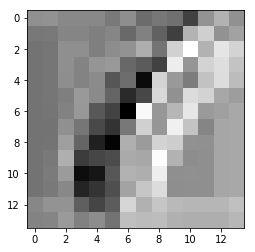

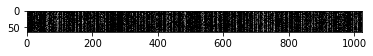

iter:  3100 train_cost:  76.3038 train_acc:  0.96875 test_cost:  148.81499 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


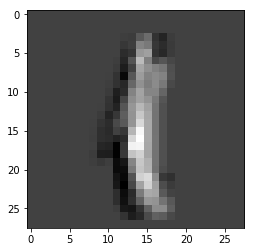

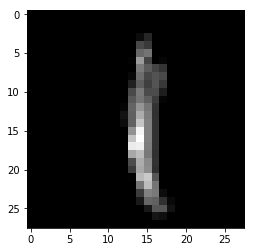

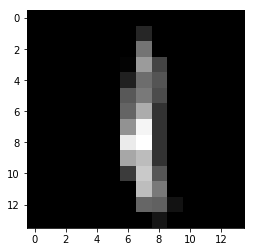

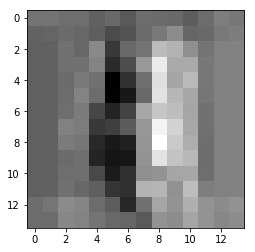

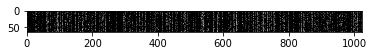

iter:  3200 train_cost:  225.92915 train_acc:  0.953125 test_cost:  187.27567 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


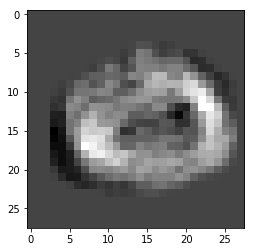

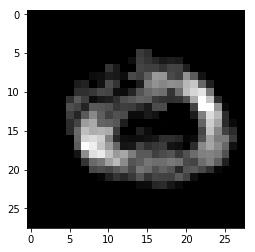

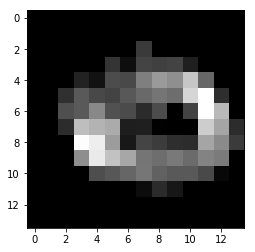

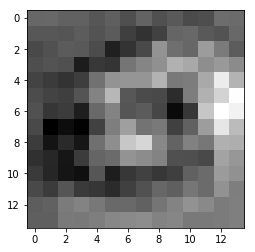

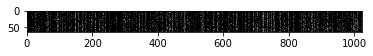

iter:  3300 train_cost:  0.0 train_acc:  1.0 test_cost:  455.72736 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


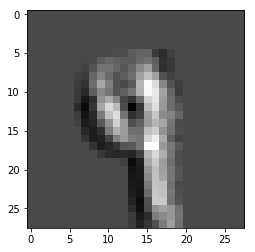

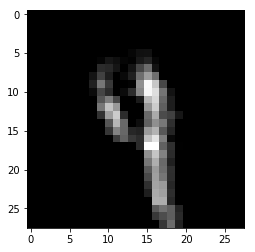

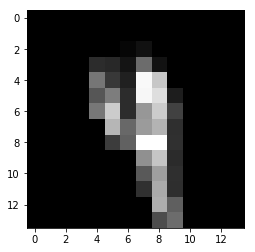

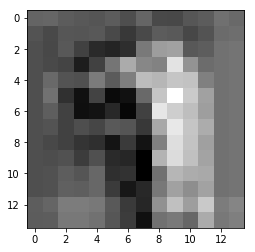

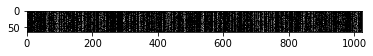

iter:  3400 train_cost:  0.0 train_acc:  1.0 test_cost:  162.08745 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


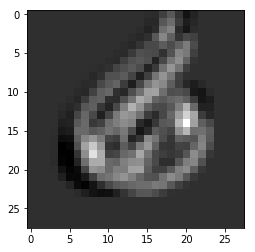

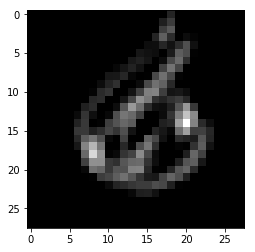

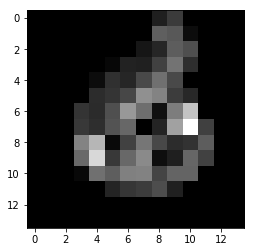

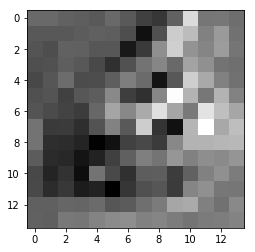

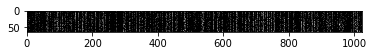

iter:  3500 train_cost:  0.0 train_acc:  1.0 test_cost:  94.147736 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


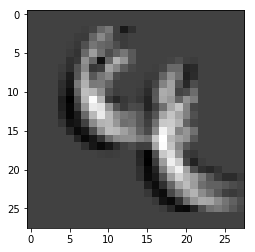

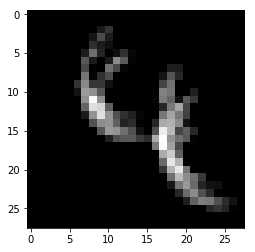

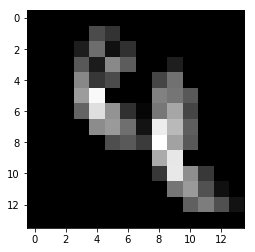

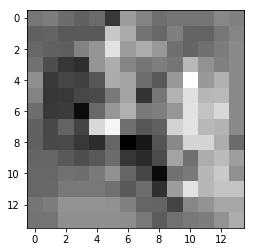

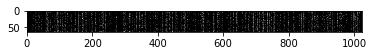

iter:  3600 train_cost:  0.0 train_acc:  1.0 test_cost:  29.406128 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


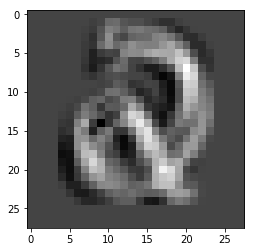

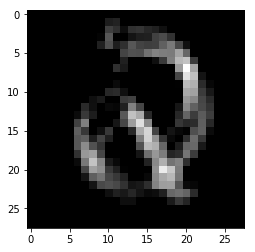

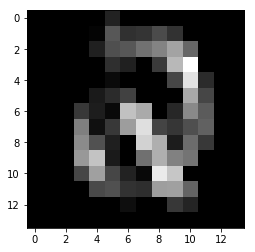

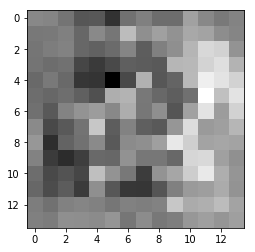

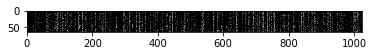

iter:  3700 train_cost:  64.75804 train_acc:  0.984375 test_cost:  11.934158 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


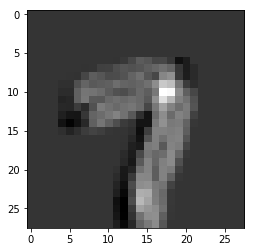

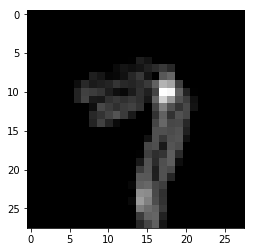

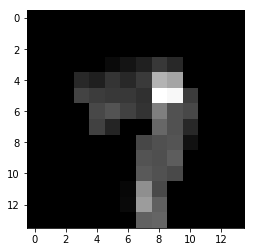

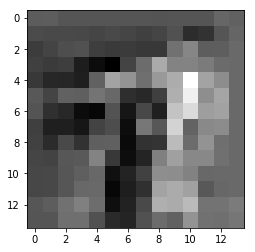

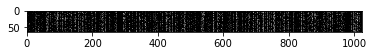

iter:  3800 train_cost:  0.0 train_acc:  1.0 test_cost:  130.07758 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


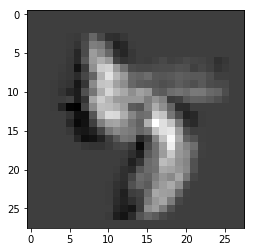

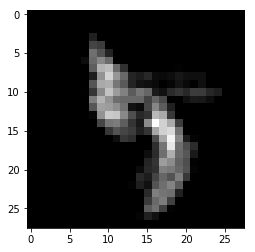

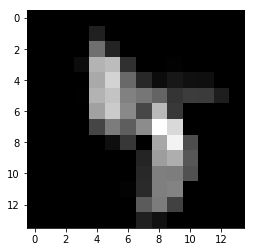

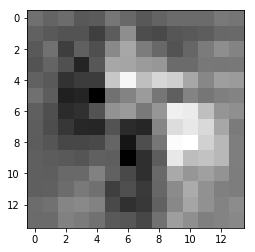

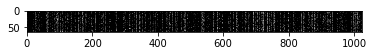

iter:  3900 train_cost:  138.70062 train_acc:  0.984375 test_cost:  2.3574524 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


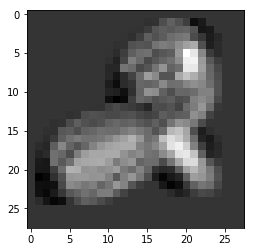

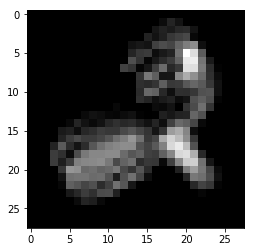

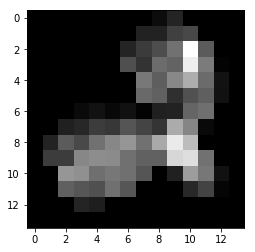

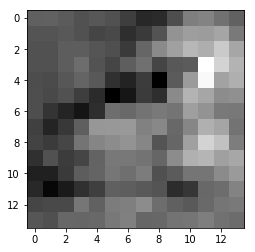

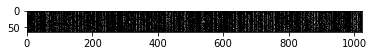

iter:  4000 train_cost:  0.0 train_acc:  1.0 test_cost:  40.265472 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


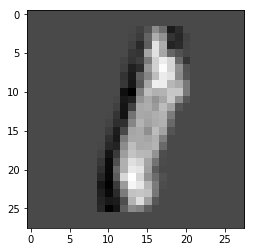

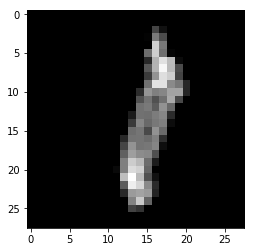

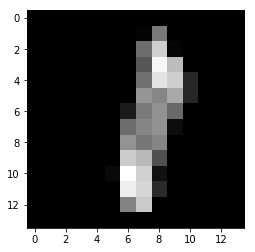

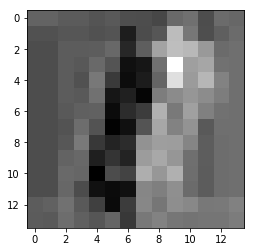

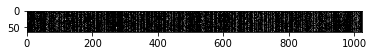

iter:  4100 train_cost:  93.066284 train_acc:  0.984375 test_cost:  97.78337 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


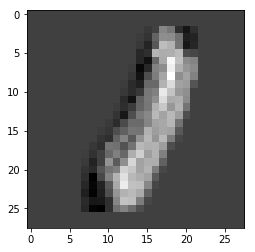

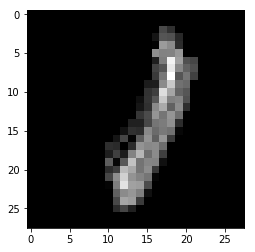

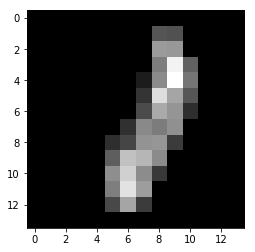

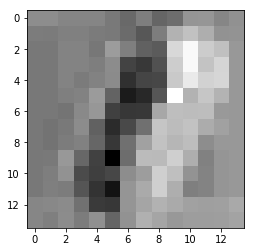

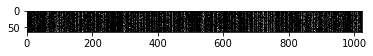

iter:  4200 train_cost:  0.0 train_acc:  1.0 test_cost:  158.27344 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


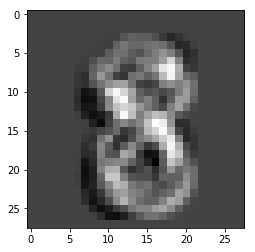

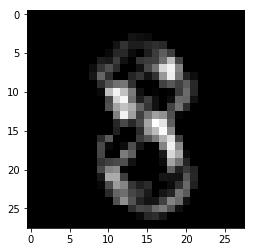

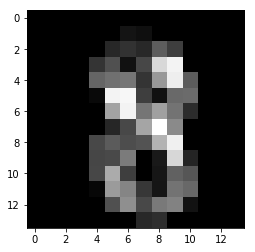

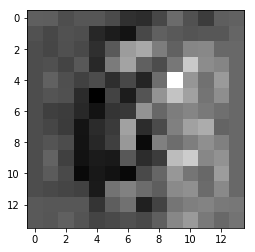

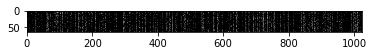

iter:  4300 train_cost:  0.0 train_acc:  1.0 test_cost:  22.574707 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


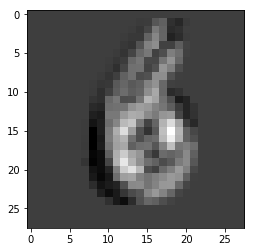

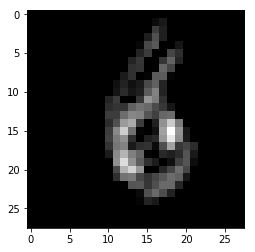

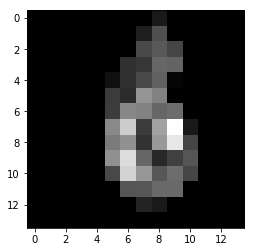

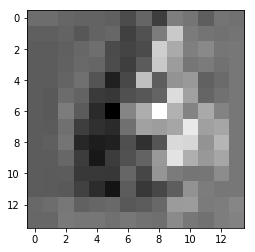

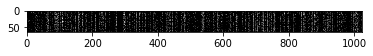

iter:  4400 train_cost:  0.0 train_acc:  1.0 test_cost:  36.210785 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


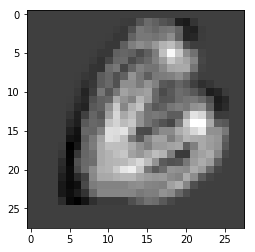

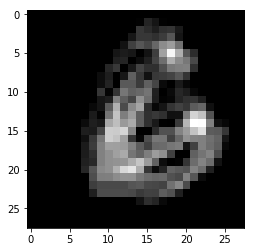

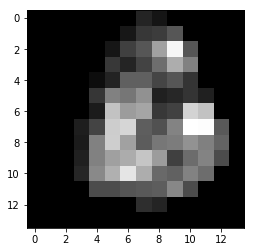

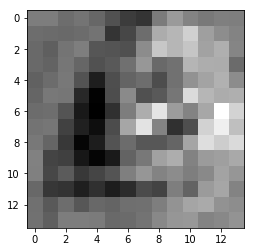

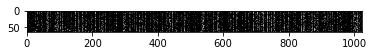

iter:  4500 train_cost:  0.0 train_acc:  1.0 test_cost:  11.518616 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


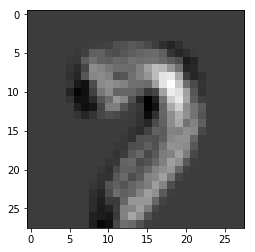

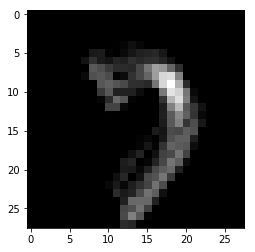

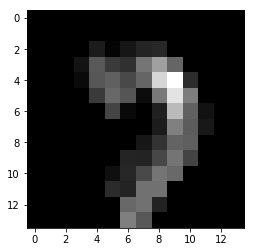

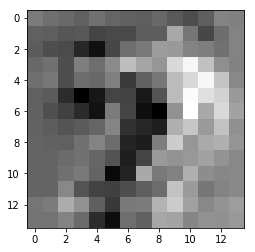

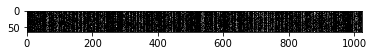

iter:  4600 train_cost:  0.0 train_acc:  1.0 test_cost:  166.03734 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


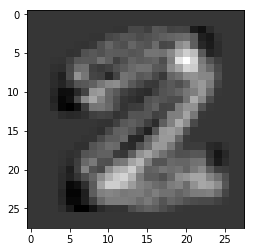

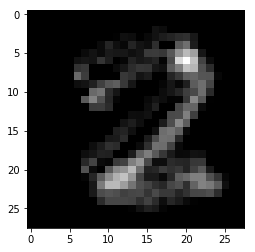

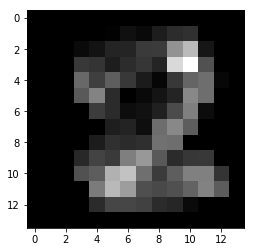

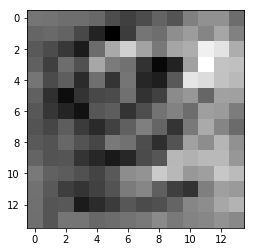

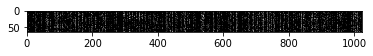

iter:  4700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


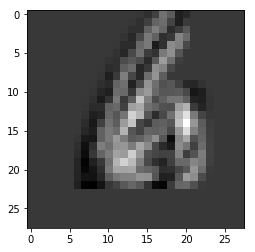

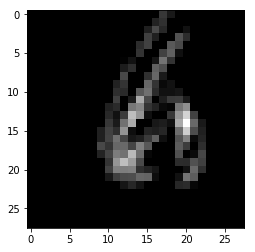

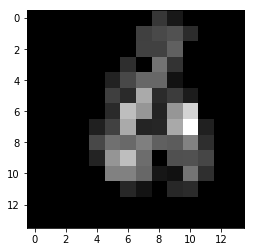

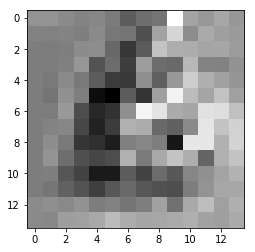

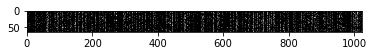

iter:  4800 train_cost:  0.0 train_acc:  1.0 test_cost:  208.55919 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


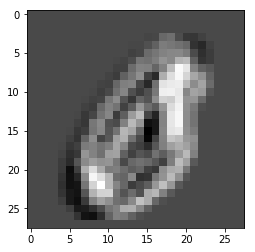

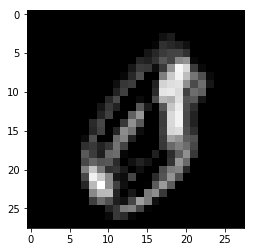

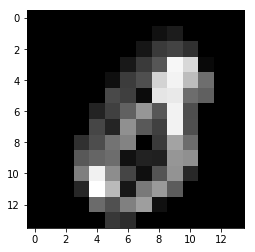

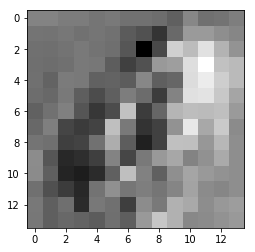

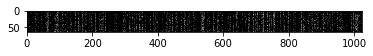

iter:  4900 train_cost:  0.0 train_acc:  1.0 test_cost:  205.4408 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


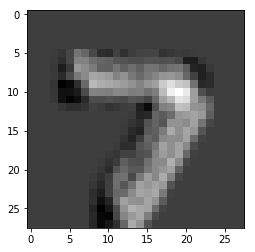

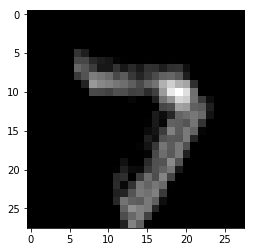

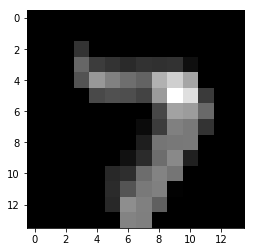

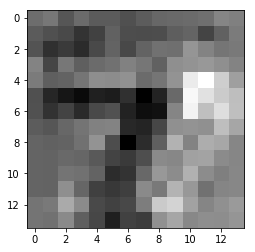

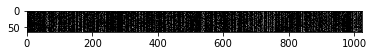

iter:  5000 train_cost:  0.0 train_acc:  1.0 test_cost:  70.911194 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


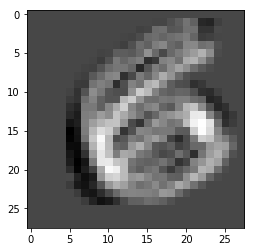

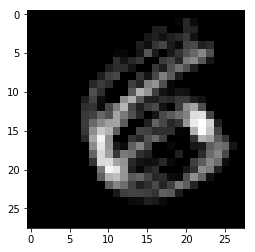

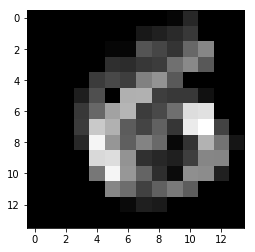

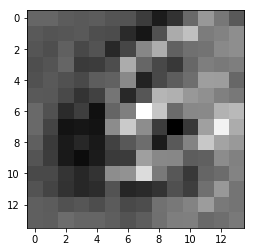

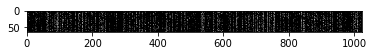

iter:  5100 train_cost:  2.6195679 train_acc:  0.984375 test_cost:  282.89423 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


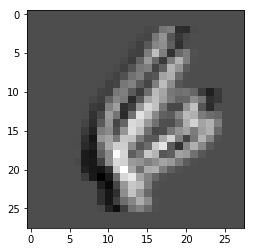

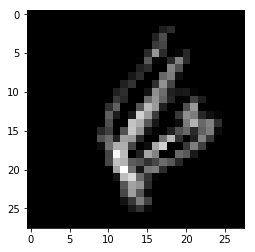

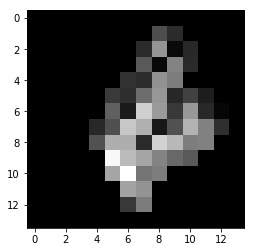

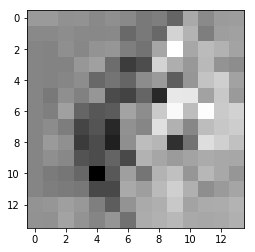

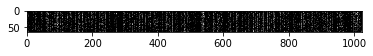

iter:  5200 train_cost:  17.82132 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


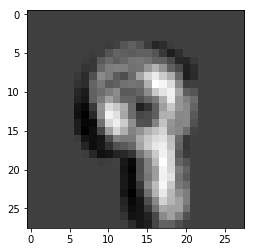

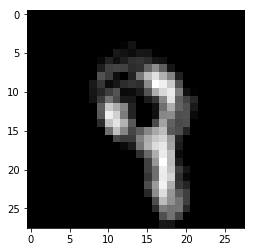

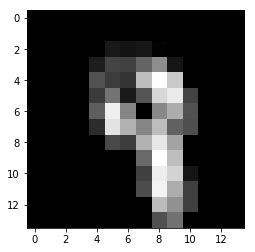

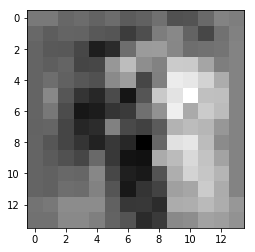

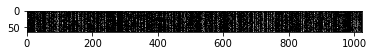

iter:  5300 train_cost:  0.0 train_acc:  1.0 test_cost:  67.48929 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


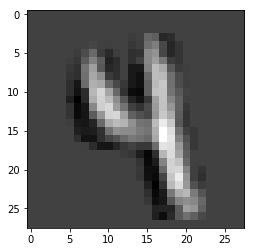

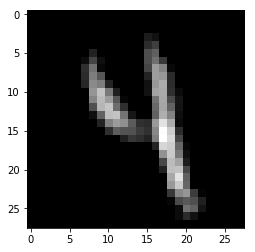

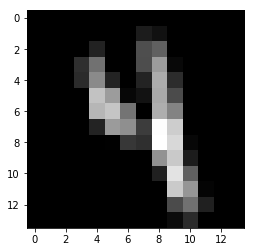

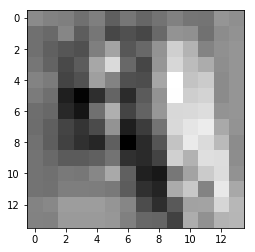

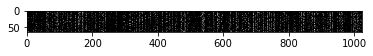

iter:  5400 train_cost:  22.547821 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


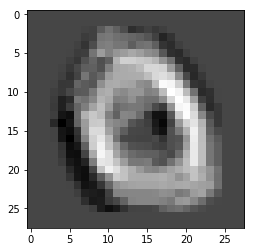

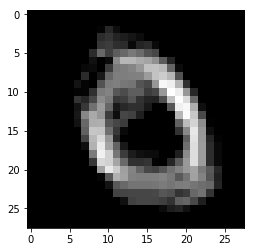

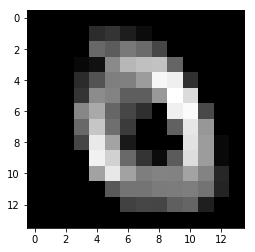

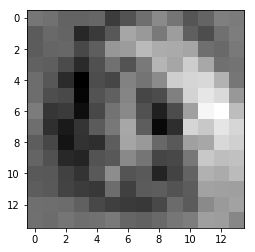

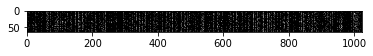

iter:  5500 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


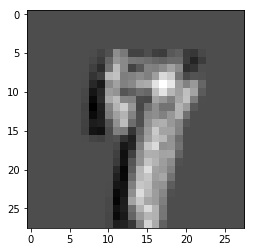

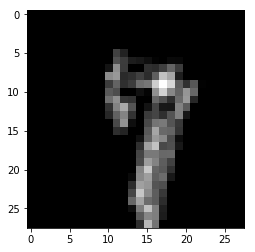

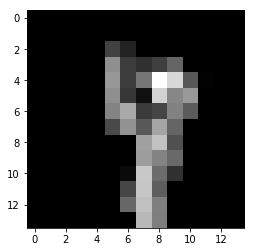

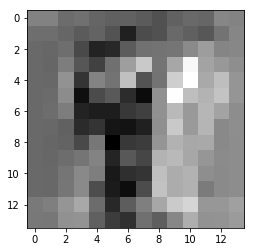

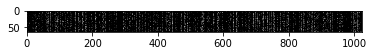

iter:  5600 train_cost:  0.0 train_acc:  1.0 test_cost:  32.48166 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


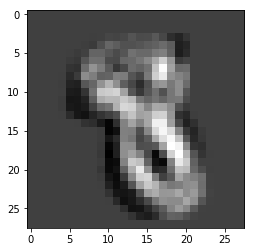

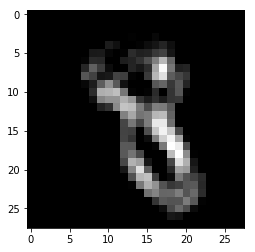

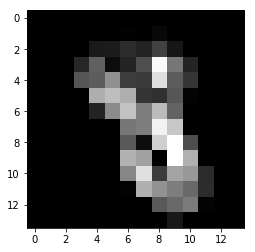

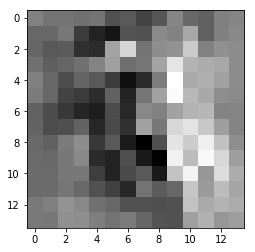

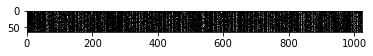

iter:  5700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


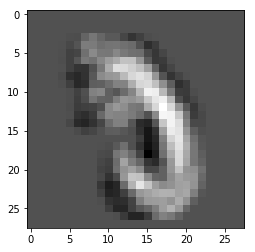

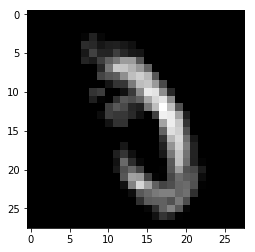

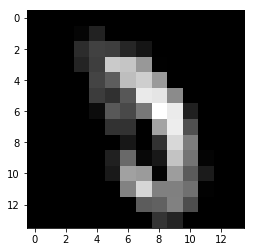

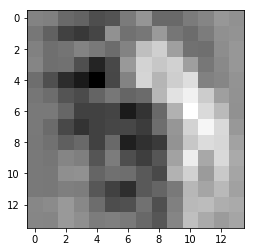

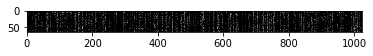

iter:  5800 train_cost:  0.0 train_acc:  1.0 test_cost:  230.08139 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


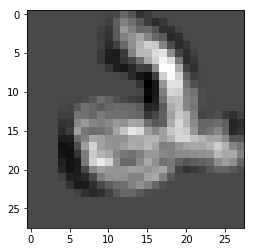

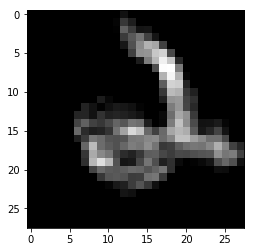

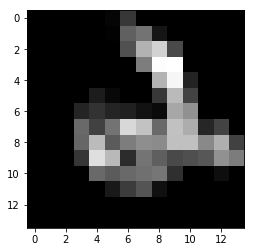

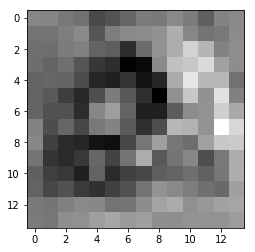

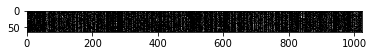

iter:  5900 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


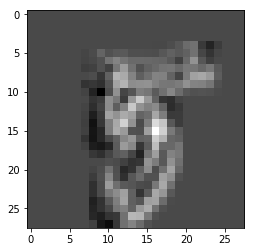

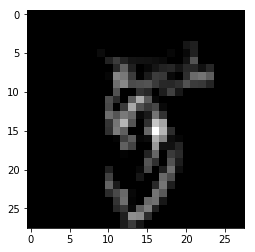

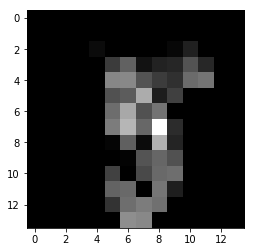

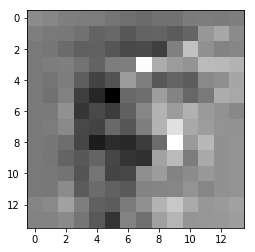

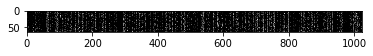

iter:  6000 train_cost:  0.0 train_acc:  1.0 test_cost:  232.62659 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


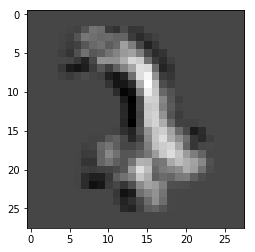

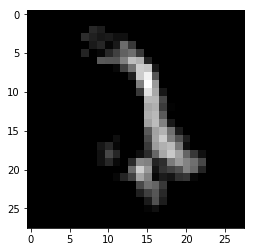

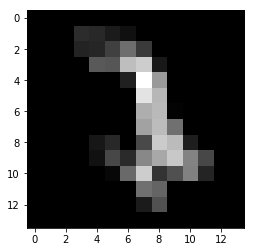

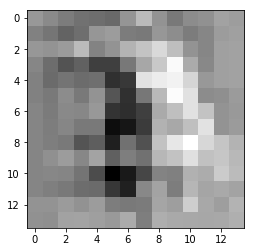

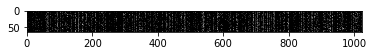

iter:  6100 train_cost:  0.0 train_acc:  1.0 test_cost:  408.33038 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


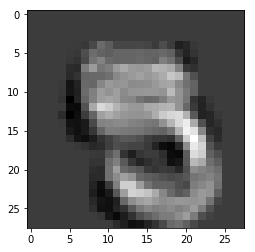

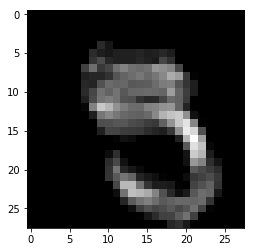

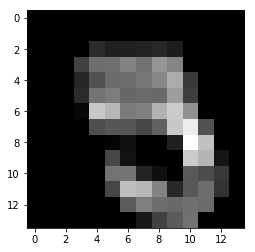

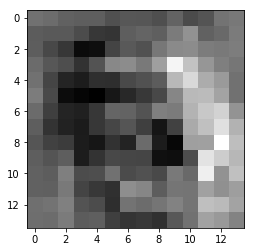

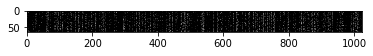

iter:  6200 train_cost:  0.0 train_acc:  1.0 test_cost:  173.48473 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


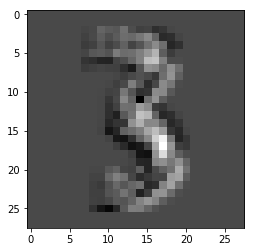

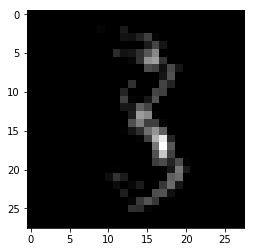

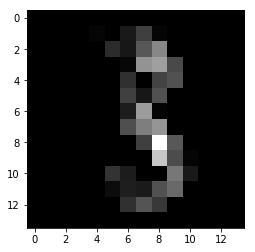

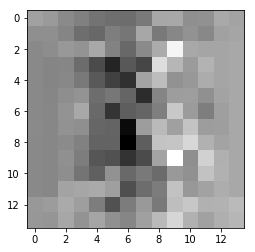

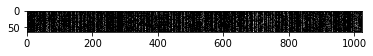

iter:  6300 train_cost:  0.0 train_acc:  1.0 test_cost:  24.824036 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


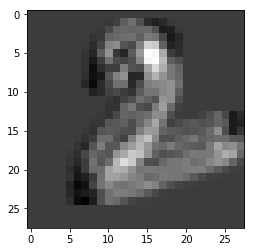

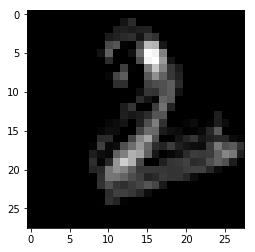

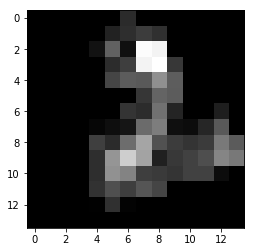

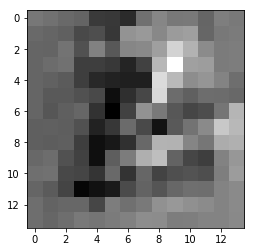

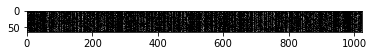

iter:  6400 train_cost:  0.0 train_acc:  1.0 test_cost:  409.36716 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


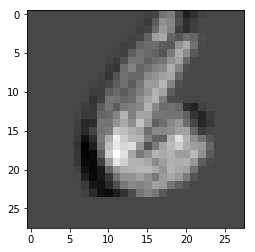

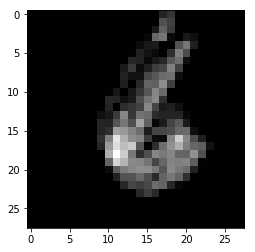

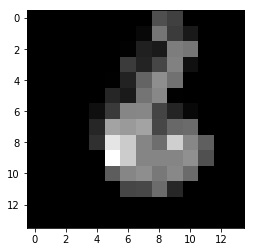

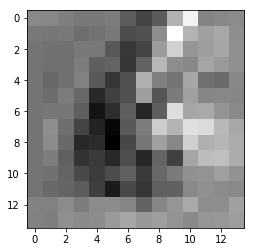

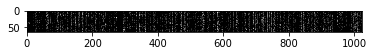

iter:  6500 train_cost:  0.0 train_acc:  1.0 test_cost:  10.46817 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


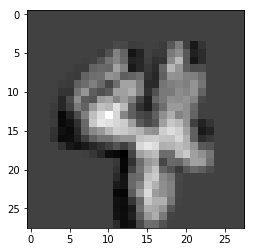

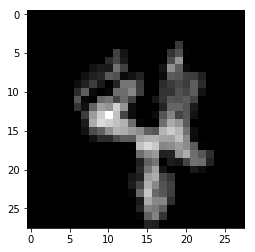

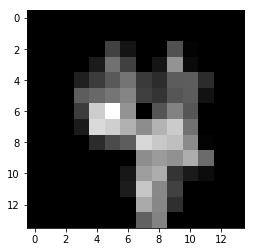

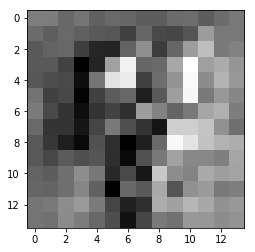

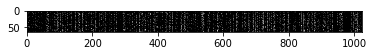

iter:  6600 train_cost:  0.0 train_acc:  1.0 test_cost:  205.19167 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


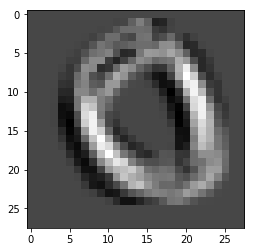

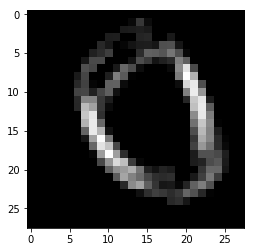

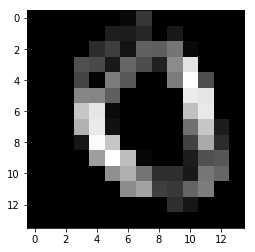

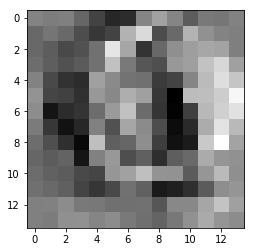

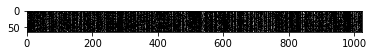

iter:  6700 train_cost:  0.0 train_acc:  1.0 test_cost:  19.857666 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


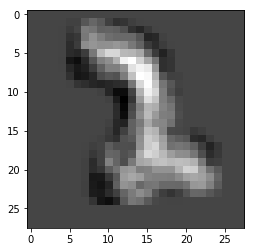

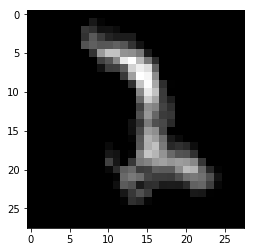

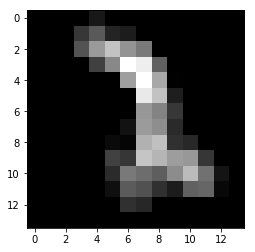

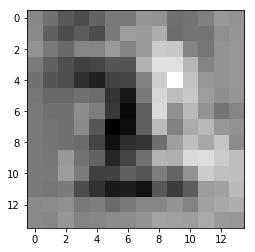

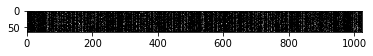

iter:  6800 train_cost:  0.0 train_acc:  1.0 test_cost:  19.614792 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


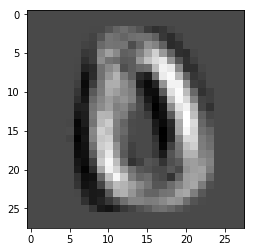

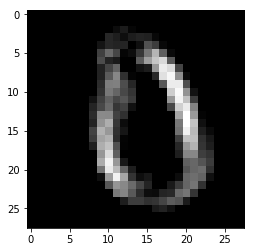

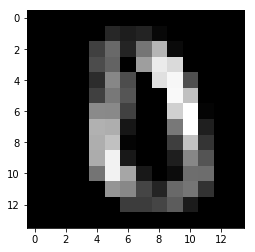

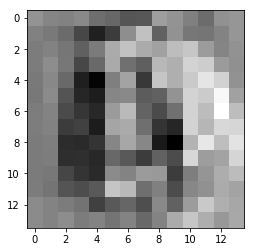

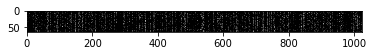

iter:  6900 train_cost:  0.0 train_acc:  1.0 test_cost:  263.16345 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


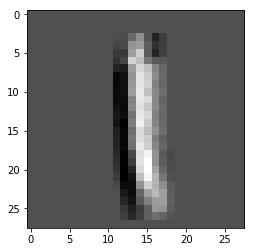

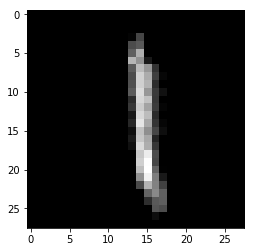

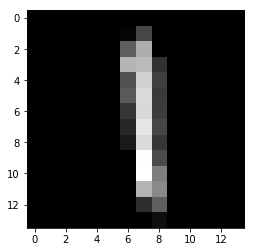

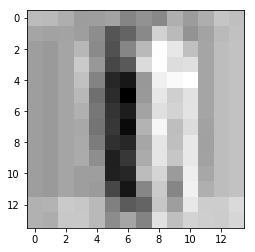

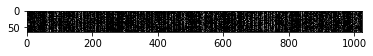

iter:  7000 train_cost:  0.0 train_acc:  1.0 test_cost:  71.25293 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


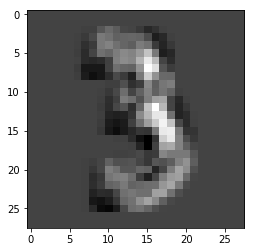

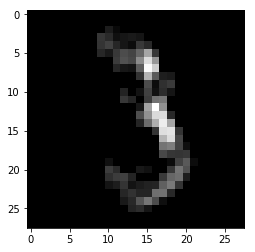

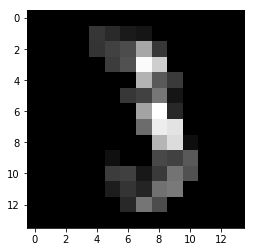

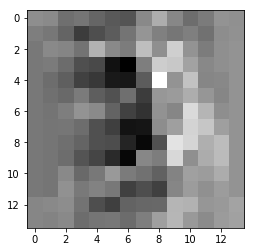

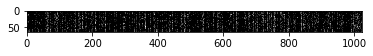

iter:  7100 train_cost:  0.0 train_acc:  1.0 test_cost:  375.81857 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


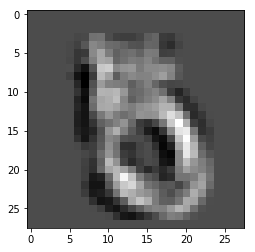

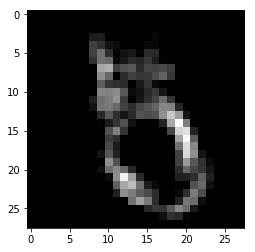

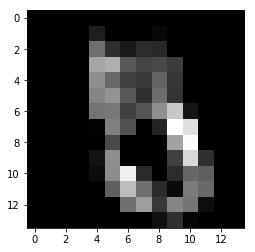

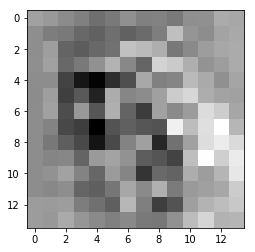

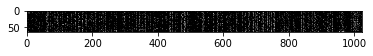

iter:  7200 train_cost:  0.0 train_acc:  1.0 test_cost:  33.48758 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


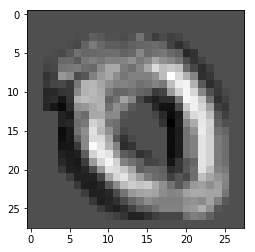

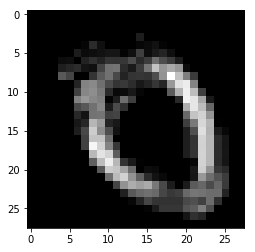

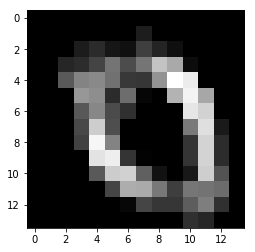

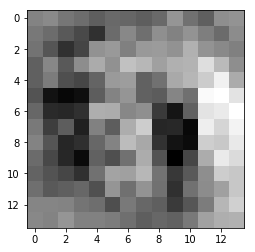

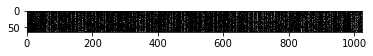

iter:  7300 train_cost:  66.9865 train_acc:  0.96875 test_cost:  16.464859 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


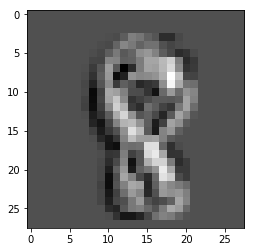

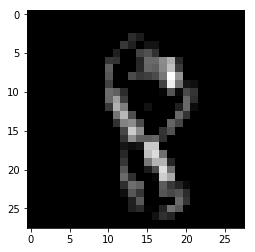

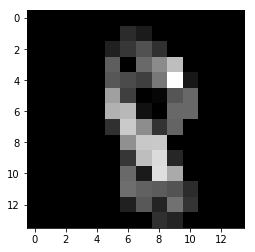

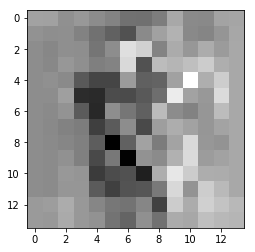

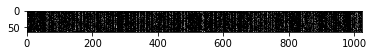

iter:  7400 train_cost:  0.0 train_acc:  1.0 test_cost:  137.36798 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


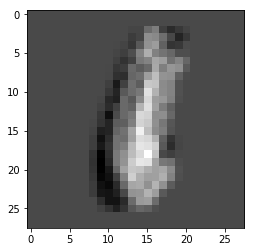

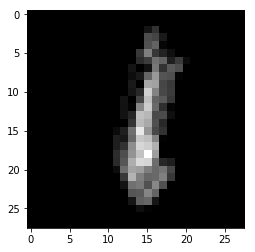

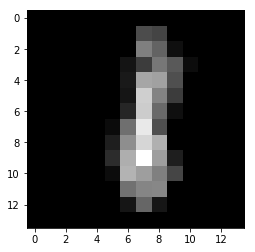

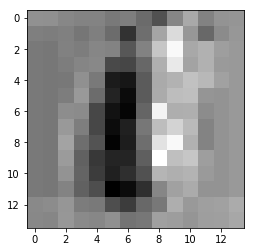

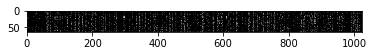

iter:  7500 train_cost:  0.0 train_acc:  1.0 test_cost:  459.50928 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


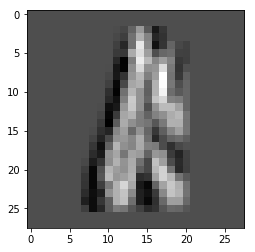

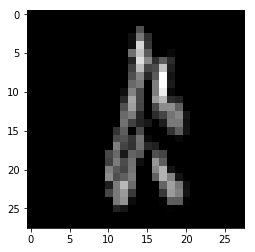

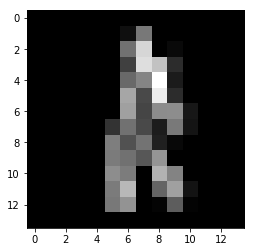

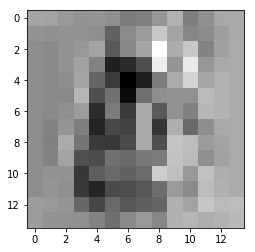

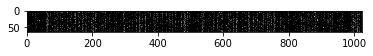

iter:  7600 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


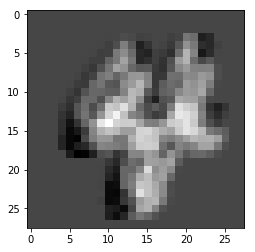

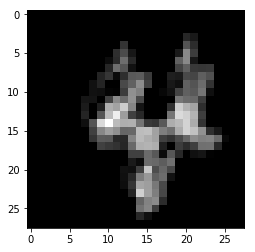

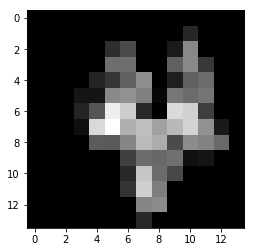

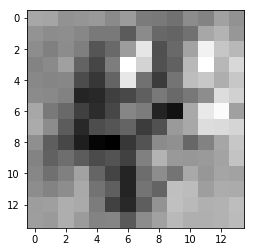

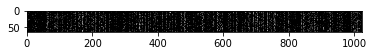

iter:  7700 train_cost:  0.0 train_acc:  1.0 test_cost:  34.067345 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


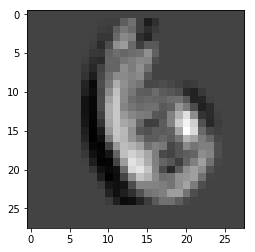

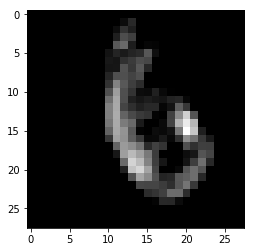

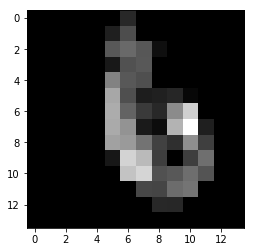

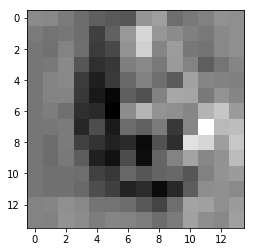

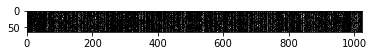

iter:  7800 train_cost:  0.0 train_acc:  1.0 test_cost:  6.741699 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


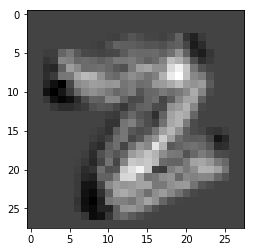

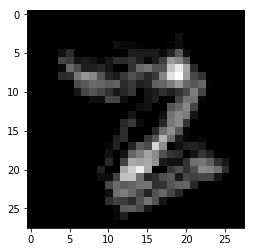

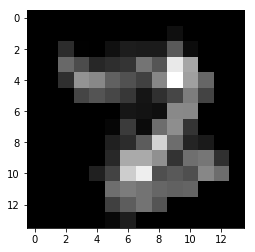

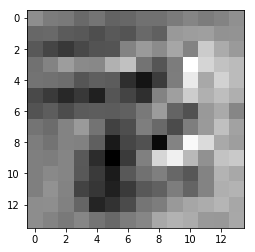

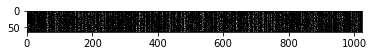

iter:  7900 train_cost:  35.879425 train_acc:  0.96875 test_cost:  37.13336 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


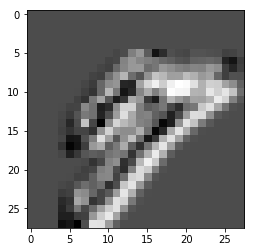

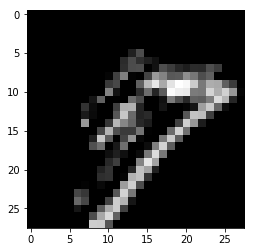

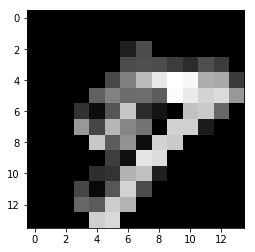

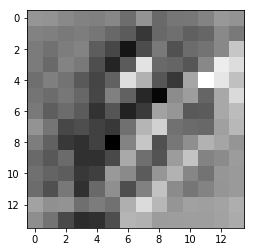

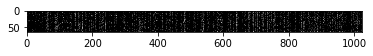

iter:  8000 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


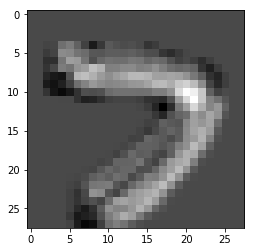

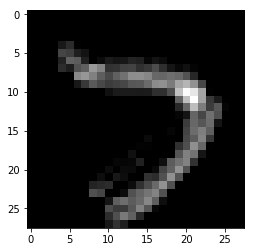

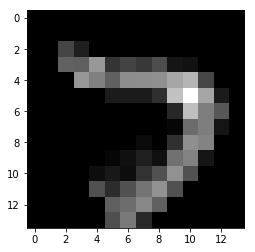

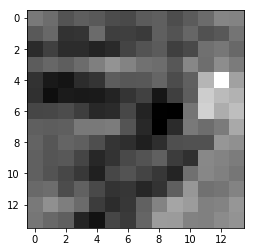

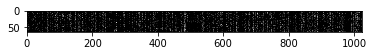

iter:  8100 train_cost:  81.223755 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


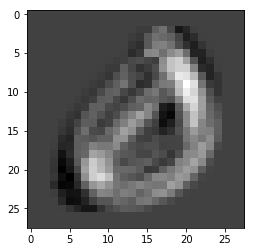

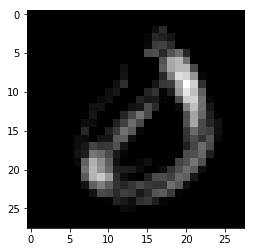

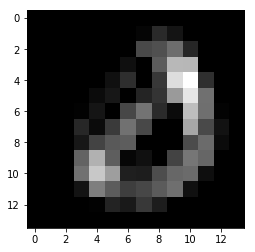

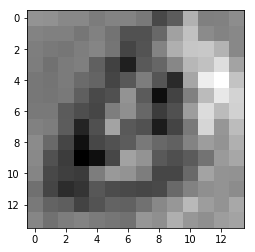

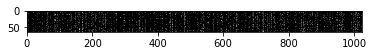

iter:  8200 train_cost:  0.0 train_acc:  1.0 test_cost:  47.17224 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


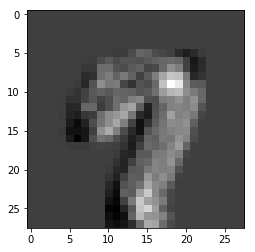

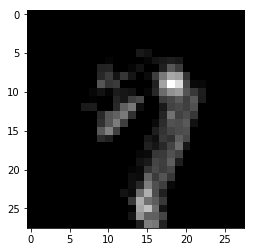

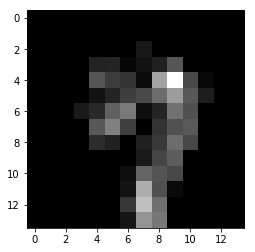

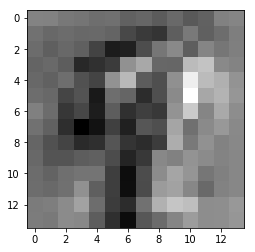

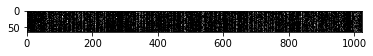

iter:  8300 train_cost:  0.0 train_acc:  1.0 test_cost:  13.22348 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


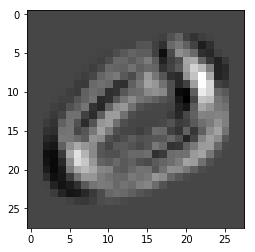

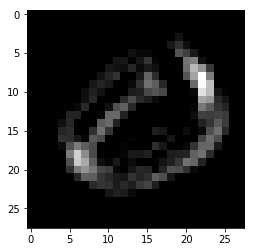

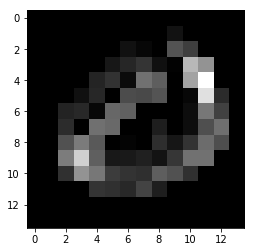

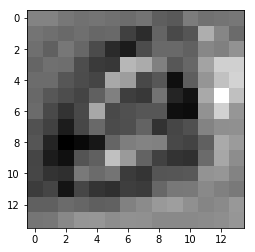

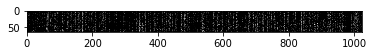

iter:  8400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


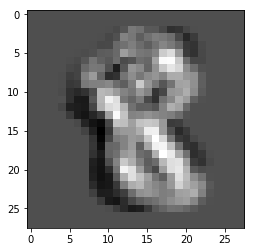

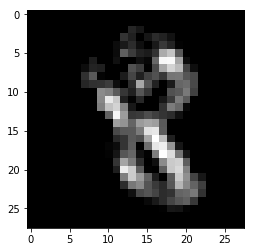

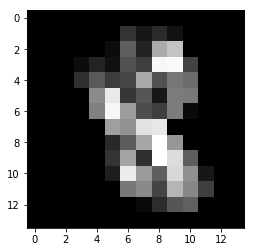

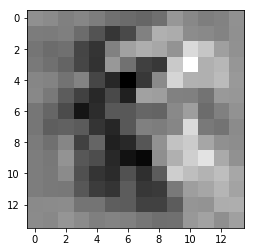

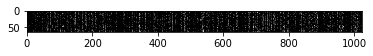

iter:  8500 train_cost:  0.0 train_acc:  1.0 test_cost:  56.999405 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


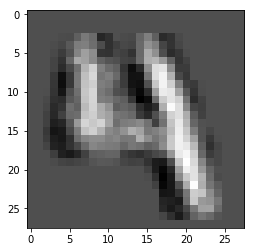

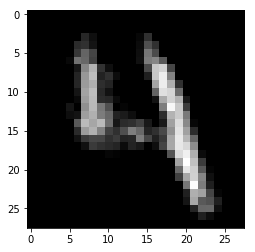

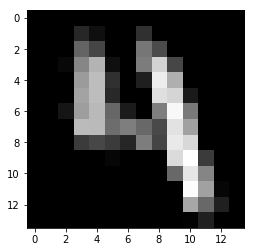

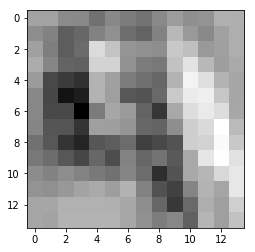

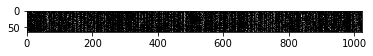

iter:  8600 train_cost:  0.0 train_acc:  1.0 test_cost:  231.79704 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


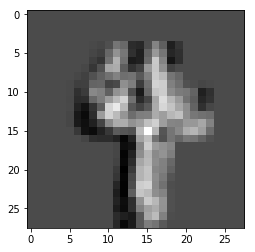

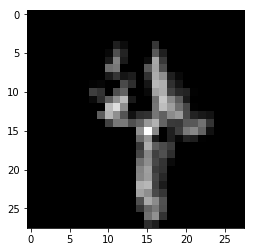

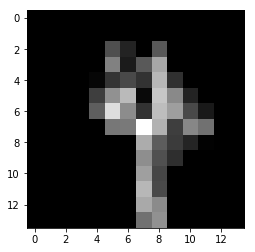

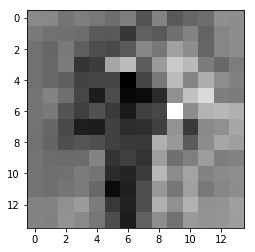

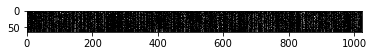

iter:  8700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


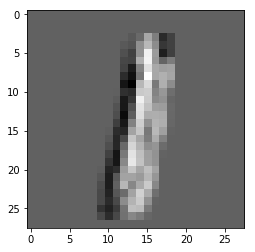

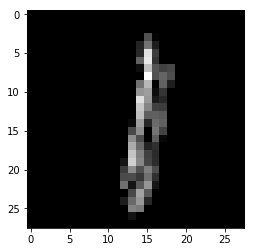

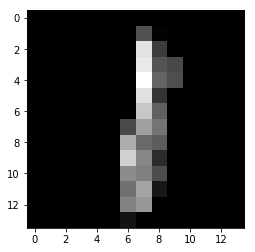

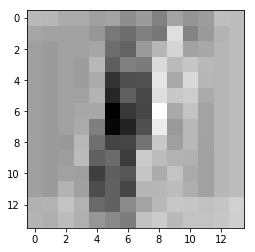

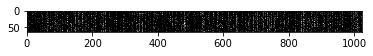

iter:  8800 train_cost:  0.0 train_acc:  1.0 test_cost:  269.09872 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


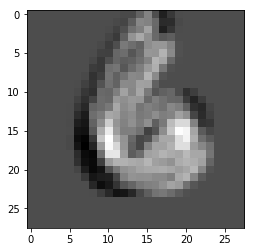

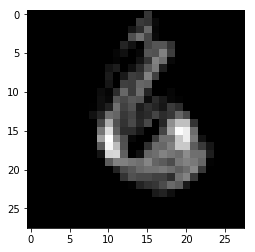

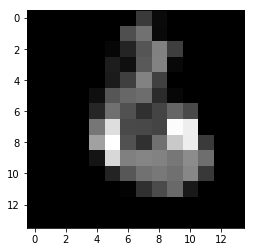

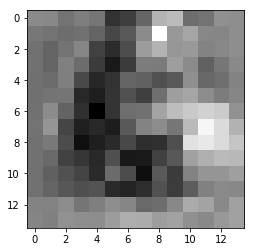

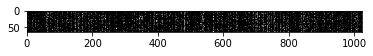

iter:  8900 train_cost:  0.0 train_acc:  1.0 test_cost:  56.12793 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


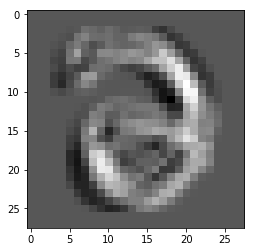

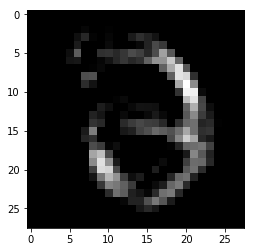

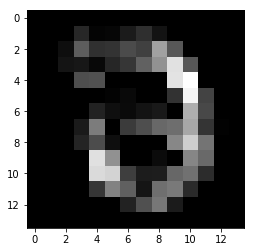

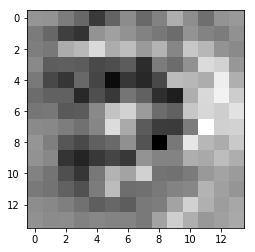

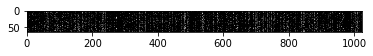

iter:  9000 train_cost:  0.0 train_acc:  1.0 test_cost:  183.2919 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


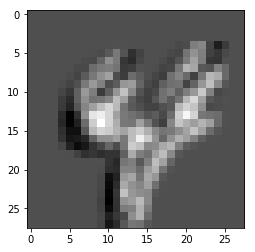

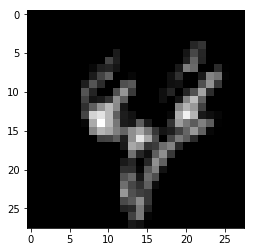

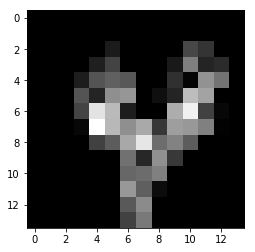

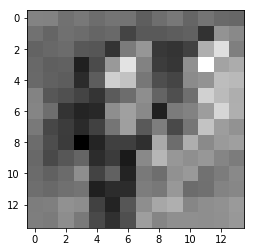

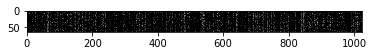

iter:  9100 train_cost:  0.0 train_acc:  1.0 test_cost:  175.53598 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


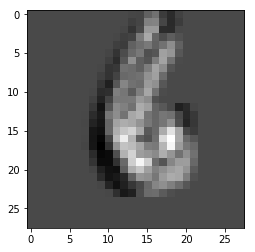

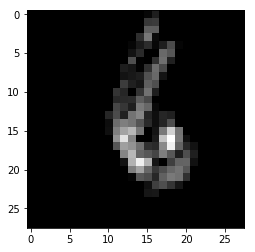

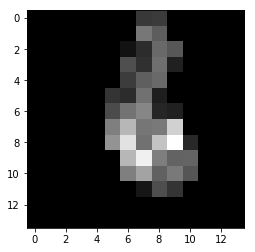

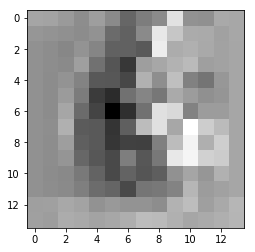

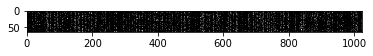

iter:  9200 train_cost:  0.0 train_acc:  1.0 test_cost:  105.31302 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


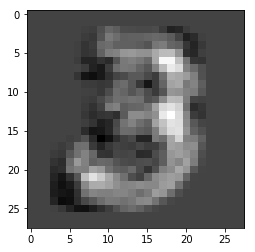

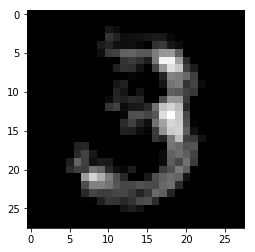

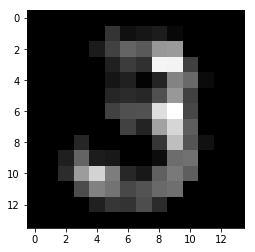

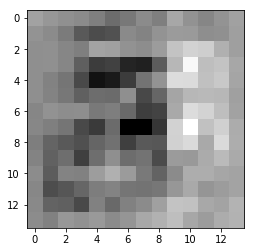

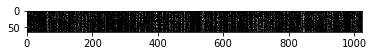

iter:  9300 train_cost:  0.0 train_acc:  1.0 test_cost:  0.8154297 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


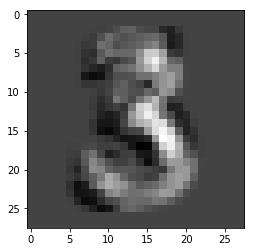

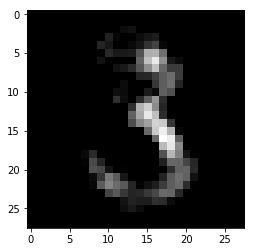

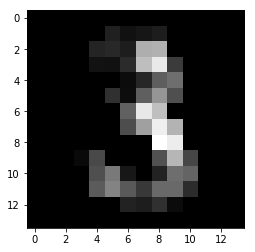

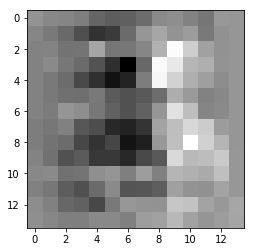

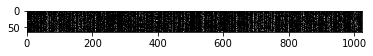

iter:  9400 train_cost:  0.0 train_acc:  1.0 test_cost:  103.288025 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


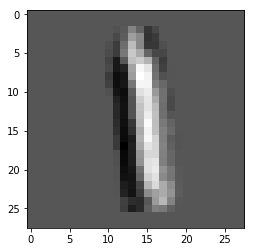

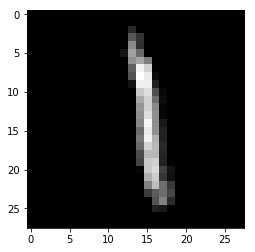

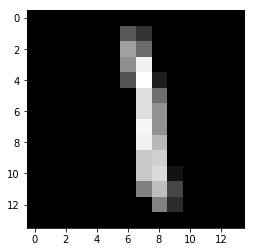

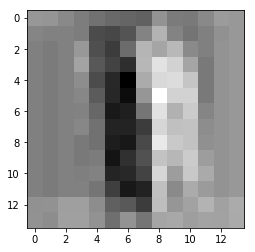

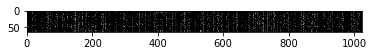

iter:  9500 train_cost:  0.0 train_acc:  1.0 test_cost:  35.566956 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


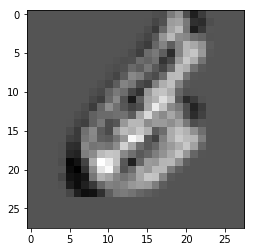

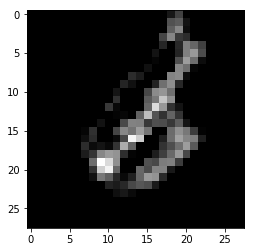

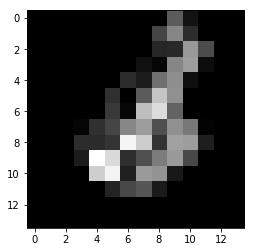

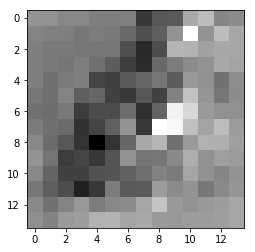

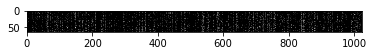

iter:  9600 train_cost:  0.0 train_acc:  1.0 test_cost:  111.257126 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


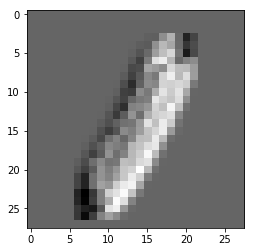

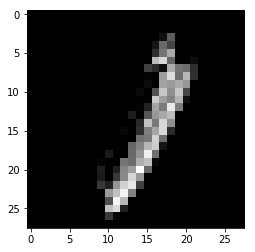

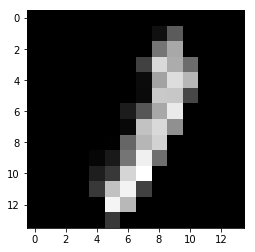

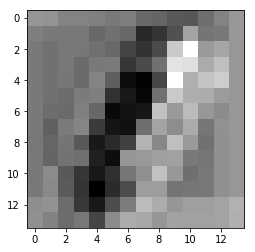

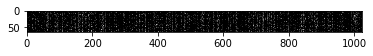

iter:  9700 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


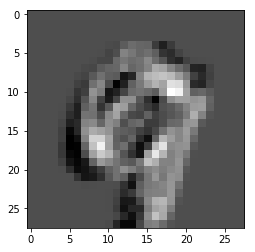

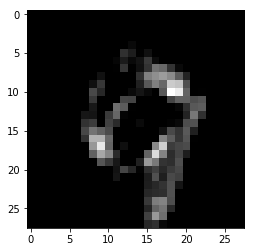

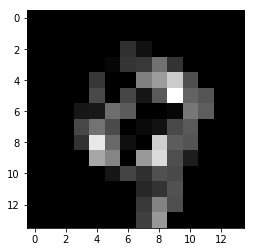

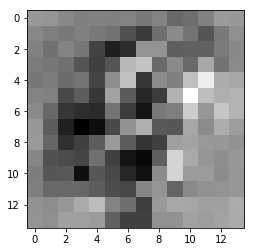

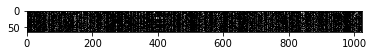

iter:  9800 train_cost:  0.0 train_acc:  1.0 test_cost:  61.283813 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


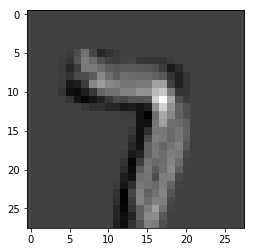

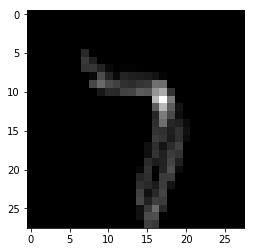

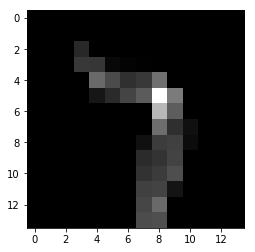

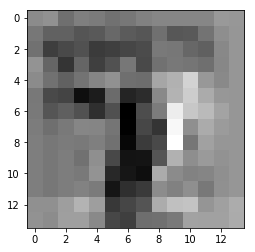

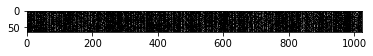

iter:  9900 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7


In [28]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf

import matplotlib.pyplot as plt
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv_pre_actv_1 = conv2d(x, weights['wc1'], biases['bc1'])
        conv_actv_1 = tf.nn.relu(conv_pre_actv_1)
        
        print('conv_actv_1 max',conv_actv_1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv_actv_1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv_pre_actv_2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        conv_actv_2 = tf.nn.relu(conv_pre_actv_2)

        
        print('con2_before max',conv_actv_2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv_actv_2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
    list_of_tensors = [conv_pre_actv_1,conv_actv_1, conv1,conv_pre_actv_2,conv_actv_2, conv2, fc1]
    return out, list_of_tensors


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p,list_of_tensors = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('accuracy'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
acc_summary = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()

saver = tf.train.Saver(biases)

# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log2/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log2/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([acc_summary,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([acc_summary,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        test_writer.add_summary(summary, i)
        
        if i % 1000 == 0:
          # Append the step number to the checkpoint name:
          saver.save(sess, './log2/model.ckpt', global_step=i)


        if i % 100 ==0:
            
           
            val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
            num_of_returned_sensors = len(val_list_of_tensors)
            
            print(val_list_of_tensors[-1].shape)
            
            imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')# conv1 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[1][0,:,:,0],  cmap='gray')# conv1 after-activation first input image first filter
            plt.show()

            
            imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')# conv2 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')# conv2 after-activation first input image first filter
            plt.show()
            
            imshow(val_list_of_tensors[-1], cmap='gray')# conv2 pre-activation first input image first filter
            plt.show()


            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc, 'num_of_returned_sensors:', num_of_returned_sensors )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    #print('predicted ', y_p_p)
    #print('real ', y_gr)